# PROYECTO INTEGRADOR AVANCE 1.
## CONSIGNAS
### 1. Lee el archivo Readme.txt y analiza las columnas y datos que se van a utilizar para obtener un mayor conocimiento del dataset.



### 2. Crea un nuevo notebook llamado “PIDA_M4_Nombre_Apellido.ipynb” (Reemplaza Nombre y Apellido por tus datos). Una vez creado importa las librerías que necesitarás para realizar el 1° avance del PI.

In [2]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 3. Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code. 

In [3]:
# Leer el archivo data_latinoamerica.csv
df = pd.read_csv(r'C:\Users\Usuario\Desktop\JAIME\PROYECTO CANADA\HENRY DATA ANALYST\DAP-01\M4\PROYECTO INTEGRADOR\data_latinoamerica.csv', sep=',')

# Mostrar las primeras filas
df.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

### 4. Comprueba que el dataset cargado tiene la cantidad de registros y columnas especificadas 

In [4]:
# Comprobar la cantidad de registros y columnas
np.shape(df)

(12216057, 50)

### 5. Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

In [5]:
# Seleccionar países
paises = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']
df_filtrado_paises = df[df['country_name'].isin(paises)]
df_filtrado_paises['country_name'].unique()



array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

In [6]:
# Comprobar la cantidad de registros y columnas
np.shape(df_filtrado_paises)

(11970289, 50)

In [7]:
#Verificamos la cantidad de nulos
df_filtrado_paises.isnull().sum()

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


despues de haber hecho el primer analisis nos dimos cuenta que aun habian muchos nulos, por tal razon hicimos otro filtro para los paises a traves de la columna 'location_key'

In [8]:
# Seleccionar locaciones
locaciones = ['CO', 'AR', 'CL', 'MX', 'PE', 'BR']
df_filtrado_paises = df_filtrado_paises[df_filtrado_paises['location_key'].isin(locaciones)]

#Verificamos la configuracion de nuestros datos
np.shape(df_filtrado_paises)

(5946, 50)

### 6. Filtra los datos en fechas mayores a 2021-01-01.

Para mejor manejo de los datos filtramos a partir de fechas mayores a 2021-01-01

In [9]:
# Convertir la columna de fecha a datetime si no lo está ya
df_filtrado_paises = df_filtrado_paises.copy()
df_filtrado_paises['date'] = pd.to_datetime(df_filtrado_paises['date'])

# Filtrar por fecha
df_filtrado_fechas = df_filtrado_paises[df_filtrado_paises['date'] > '2021-01-01']

# Verificar el filtrado por la fecha minima
print(df_filtrado_fechas['date'].min())

#verificamos la cantidad de nulos
print(df_filtrado_fechas.isnull().sum()[df_filtrado_fechas.isnull().sum()>0])

# Comprobar la cantidad de registros y columnas
np.shape(df_filtrado_fechas)

2021-01-02 00:00:00
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


(3744, 50)

### 7. Compara a nivel de país para llenar valores faltantes.

In [10]:
#usamos un ciclo for para rellenar los faltantes de los paises seleccionados por la media
for pais in paises:
    df_filtrado_fechas['new_confirmed'] = df_filtrado_fechas['new_confirmed'].fillna(df_filtrado_fechas[df_filtrado_fechas['country_name']==pais]['new_confirmed'].mean())
    df_filtrado_fechas['new_deceased'] = df_filtrado_fechas['new_deceased'].fillna(df_filtrado_fechas[df_filtrado_fechas['country_name']==pais]['new_deceased'].mean())
    df_filtrado_fechas['cumulative_confirmed'] = df_filtrado_fechas['cumulative_confirmed'].fillna(df_filtrado_fechas[df_filtrado_fechas['country_name']==pais]['cumulative_confirmed'].mean())
    df_filtrado_fechas['cumulative_deceased'] = df_filtrado_fechas['cumulative_deceased'].fillna(df_filtrado_fechas[df_filtrado_fechas['country_name']==pais]['cumulative_deceased'].mean())
    df_filtrado_fechas['average_temperature_celsius'] = df_filtrado_fechas['average_temperature_celsius'].fillna(df_filtrado_fechas[df_filtrado_fechas['country_name']==pais]['average_temperature_celsius'].mean())
    df_filtrado_fechas['minimum_temperature_celsius'] = df_filtrado_fechas['minimum_temperature_celsius'].fillna(df_filtrado_fechas[df_filtrado_fechas['country_name']==pais]['minimum_temperature_celsius'].mean())
    df_filtrado_fechas['maximum_temperature_celsius'] = df_filtrado_fechas['maximum_temperature_celsius'].fillna(df_filtrado_fechas[df_filtrado_fechas['country_name']==pais]['maximum_temperature_celsius'].mean())
    df_filtrado_fechas['rainfall_mm'] = df_filtrado_fechas['rainfall_mm'].fillna(df_filtrado_fechas[df_filtrado_fechas['country_name']==pais]['rainfall_mm'].mean())
    df_filtrado_fechas['relative_humidity'] = df_filtrado_fechas['relative_humidity'].fillna(df_filtrado_fechas[df_filtrado_fechas['country_name']==pais]['relative_humidity'].mean())

#usamos fillna para rellenar con 0 las columnas 'cumulative_recovered', 'new_recovered', 'cumulative_vaccine_doses_administered'
df_filtrado_fechas['cumulative_vaccine_doses_administered'] = df_filtrado_fechas['cumulative_vaccine_doses_administered'].fillna(0)
df_filtrado_fechas['new_recovered'] = df_filtrado_fechas['new_recovered'].fillna(0)
df_filtrado_fechas['cumulative_recovered'] = df_filtrado_fechas['cumulative_recovered'].fillna(0)

#verificamos la cantidad de nulos
print(df_filtrado_fechas.isnull().sum()[df_filtrado_fechas.isnull().sum()>0])

# Comprobar la cantidad de registros y columnas
np.shape(df_filtrado_fechas)

Series([], dtype: int64)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6780\3010671585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_fechas['new_confirmed'] = df_filtrado_fechas['new_confirmed'].fillna(df_filtrado_fechas[df_filtrado_fechas['country_name']==pais]['new_confirmed'].mean())
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6780\3010671585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_fechas['new_deceased'] = df_filtrado_fechas['new_deceased'].fillna(df_filtrado_fechas[df_filtrado_fechas[

(3744, 50)

### 8. Realiza una limpieza preliminar de los datos, eliminando registros nulos y corrigiendo los tipos de datos donde sea necesario, trata con valores medios, valores anteriores o valores siguientes.

In [11]:
# Eliminar registros nulos y corregir tipos de datos
df_limpio = df_filtrado_fechas.dropna()

# Verificar tipos de datos y corregir si es necesario
print(df_limpio.dtypes)
# Verificar la eliminación de nulos
print(df_limpio.isnull().sum())

np.shape(df_limpio)

location_key                                     object
date                                     datetime64[ns]
country_code                                     object
country_name                                     object
new_confirmed                                   float64
new_deceased                                    float64
cumulative_confirmed                            float64
cumulative_deceased                             float64
cumulative_vaccine_doses_administered           float64
population                                      float64
population_male                                 float64
population_female                               float64
population_rural                                float64
population_urban                                float64
population_density                              float64
human_development_index                         float64
population_age_00_09                            float64
population_age_10_19                            

(3744, 50)

### 9. Examina las características básicas del dataset para comprender la distribución de las variables clave como incidencia de COVID-19 e identifica las variables que consideras que son claves para tu análisis.




In [12]:
# Utilizamos describe() para obtener estadísticas descriptivas
descripcion = df_limpio.describe()

# Mostrar el resumen estadístico
descripcion

date  new_confirmed  new_deceased  cumulative_confirmed  \
count                 3744    3744.000000   3744.000000          3.744000e+03   
mean   2021-11-09 12:00:00   13899.659376    276.647712          6.773059e+06   
min    2021-01-02 00:00:00    -573.000000      0.000000          9.710000e+02   
25%    2021-06-06 18:00:00    1536.750000     26.000000          2.132216e+06   
50%    2021-11-09 12:00:00    5227.000000    101.000000          3.648782e+06   
75%    2022-04-14 06:00:00   14812.750000    311.000000          6.202104e+06   
max    2022-09-17 00:00:00  298408.000000  11447.000000          3.456883e+07   
std                    NaN   24210.340842    507.067671          7.978578e+06   

       cumulative_deceased  cumulative_vaccine_doses_administered  \
count          3744.000000                           3.744000e+03   
mean         192751.477459                           6.544474e+07   
min               1.000000                           0.000000e+00   
25%           59390.500000                           2.618297e+06   
50%          139496.500000                           3.244576e+07   
75%          214877.250000                           7.478108e+07   
max          685203.000000                           3.478685e+08   
std          182580.285182                           9.247680e+07   

         population  population_male  population_female  population_rural  \
count  3.744000e+03     3.744000e+03       3.744000e+03      3.744000e+03   
mean   7.772147e+07     3.787035e+07       3.927162e+07      1.255498e+07   
min    1.757400e+07     8.972014e+06       8.601989e+06      2.341903e+06   
25%    2.938188e+07     1.445076e+07       1.493113e+07      3.599141e+06   
50%    4.791080e+07     2.225416e+07       2.324582e+07      8.316128e+06   
75%    1.109920e+08     5.485523e+07       5.748131e+07      2.494867e+07   
max    2.125594e+08     1.044358e+08       1.081236e+08      2.780789e+07   
std    6.713776e+07     3.318494e+07       3.448407e+07      1.008074e+07   

       ...  population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count  ...             3.744000e+03      3.744000e+03       3744.000000   
mean   ...             1.443888e+07      2.636580e+06      59502.500000   
min    ...             6.723516e+06      7.094180e+05      12027.000000   
25%    ...             1.055471e+07      1.090598e+06      16425.000000   
50%    ...             1.291832e+07      1.543881e+06      45582.000000   
75%    ...             2.167191e+07      2.690269e+06     102418.000000   
max    ...             2.184651e+07      8.241430e+06     134981.000000   
std    ...             5.710077e+06      2.584740e+06      45125.320206   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   
std           1.597394                  27.000146   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   
std                      11.800623                 13.027569   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
min                     12

### 10. Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.

In [13]:
# Guardar los datos filtrados en un nuevo archivo CSV
df_limpio.to_csv('DatosFinalesFiltrado.csv', index=False)

### 11. Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default. Luego responde:

#### ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?
Las métricas como la media, mediana, varianza, etc., proporcionan información sobre la distribución y la dispersión de los datos. Por ejemplo, la media puede dar una idea del valor típico de una variable, mientras que la varianza indica cuánto varían los datos respecto a la media. Estas métricas son fundamentales para entender la estructura de los datos y tomar decisiones informadas en el análisis.

#### ¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
No, describe() muestra estadísticas solo para columnas numéricas por defecto. Las columnas no numéricas se omiten en el resumen.

#### ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?
La razón es que las estadísticas como la media y la varianza solo tienen sentido para datos numéricos. La omisión de columnas no numéricas puede afectar la interpretación si estas columnas contienen información relevante que no se considera en el análisis estadístico.

In [14]:
# Calcular estadísticas descriptivas usando bucles
for col in df_limpio.select_dtypes(include=[np.number]).columns:
    print(f'Estadísticas para {col}:')
    print(f'Media: {df_limpio[col].mean()}')
    print(f'Mediana: {df_limpio[col].median()}')
    print(f'Varianza: {df_limpio[col].var()}')
    print(f'Rango: {df_limpio[col].max() - df_limpio[col].min()}')
    print('-------------------------')

Estadísticas para new_confirmed:
Media: 13899.65937629239
Mediana: 5227.0
Varianza: 586140603.6805176
Rango: 298981.0
-------------------------
Estadísticas para new_deceased:
Media: 276.647711607389
Mediana: 101.0
Varianza: 257117.62292390075
Rango: 11447.0
-------------------------
Estadísticas para cumulative_confirmed:
Media: 6773059.146403278
Mediana: 3648782.0
Varianza: 63657704951261.54
Rango: 34567862.0
-------------------------
Estadísticas para cumulative_deceased:
Media: 192751.47745941894
Mediana: 139496.5
Varianza: 33335560537.304104
Rango: 685202.0
-------------------------
Estadísticas para cumulative_vaccine_doses_administered:
Media: 65444735.39636752
Mediana: 32445756.5
Varianza: 8551958275078892.0
Rango: 347868481.0
-------------------------
Estadísticas para population:
Media: 77721474.16666667
Mediana: 47910798.0
Varianza: 4507478439615793.0
Rango: 194985406.0
-------------------------
Estadísticas para population_male:
Media: 37870352.5
Mediana: 22254165.0
Varianz

### 12. Crea una función que permita obtener la mediana, varianza y el rango. Te dejamos algunas preguntas para analizar esas medidas:

#### ¿Qué representa la mediana?
La mediana es el valor que separa la mitad superior de la mitad inferior de un conjunto de datos ordenados. Es menos sensible que la media a valores extremos, por lo que proporciona una medida robusta de la tendencia central de los datos.

#### ¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 
La varianza indica cuánto se dispersan los valores respecto a la media, mientras que el rango mide la diferencia entre el valor máximo y mínimo. Una varianza alta y un rango amplio indican una mayor dispersión de los datos, lo que puede reflejar una mayor variabilidad en las observaciones.

#### ¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?
Una baja varianza y un rango estrecho sugieren una mayor consistencia en los datos alrededor de la mediana, indicando que las observaciones tienden a agruparse cerca de este valor central. Por otro lado, una alta varianza y un rango amplio señalan una mayor variabilidad, con datos dispersos por un rango más amplio de valores.

In [15]:
# Creamos funcion para calcular estadisticas para mediana, varianza y rango
def calcular_estadisticas(series):
    mediana = series.median()
    varianza = series.var()
    rango = series.max() - series.min()
    return mediana, varianza, rango

# Aplicar la función a las columnas numéricas
for col in df_limpio.select_dtypes(include=[np.number]).columns:
    mediana, varianza, rango = calcular_estadisticas(df_limpio[col])
    print(f'Estadísticas para {col}:')
    print(f'Mediana: {mediana}')
    print(f'Varianza: {varianza}')
    print(f'Rango: {rango}')
    print('-------------------------')

Estadísticas para new_confirmed:
Mediana: 5227.0
Varianza: 586140603.6805176
Rango: 298981.0
-------------------------
Estadísticas para new_deceased:
Mediana: 101.0
Varianza: 257117.62292390075
Rango: 11447.0
-------------------------
Estadísticas para cumulative_confirmed:
Mediana: 3648782.0
Varianza: 63657704951261.54
Rango: 34567862.0
-------------------------
Estadísticas para cumulative_deceased:
Mediana: 139496.5
Varianza: 33335560537.304104
Rango: 685202.0
-------------------------
Estadísticas para cumulative_vaccine_doses_administered:
Mediana: 32445756.5
Varianza: 8551958275078892.0
Rango: 347868481.0
-------------------------
Estadísticas para population:
Mediana: 47910798.0
Varianza: 4507478439615793.0
Rango: 194985406.0
-------------------------
Estadísticas para population_male:
Mediana: 22254165.0
Varianza: 1101239940970119.2
Rango: 95463769.0
-------------------------
Estadísticas para population_female:
Mediana: 23245825.0
Varianza: 1189151109519313.2
Rango: 99521637.

# PROYECTO INTEGRADOR AVANCE 2.
## CONSIGNAS
### 1. Abre tu archivo “PIDA_M4_Nombre_Apellido.ipynb” y a continuación del avance 1 coloca el título: “Avance 2”.

### 2. Importa las librerías que necesites utilizar en este avance.

In [2]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy


### 3. Análisis Estadístico con Pandas y Numpy



Cargar el dataset y Medidas de tendencia central y dispersión

In [3]:
import pandas as pd

#cargamos el data set
df_limpio = pd.read_csv(r'C:\Users\Usuario\Desktop\JAIME\PROYECTO CANADA\HENRY DATA ANALYST\DAP-01\M4\PROYECTO INTEGRADOR\DatosFinalesFiltrado.csv')

print(df_limpio)

     location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru    7407.414516   
3741           PE  2022-09-15           PE         Peru    7407.414516   
3742           PE  2022-09-16           PE         Peru    7407.414516   
3743           PE  2022-09-17           PE         Peru    7407.414516   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06      

In [4]:
#cargamos el data set
df_limpio = pd.read_csv(r'C:\Users\Usuario\Desktop\JAIME\PROYECTO CANADA\HENRY DATA ANALYST\DAP-01\M4\PROYECTO INTEGRADOR\data_latinoamerica_final.csv')

# Utilizamos describe() para obtener estadísticas descriptivas
descripcion = df_limpio.describe()

# Mostrar el resumen estadístico
descripcion

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13899.659376    276.647712          6.773059e+06        192751.477459   
std     24210.340842    507.067671          7.978578e+06        182580.285182   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59390.500000   
50%      5227.000000    101.000000          3.648782e+06        139496.500000   
75%     14812.750000    311.000000          6.202104e+06        214877.250000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9.247680e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.618297e+06  2.938188e+07     1.445076e+07   
50%                             3.244576e+07  4.791080e+07     2.225416e+07   
75%                             7.478108e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
std                      1.665972   23

Personalización de Visualizaciones

In [5]:
#Personalizacion de nuestras paletas de colores
paleta_personalizada = ['#402637','#778C7A','#F2E4BB','#BFA98E','#8C6961']
sns.set_palette(paleta_personalizada)
print(paleta_personalizada)

['#402637', '#778C7A', '#F2E4BB', '#BFA98E', '#8C6961']


Correlaciones entre las variables

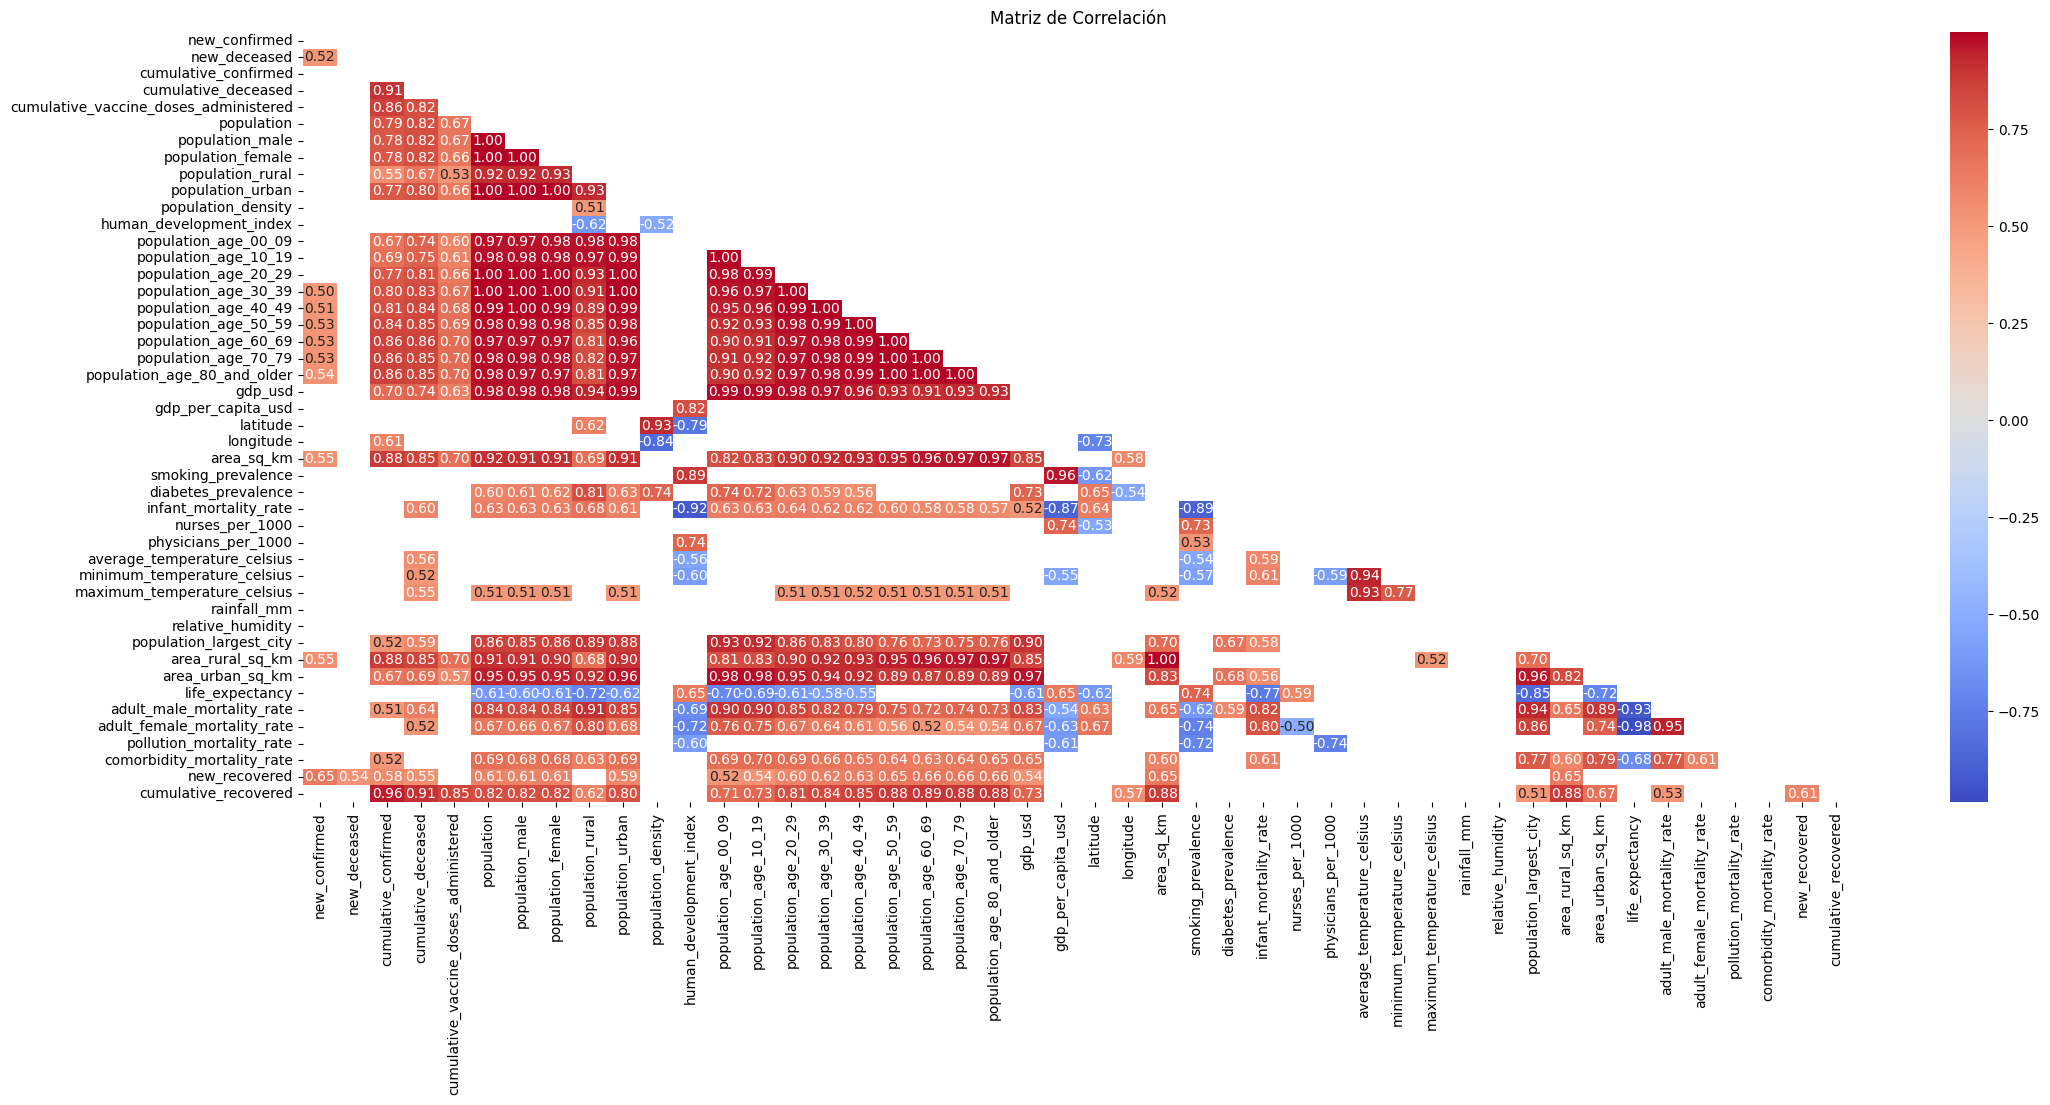

In [6]:
#Seleccionamos solo las columnas numericas
df_numerico = df_limpio.select_dtypes(include=[np.number]).columns

# Calcular la matriz de correlación
matriz_correlacion = df_limpio[df_numerico].corr()

# Mascar triangulo superior
Mask = np.triu(np.ones_like(matriz_correlacion,dtype=bool))

#vamos a filtrar por los valores superiores de correlación 0.5 donde hay una correlación fuerte
matriz_correlacion = matriz_correlacion[abs(matriz_correlacion) >abs(0.5)]

#crear matriz de correlación variables numericas
plt.figure(figsize=(25, 10))
sns.heatmap(matriz_correlacion, annot=True, mask=Mask, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')

plt.show()

Se Puede evidenciar fuertes correlaciones entre los datos, los colores rojos lo demuestran

### 4. Visualización de Datos con Matplotlib y Seaborn

Diagramas de barras para saber la relacion de nuestras variables numericas con respecto a los paises de estudio

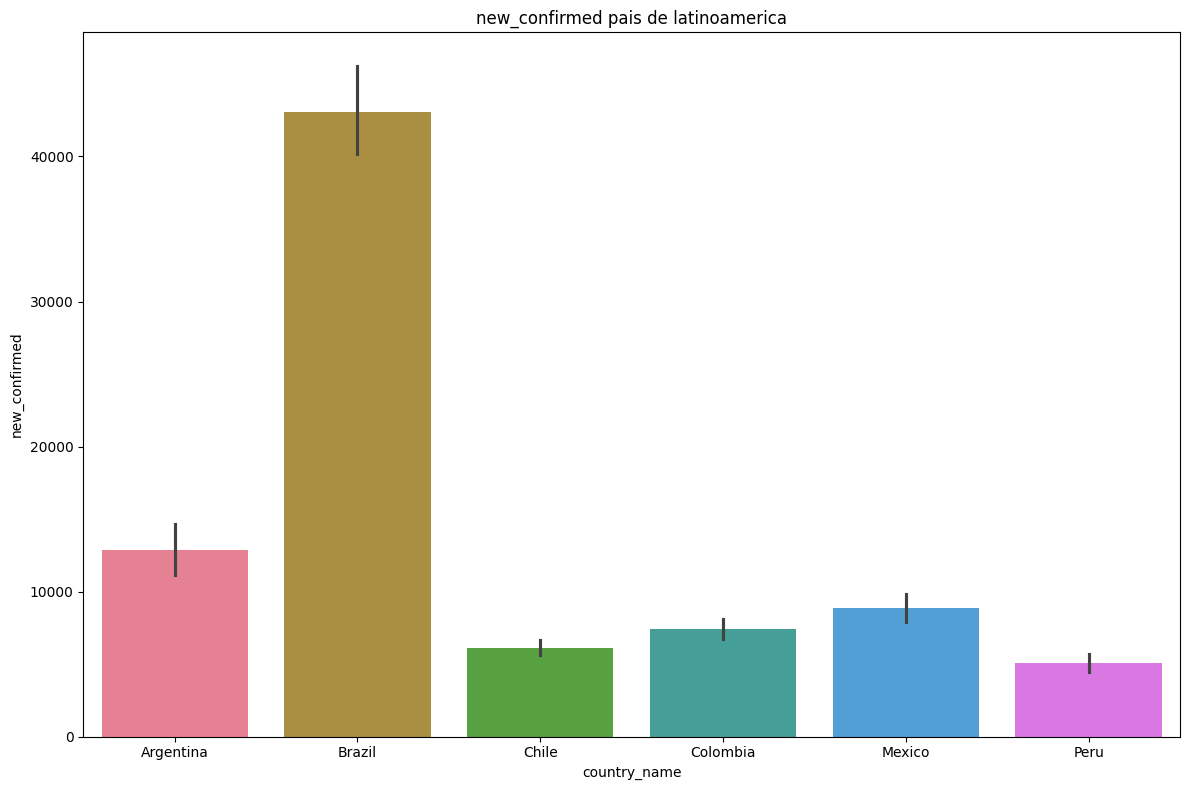

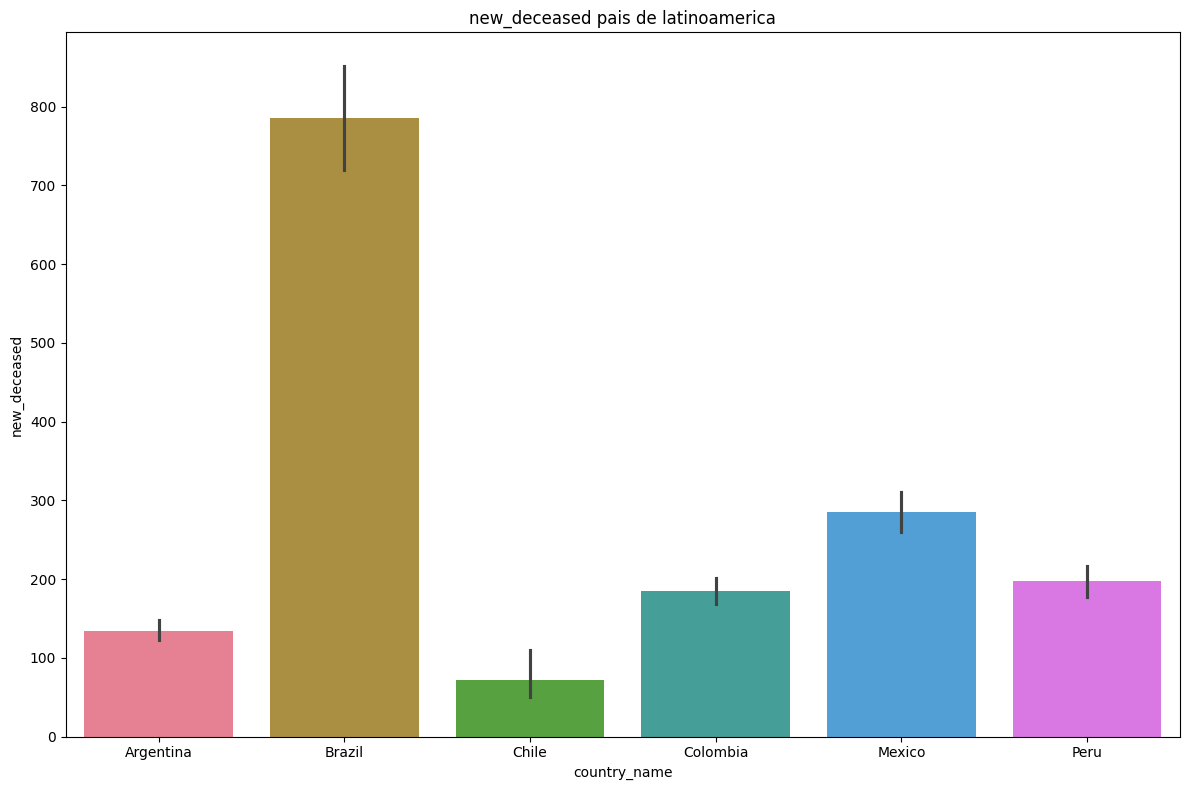

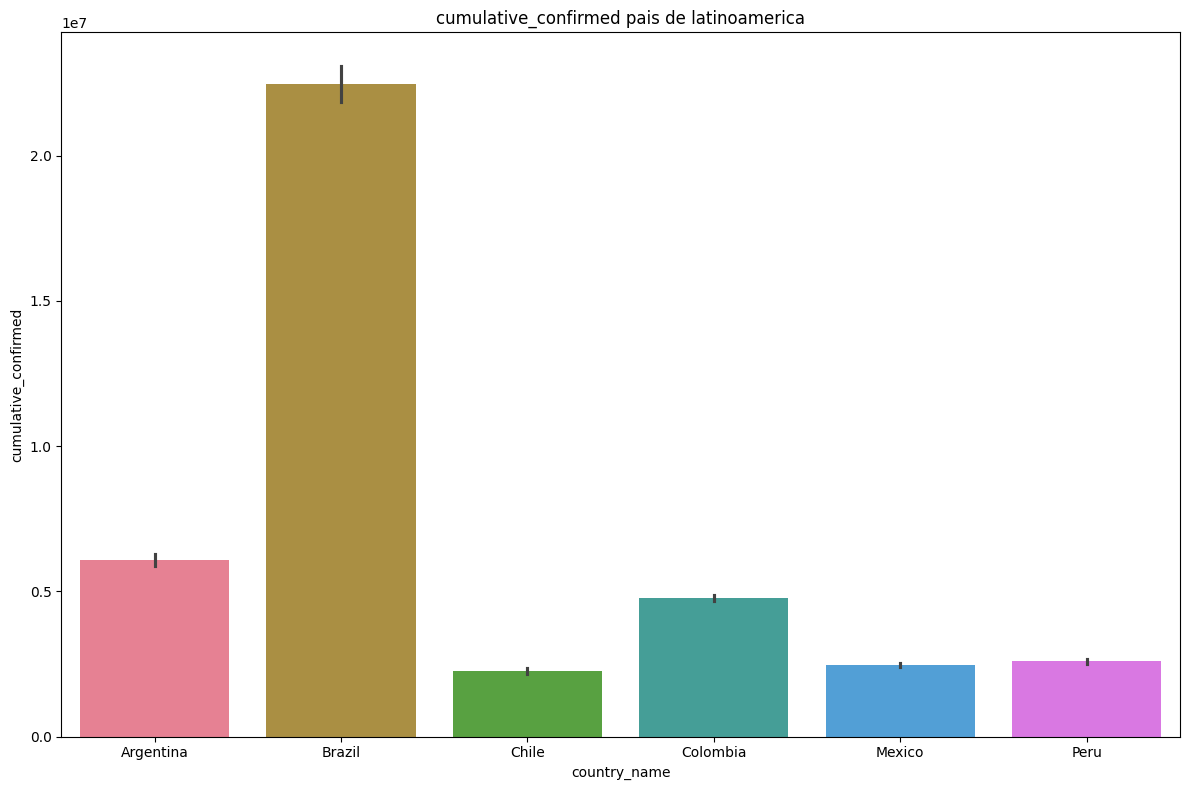

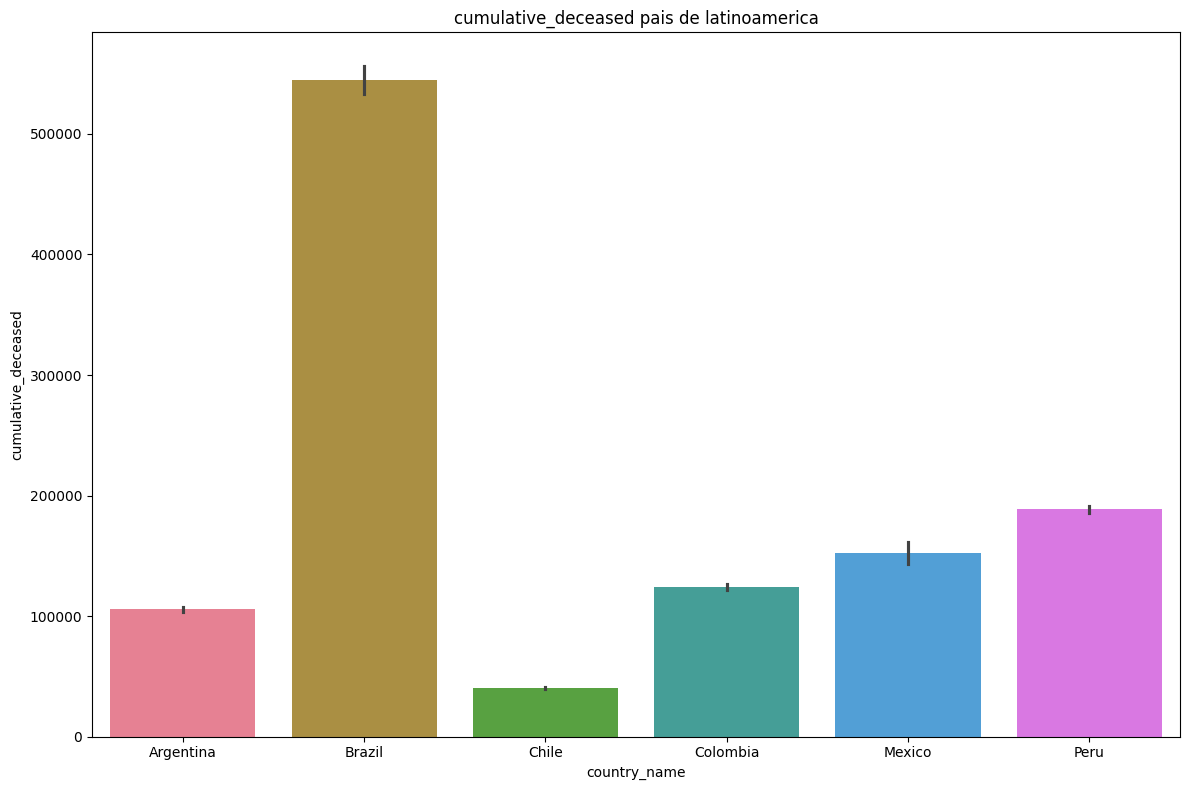

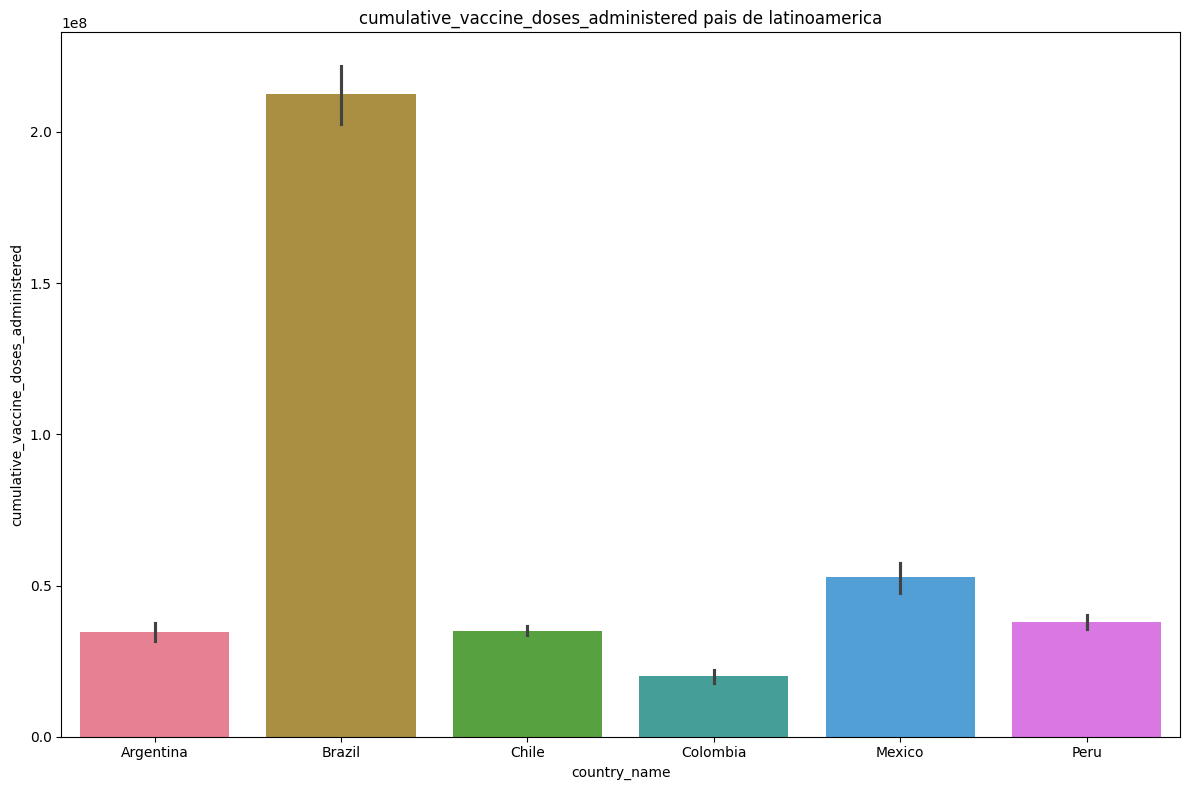

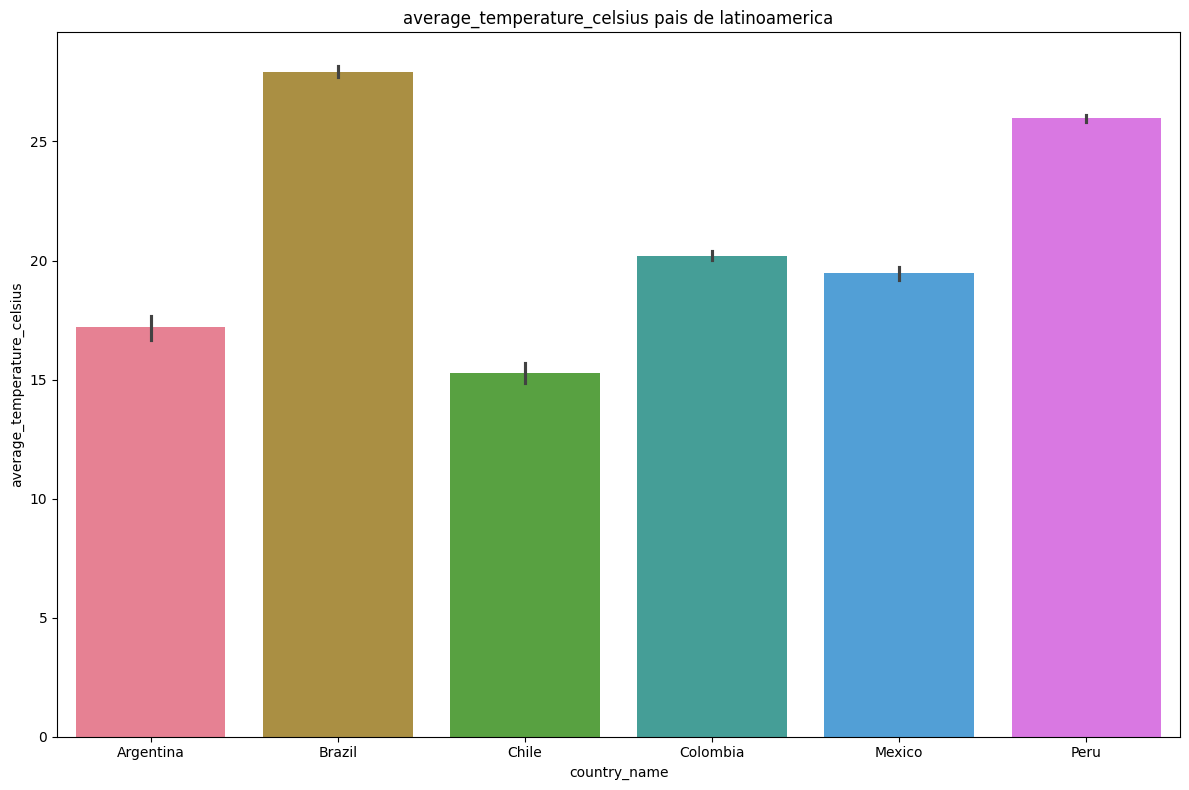

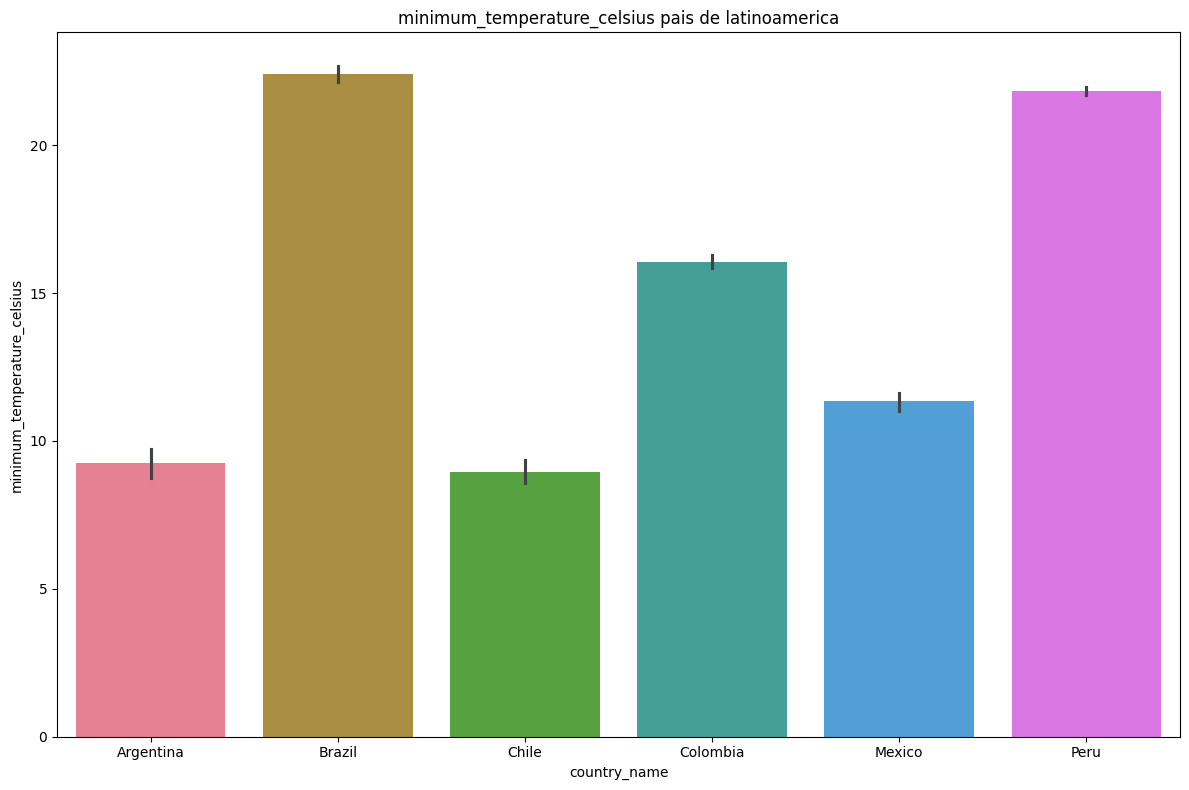

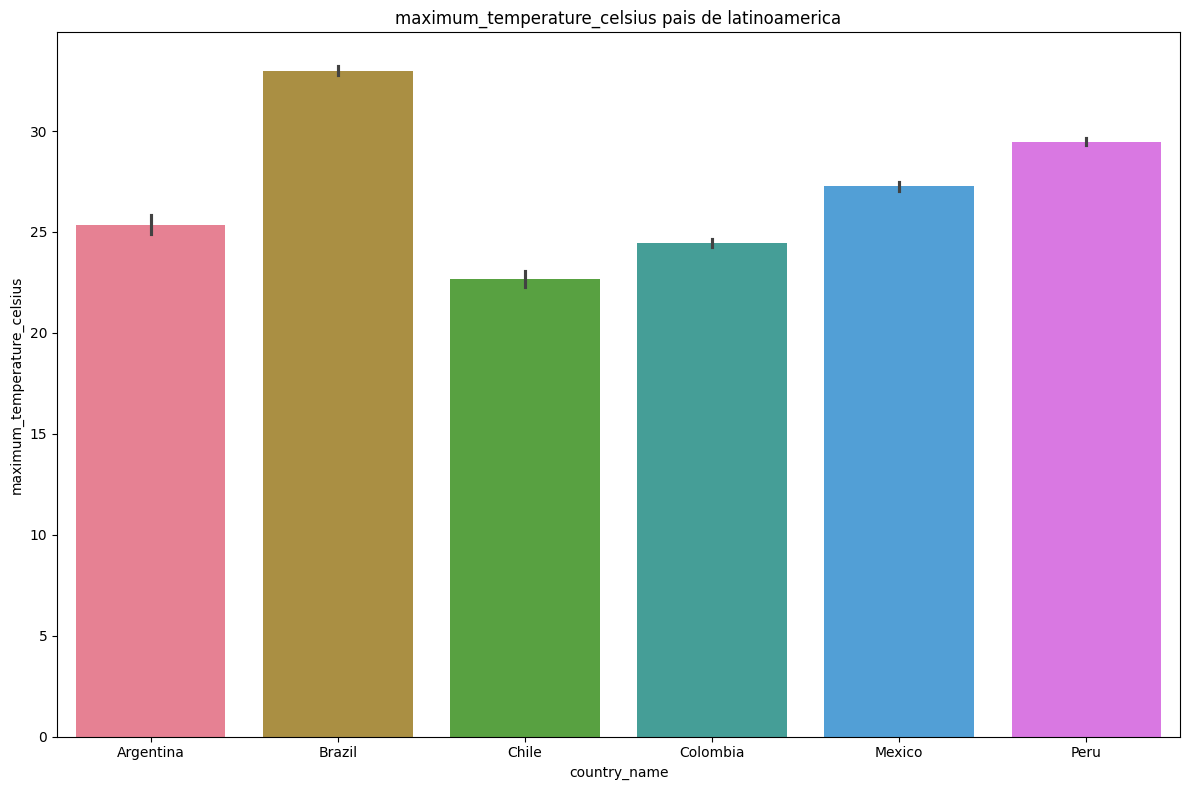

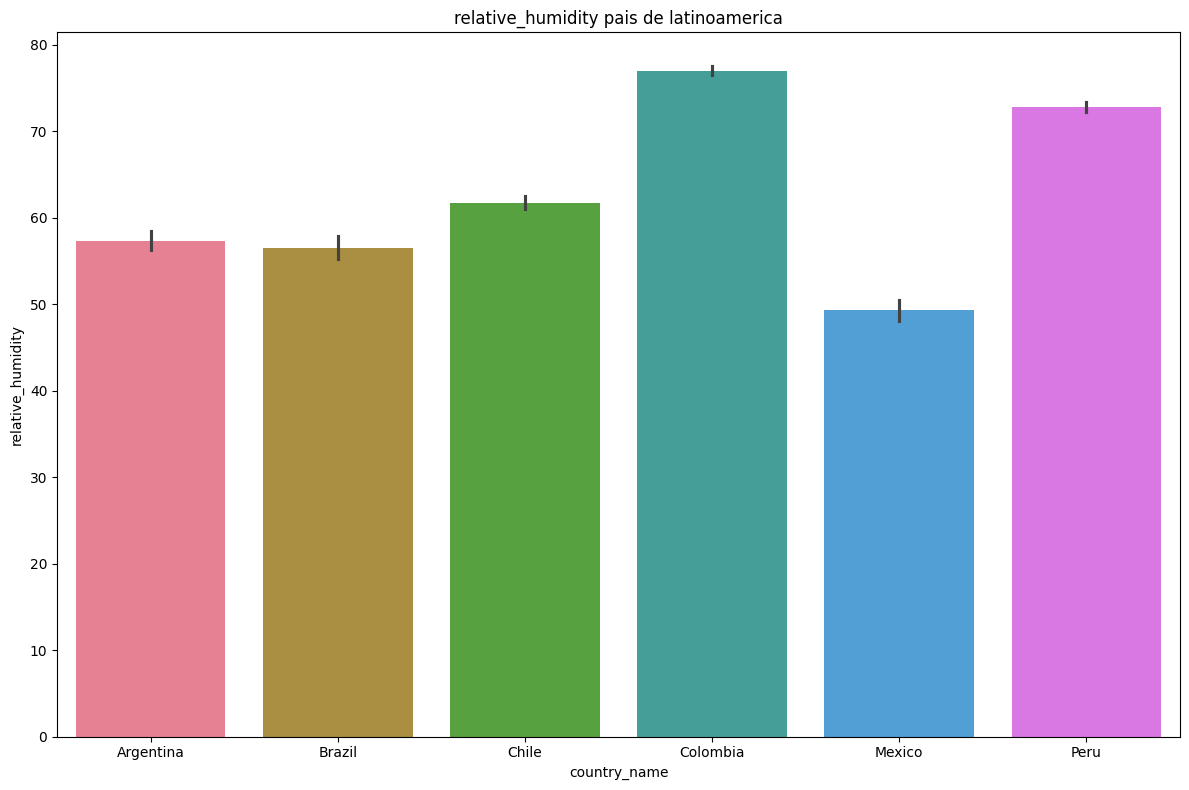

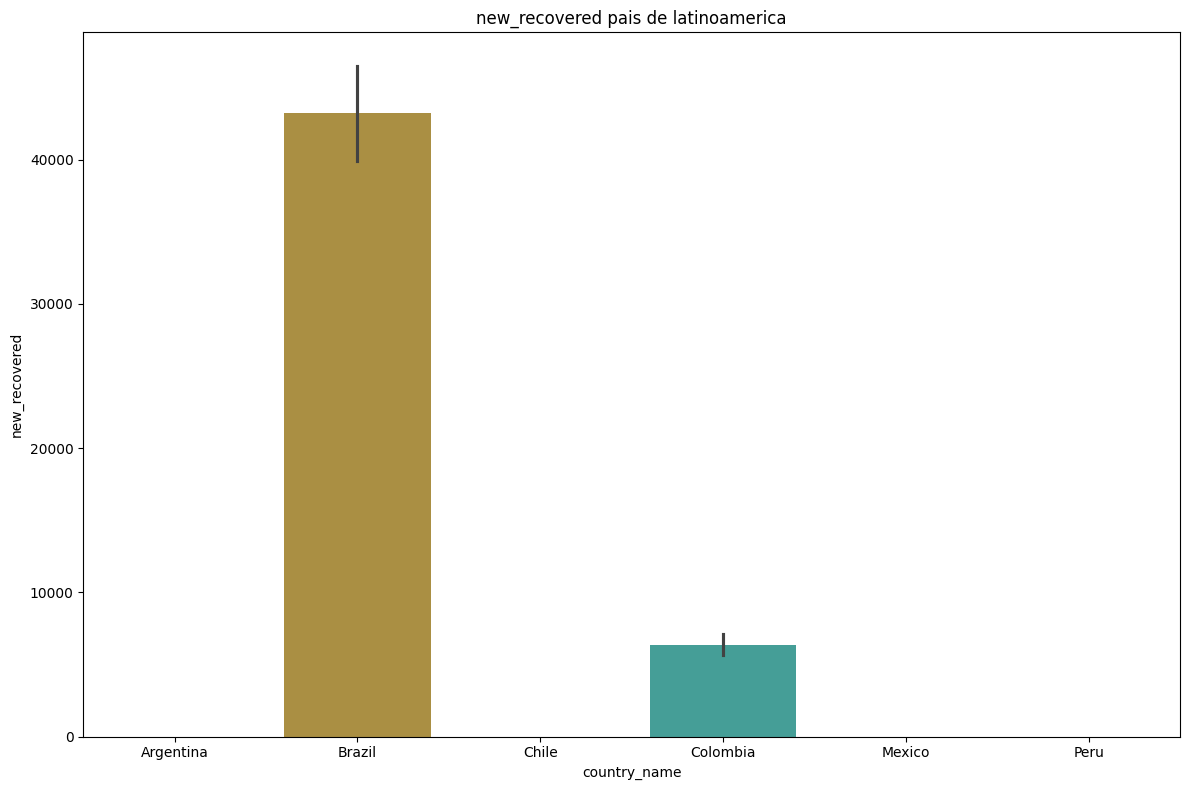

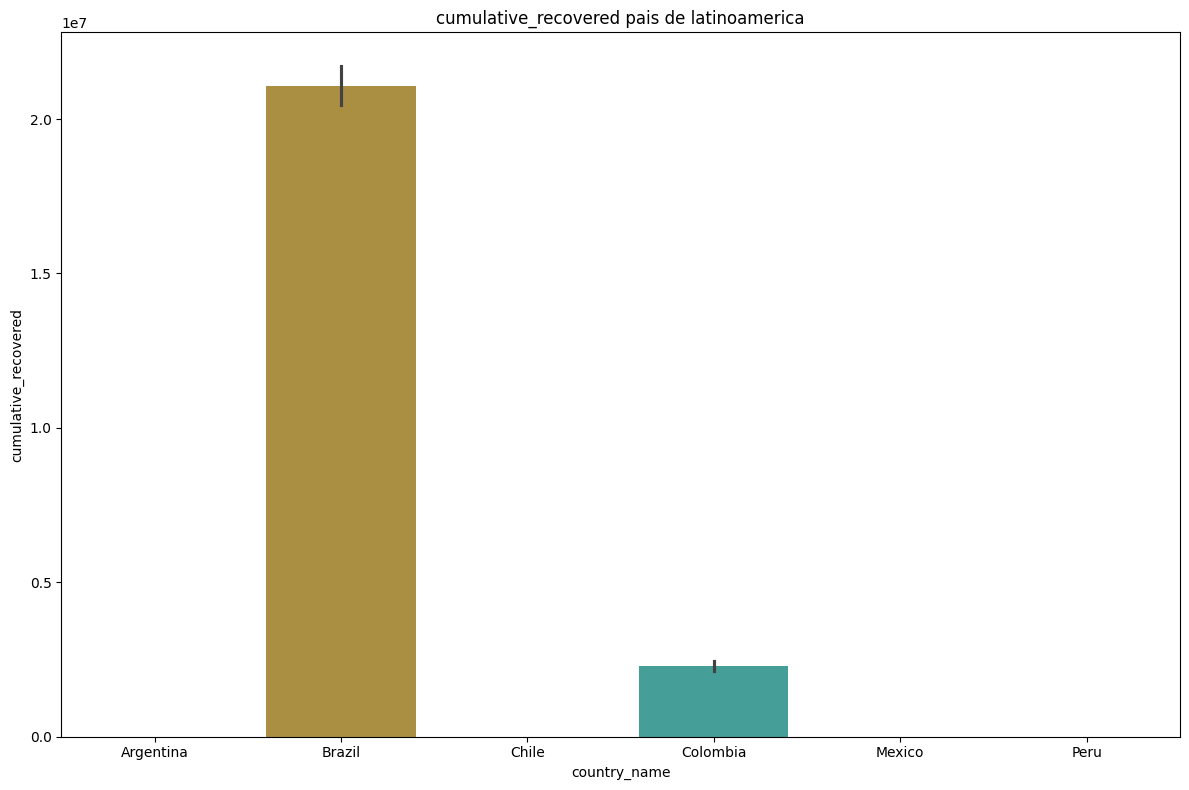

In [7]:
# diagrama de barras de la incidencia de COVID-19 por paises de estudio
numericas = ['new_confirmed','new_deceased','cumulative_confirmed',
             'cumulative_deceased','cumulative_vaccine_doses_administered',
             'average_temperature_celsius','minimum_temperature_celsius',
             'maximum_temperature_celsius','relative_humidity','new_recovered',
             'cumulative_recovered']

for i in df_limpio[numericas]:
    fig,ax= plt.subplots(figsize=(12,8))
    sns.barplot(data=df_limpio, x='country_name', y=i, ax=ax, hue='country_name')
    plt.title(f'{i} pais de latinoamerica')
    plt.tight_layout()
    
    plt.show()

Histogramas incidencia covid19, para saber y analizar mejor la distribucion de nuestros datos

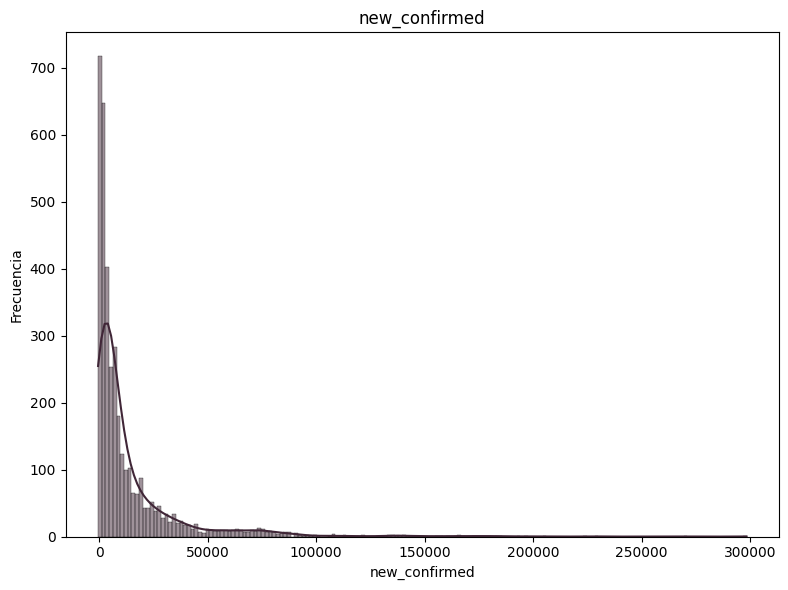

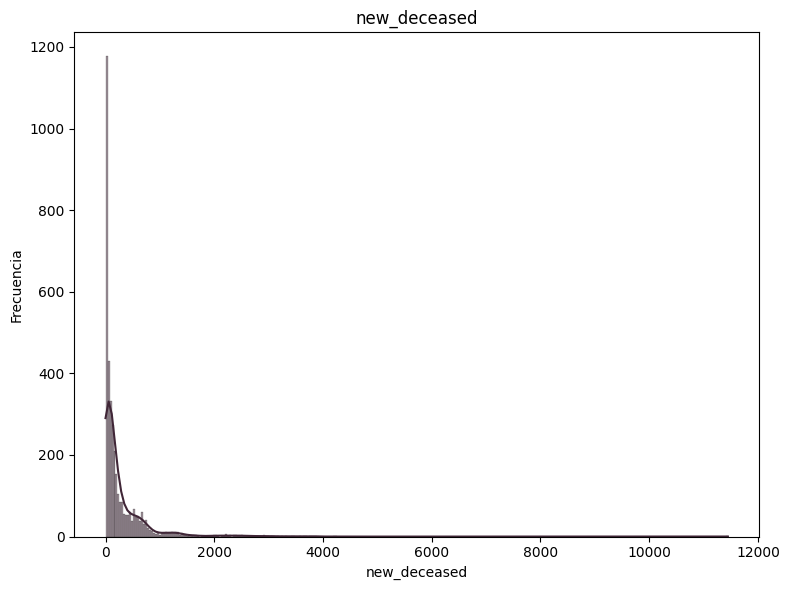

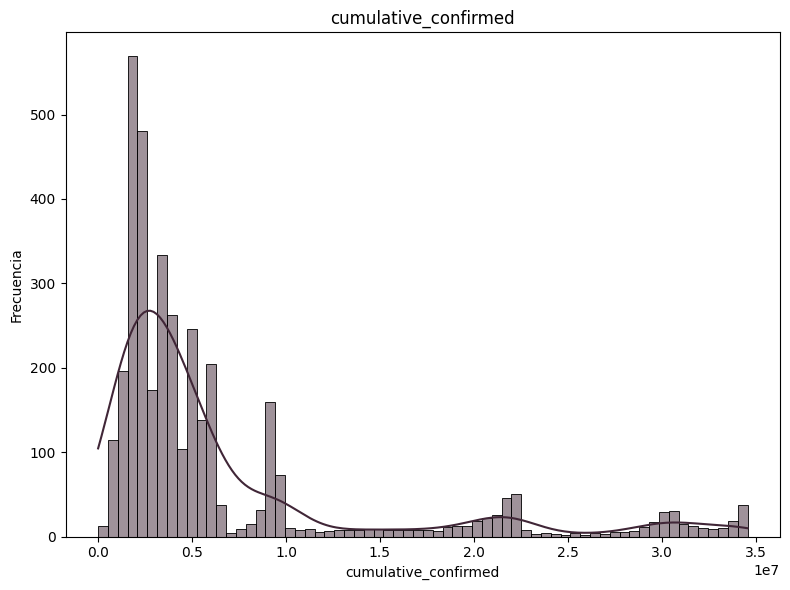

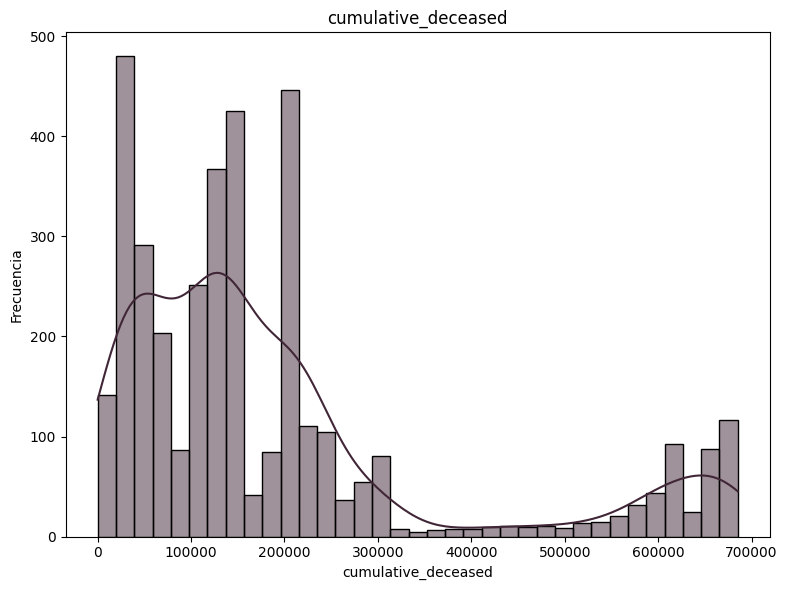

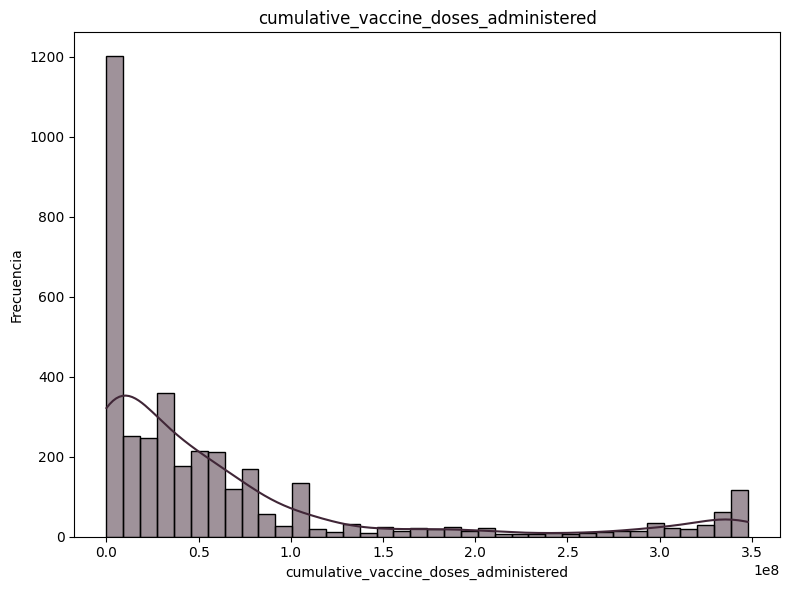

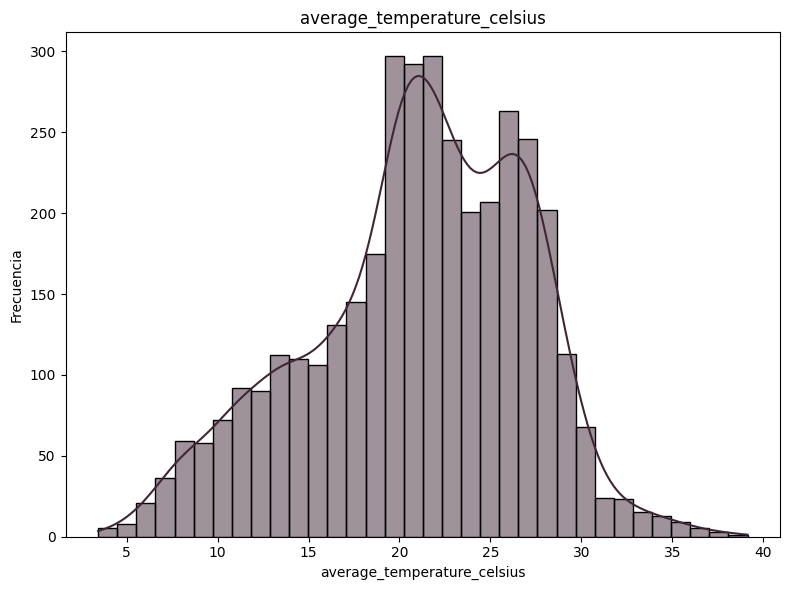

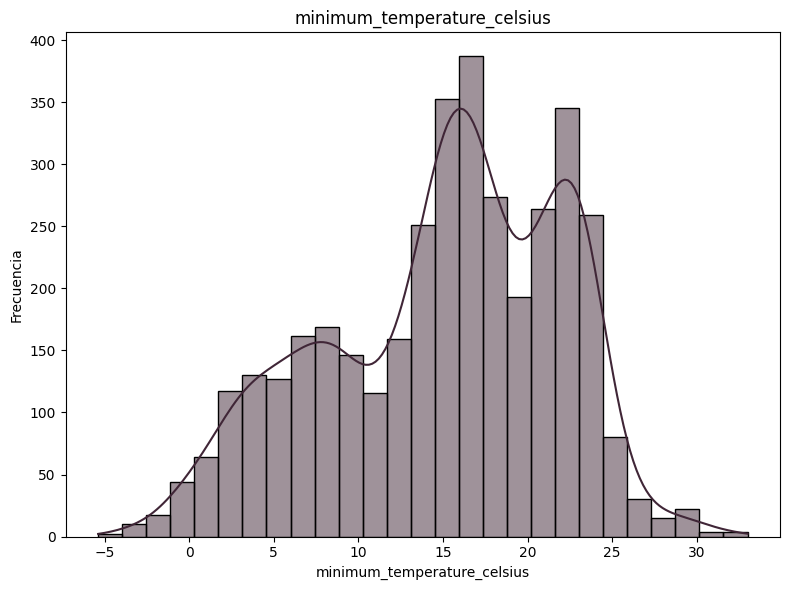

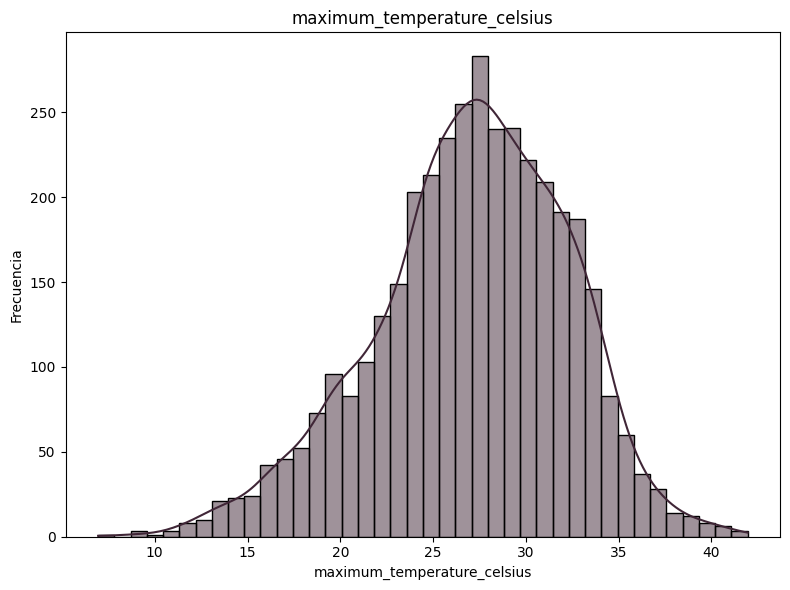

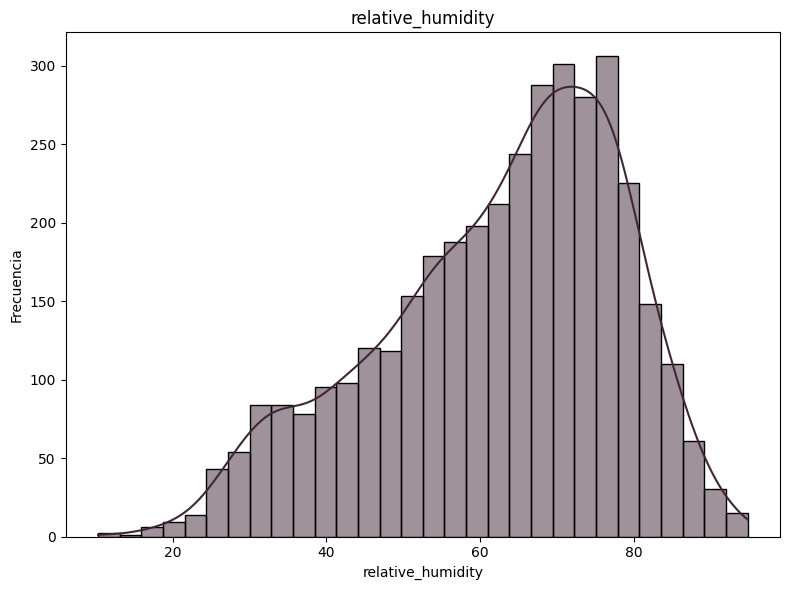

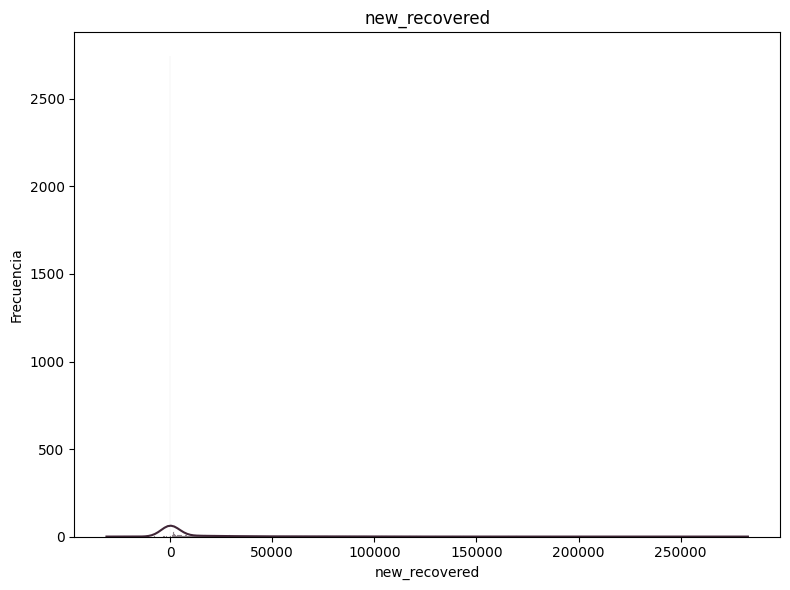

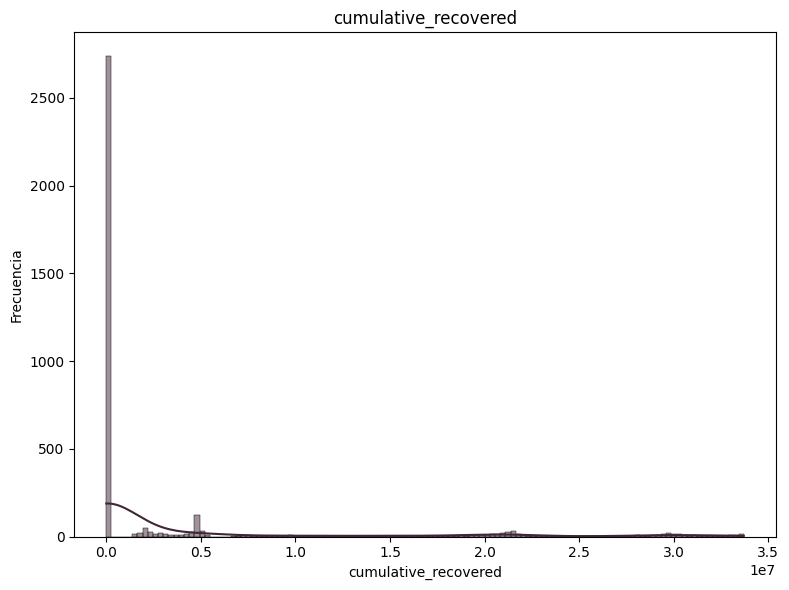

In [8]:
# Histograma de la incidencia de COVID-19 
numericas = ['new_confirmed','new_deceased','cumulative_confirmed',
             'cumulative_deceased','cumulative_vaccine_doses_administered',
             'average_temperature_celsius','minimum_temperature_celsius',
             'maximum_temperature_celsius','relative_humidity','new_recovered',
             'cumulative_recovered']

for i in df_limpio[numericas]:
    fig,ax= plt.subplots(figsize=(8,6))
    sns.histplot(data=df_limpio[i], kde=True)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


Ahora procedemos a hacer un analisis de relacional entre el promedio de temperatura en Celius vs nuevos casos confirmados y muertes

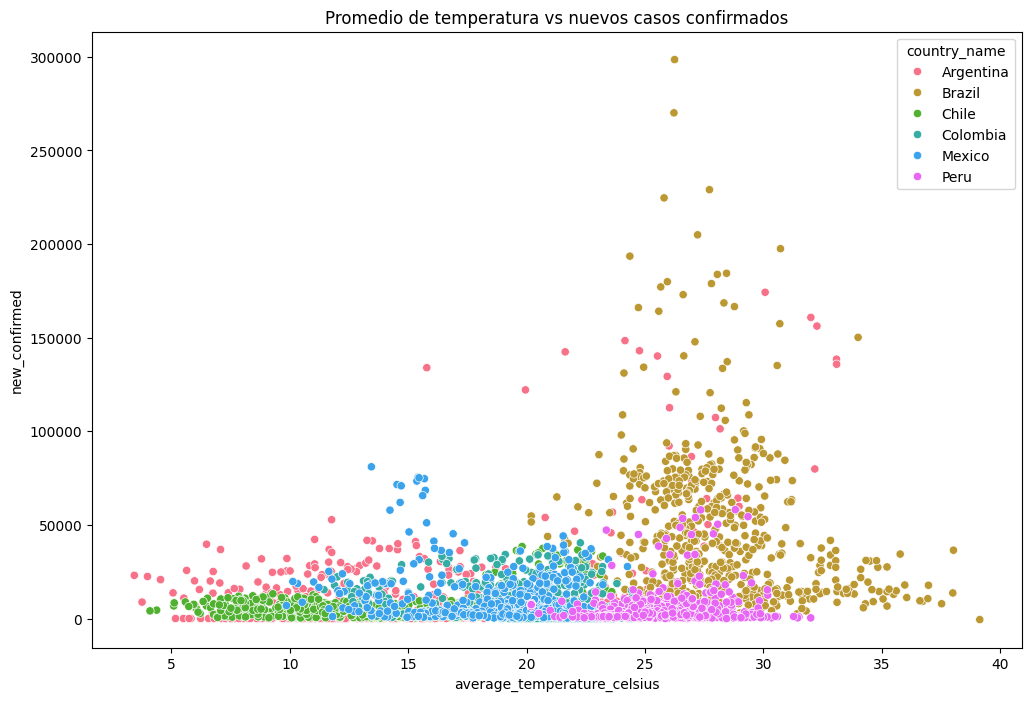

In [9]:
#Grafico relacional entre el promedio de temperatura en celsius vs los nuevos casos confirmados
fig,ax= plt.subplots(figsize=(12,8))
sns.scatterplot(data=df_limpio, x='average_temperature_celsius', y='new_confirmed', hue='country_name')
plt.title('Promedio de temperatura vs nuevos casos confirmados')
plt.show()

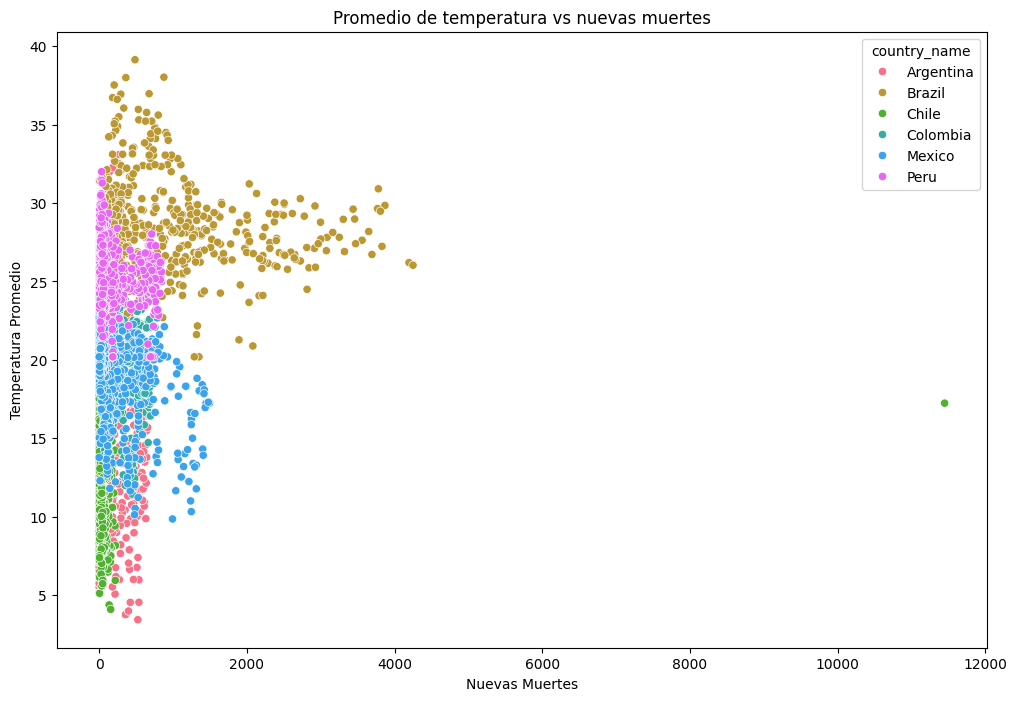

In [10]:
#Grafico relacional entre el promedio de temperatura en celsius vs los nuevas muertes
fig,ax= plt.subplots(figsize=(12,8))
sns.scatterplot(x='new_deceased', y='average_temperature_celsius', hue='country_name', data=df_limpio)
plt.title('Promedio de temperatura vs nuevas muertes')
plt.xlabel('Nuevas Muertes')
plt.ylabel('Temperatura Promedio')
plt.show()

Vamos a hacer un analisis del comportamiento de las dosis administradas por país

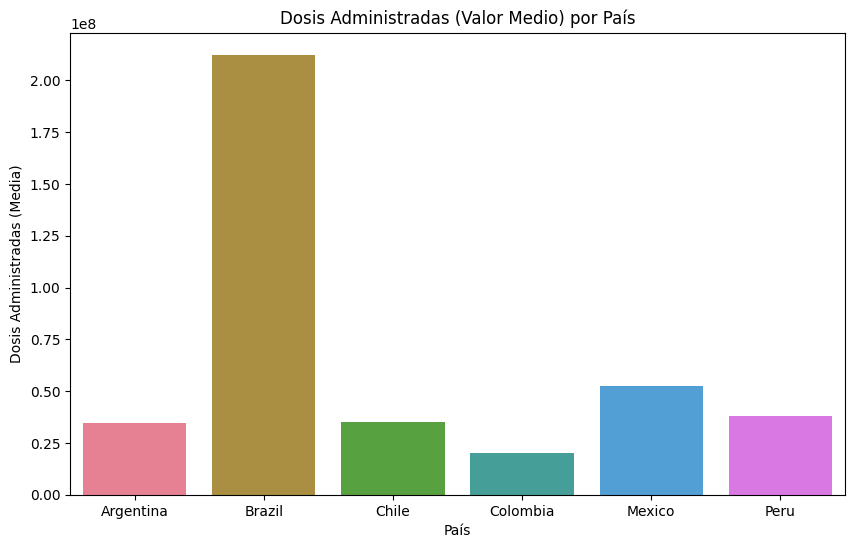

In [11]:
# Variable de dosis promedio por pais
dosis_promedio_pais = df_limpio.groupby('country_name')['cumulative_vaccine_doses_administered'].mean().reset_index()

# Creamos el grafico de barras para analizar dosis promedio por pais
figure,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=dosis_promedio_pais, x='country_name', y='cumulative_vaccine_doses_administered', hue='country_name')
plt.title('Dosis Administradas (Valor Medio) por País')
plt.xlabel('País')
plt.ylabel('Dosis Administradas (Media)')
plt.show()

En la grafica se evidencia una diferencia muy grande entre las dosis administradas por Brazil con respecto a los otros 5 paises de estudio, esto obviamente debido seguramente a la diferencia entre sus poblaciones.

Evolución de dosis administradas por mes de cada país. 

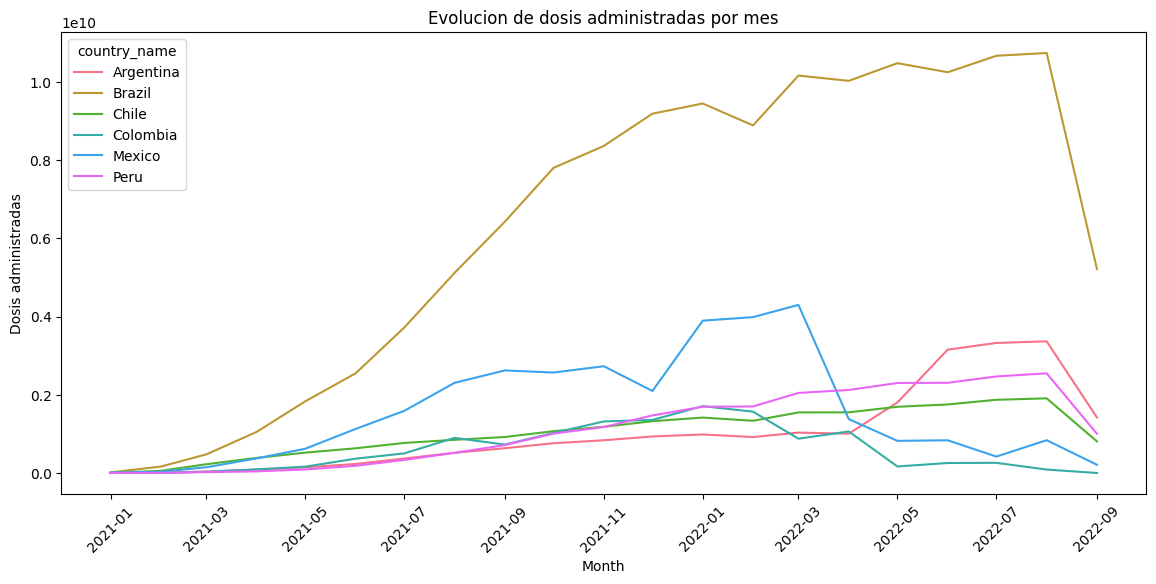

In [12]:
# Convertir la columna de fecha a datetime si no lo está ya
df_limpio = df_limpio.copy()
df_limpio['date'] = pd.to_datetime(df_limpio['date'])

#Agregamos al data frame df_limpio la columna Mes para poder hacer el analisis mensual
df_limpio['month'] = df_limpio['date'].dt.to_period('M')

# Convertir la columna 'month' a tipo datetime
df_limpio['month'] = df_limpio['month'].dt.to_timestamp()

# Creamos el grafico de lineas para mirar la evolucion de las dosis administradas por mes de cada pais
dosis_mensual_pais = df_limpio.groupby(['country_name','month'])['cumulative_vaccine_doses_administered'].sum().reset_index()
#grafico de lineas
figure,ax= plt.subplots(figsize=(14,6))
sns.lineplot(data=dosis_mensual_pais, x='month', y='cumulative_vaccine_doses_administered', hue='country_name')
plt.title('Evolucion de dosis administradas por mes')
plt.xlabel('Month')
plt.ylabel('Dosis administradas')
plt.xticks(rotation=45)
plt.show()

Evolución Muertes por mes de cada país. 

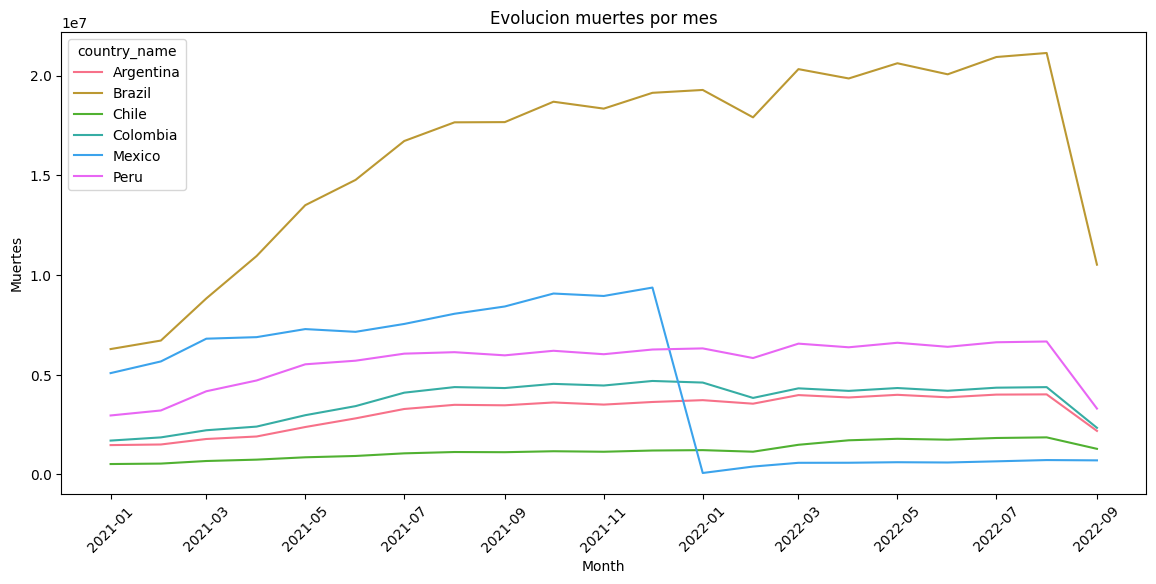

country_name      month  cumulative_deceased
0    Argentina 2021-01-01            1473335.0
1    Argentina 2021-02-01            1504273.0
2    Argentina 2021-03-01            1780095.0
3    Argentina 2021-04-01            1904931.0
4    Argentina 2021-05-01            2379980.0

In [13]:
# Creamos el grafico de lineas para mirar la evolucion de las muertes por mes de cada pais
muertes_mensual_pais = df_limpio.groupby(['country_name','month'])['cumulative_deceased'].sum().reset_index()
#grafico de lineas
figure,ax= plt.subplots(figsize=(14,6))
sns.lineplot(data=muertes_mensual_pais, x='month', y='cumulative_deceased', hue='country_name')
plt.title('Evolucion muertes por mes')
plt.xlabel('Month')
plt.ylabel('Muertes')
plt.xticks(rotation=45)
plt.show()

muertes_mensual_pais.head()

Casos confirmados por mes de cada pais

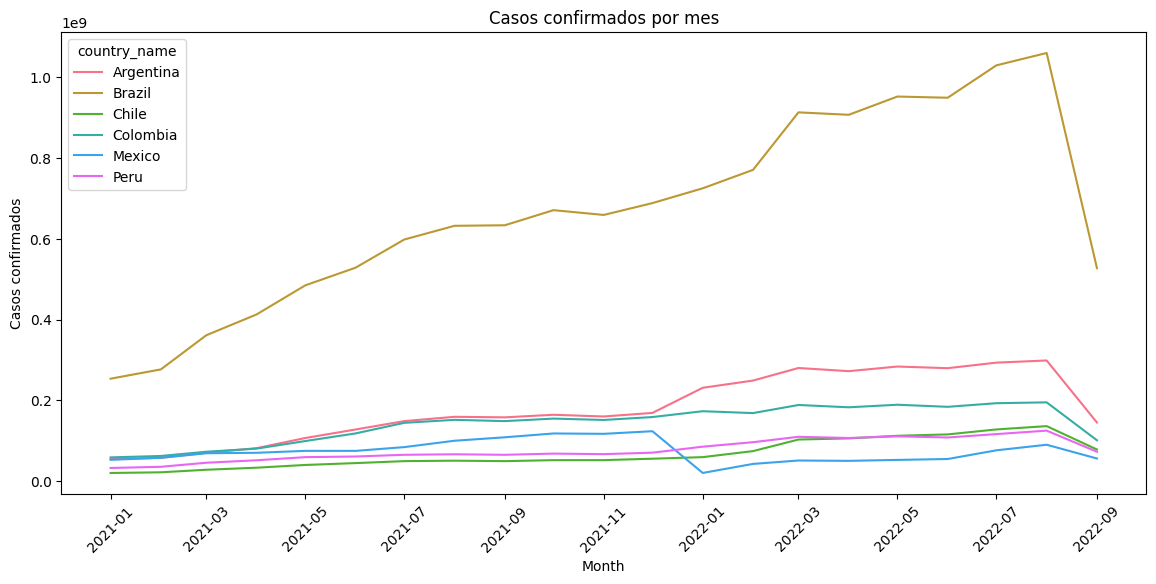

In [14]:
# Creamos el grafico de lineas para mirar la evolucion de casos confirmados por mes de cada pais
casos_confirmados_mensual_pais = df_limpio.groupby(['country_name','month'])['cumulative_confirmed'].sum().reset_index()
#grafico de lineas
figure,ax= plt.subplots(figsize=(14,6))
sns.lineplot(data=casos_confirmados_mensual_pais, x='month', y='cumulative_confirmed', hue='country_name')
plt.title('Casos confirmados por mes')
plt.xlabel('Month')
plt.ylabel('Casos confirmados')
plt.xticks(rotation=45)
plt.show()

Recuperados por mes de cada pais

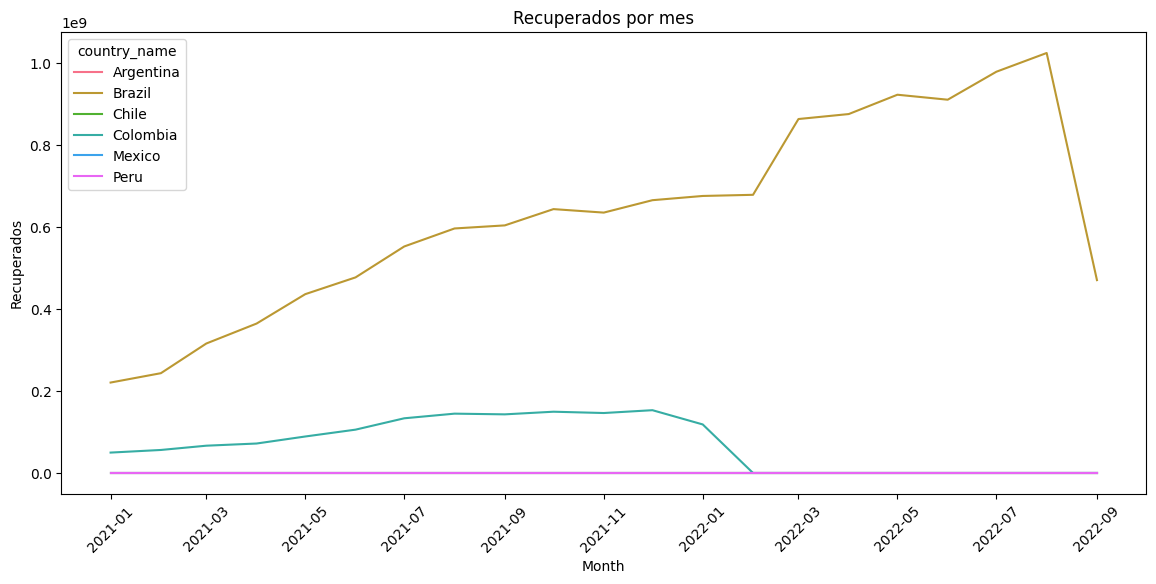

In [15]:
# Creamos el grafico de lineas para mirar la evolucion de los recuperados por mes de cada pais
recuperados_mensual_pais = df_limpio.groupby(['country_name','month'])['cumulative_recovered'].sum().reset_index()
#grafico de lineas
figure,ax= plt.subplots(figsize=(14,6))
sns.lineplot(data=recuperados_mensual_pais, x='month', y='cumulative_recovered', hue='country_name')
plt.title('Recuperados por mes')
plt.xlabel('Month')
plt.ylabel('Recuperados')
plt.xticks(rotation=45)
plt.show()

Comparación del Número de Casos Nuevos entre Países. 

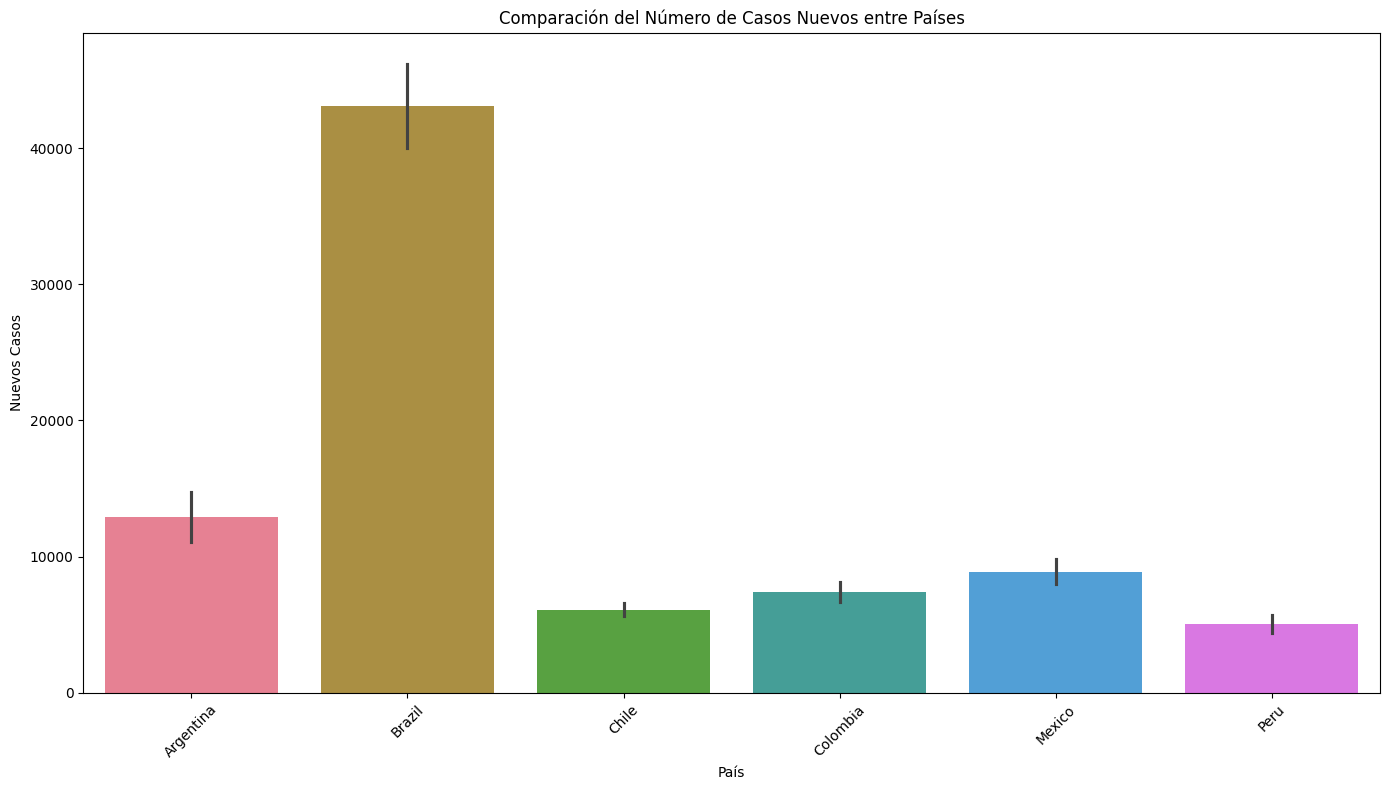

In [16]:
# Creamos el grafico de barras Comparar el Número de Casos Nuevos entre Países. 
figure,ax = plt.subplots(figsize=(14, 8))
sns.barplot(x='country_name', y='new_confirmed', data=df_limpio, hue='country_name')
plt.title('Comparación del Número de Casos Nuevos entre Países')
plt.xlabel('País')
plt.ylabel('Nuevos Casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribucion de Dosis acumuladas por país 

<Figure size 1400x600 with 0 Axes>

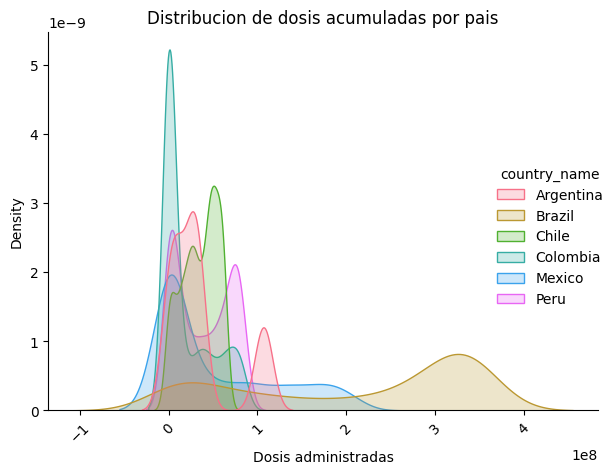

In [17]:
#Creamos el grafico de distribucion de dosis acumuladas por pais
plt.figure(figsize=(14,6))
sns.displot(data=df_limpio, hue='country_name', x='cumulative_vaccine_doses_administered', kind='kde', fill=True)
plt.title('Distribucion de dosis acumuladas por pais')
plt.xlabel('Dosis administradas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Boxplot de temperatura media de cada país. 

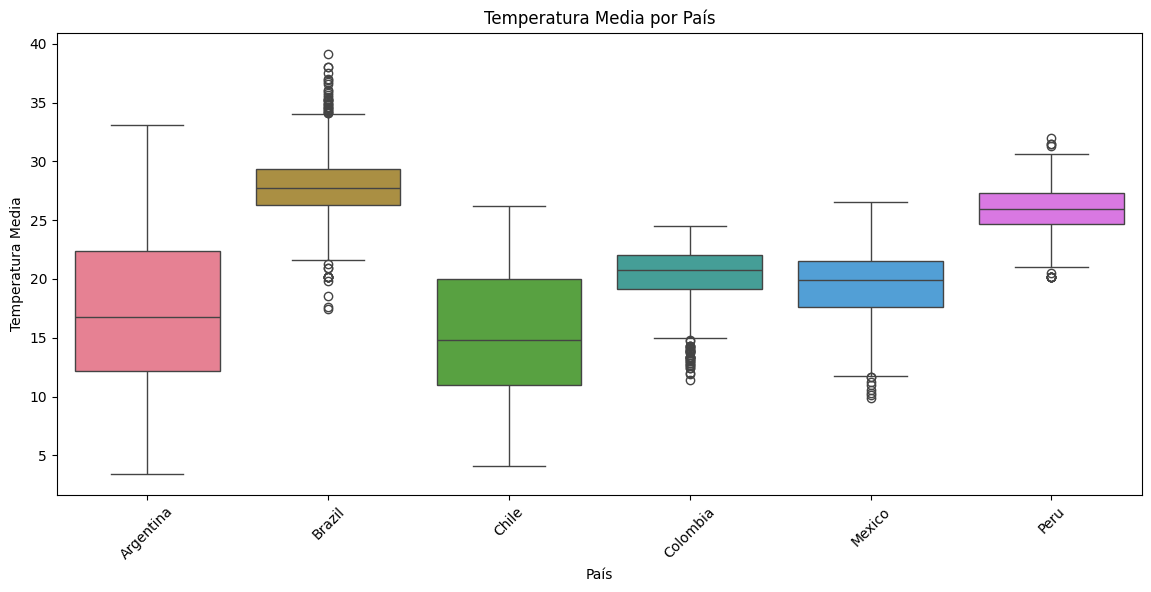

In [18]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=df_limpio, hue='country_name')
plt.title('Temperatura Media por País')
plt.xlabel('País')
plt.ylabel('Temperatura Media')
plt.xticks(rotation=45)
plt.show()

Violinplot de las variables que “Sí” tenga cambios de valores. 

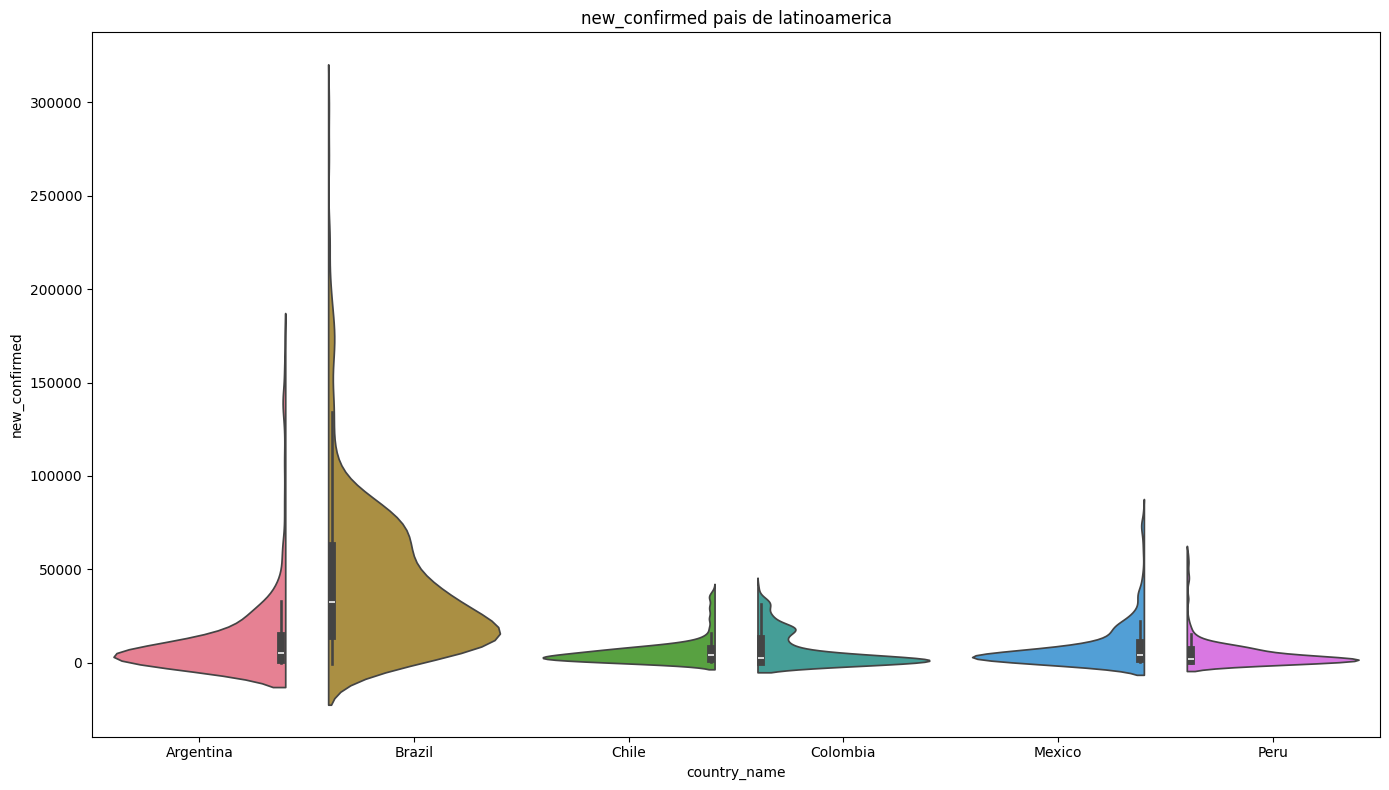

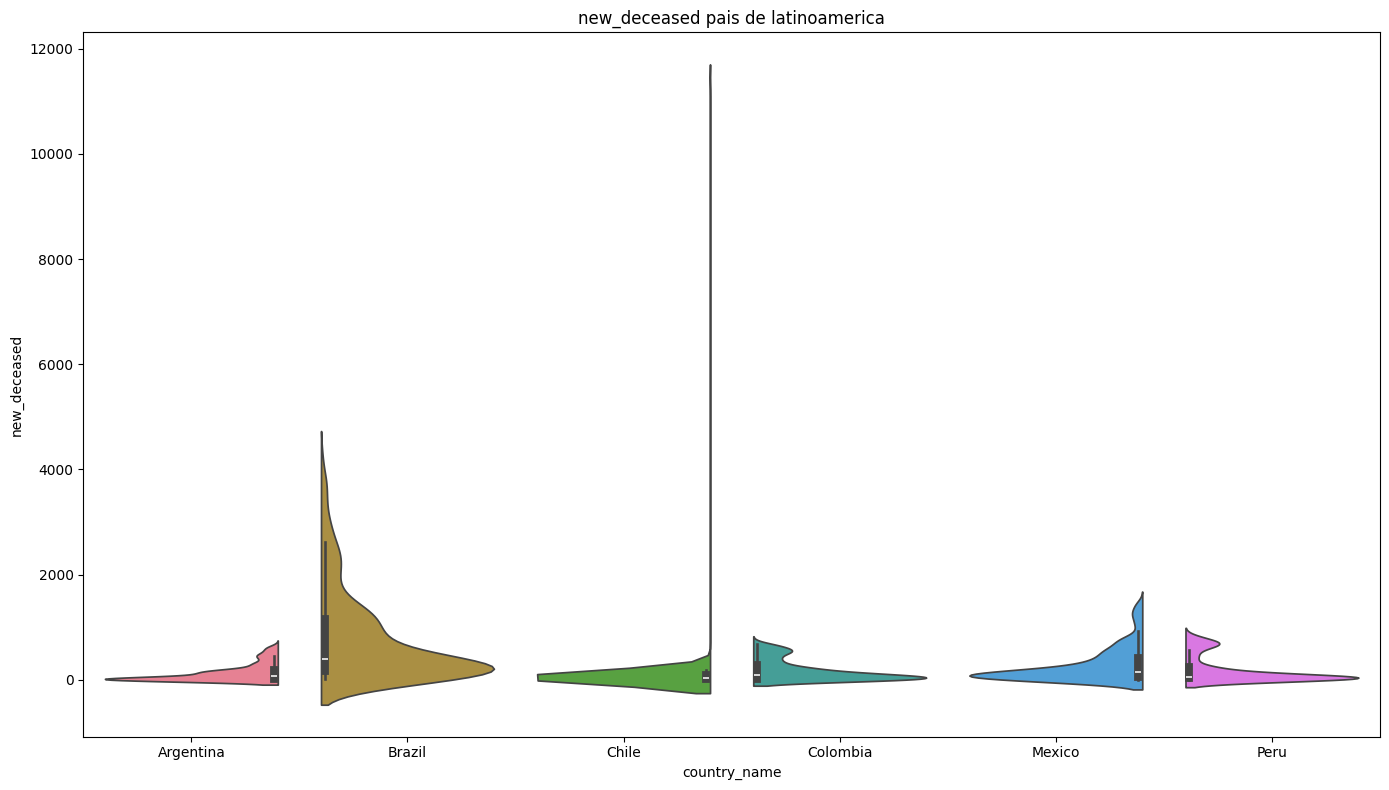

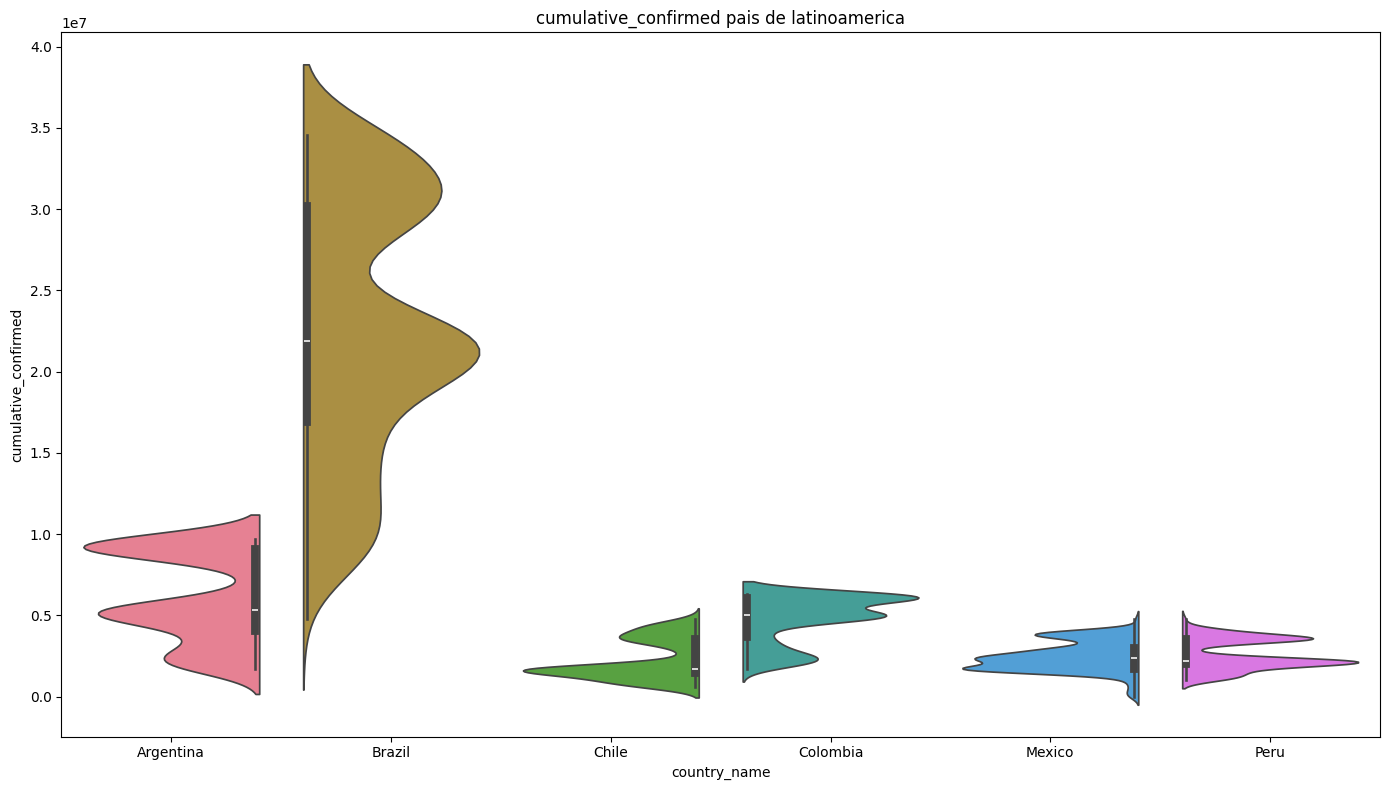

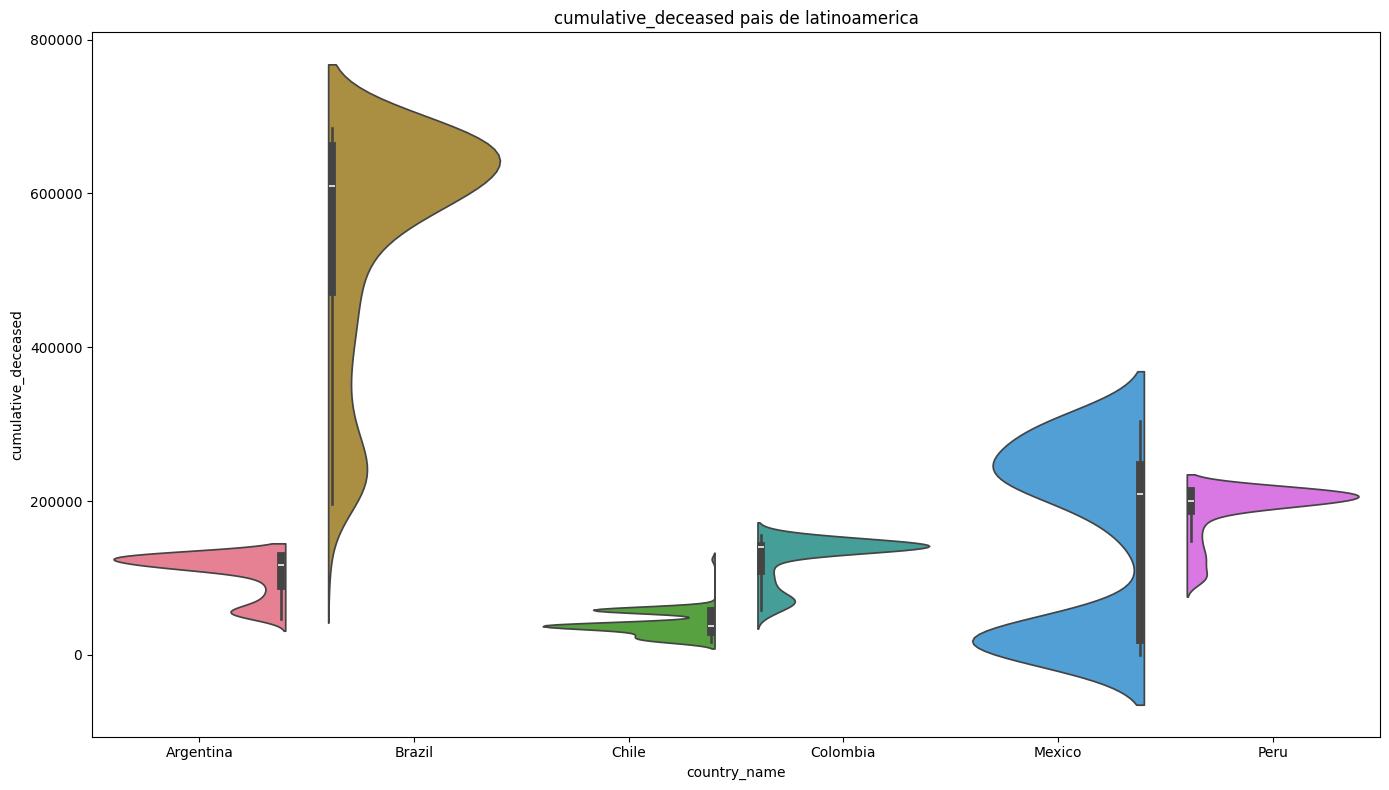

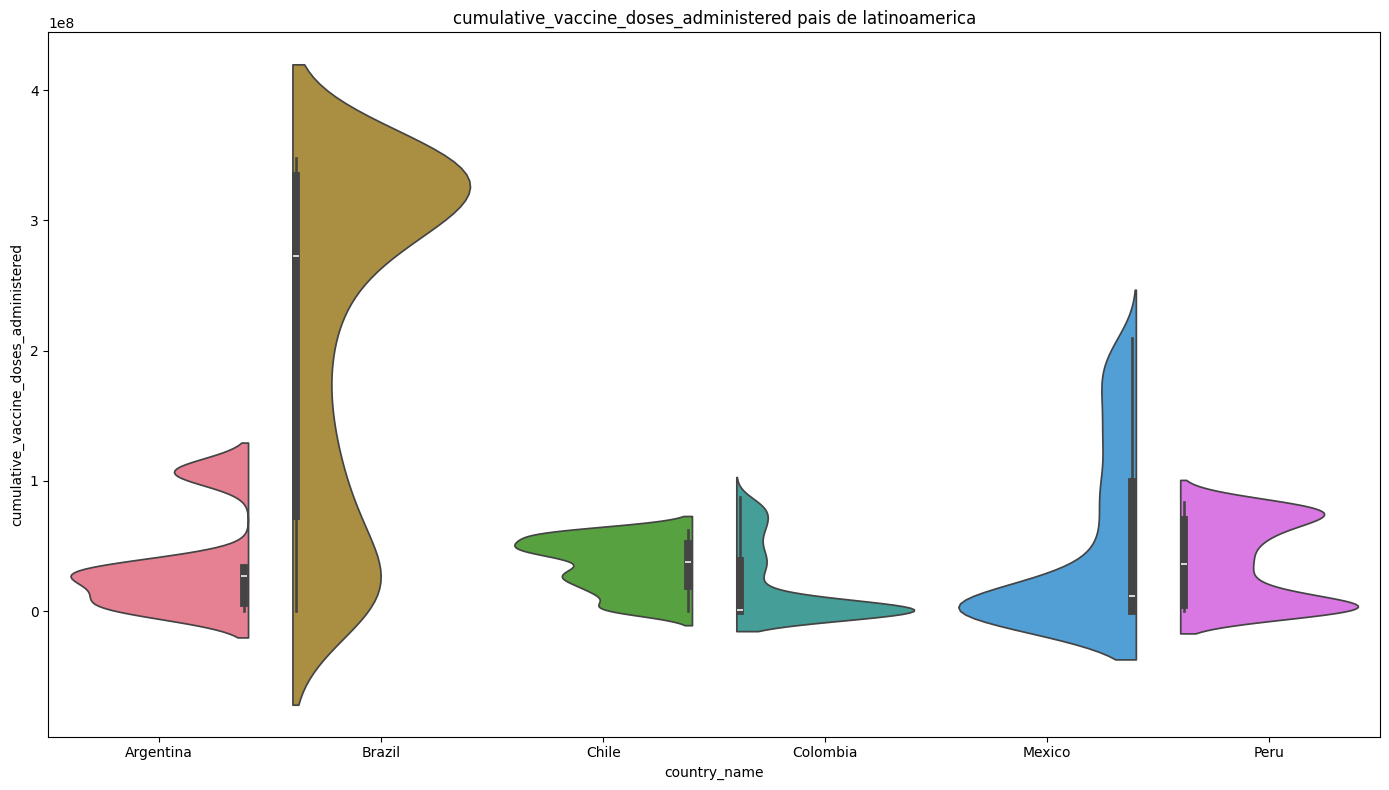

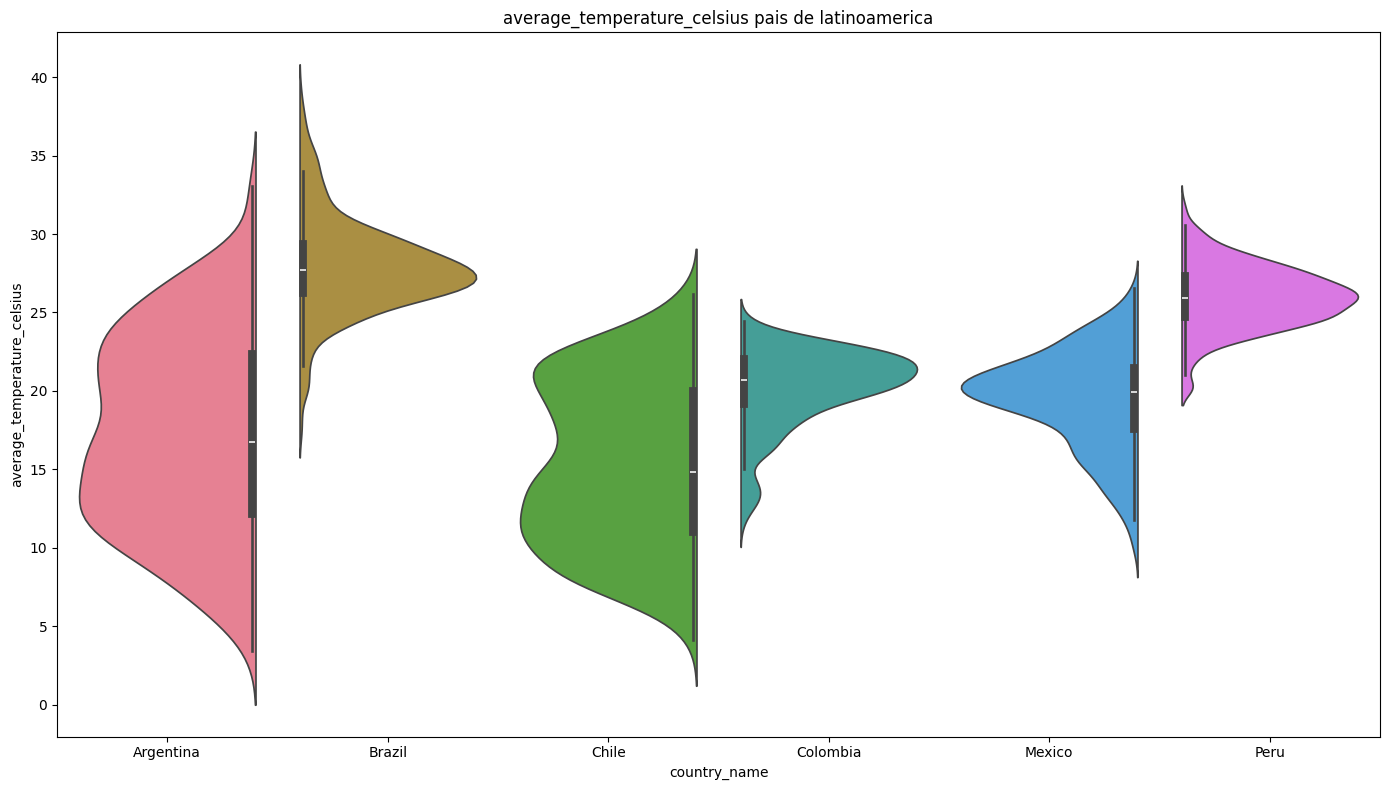

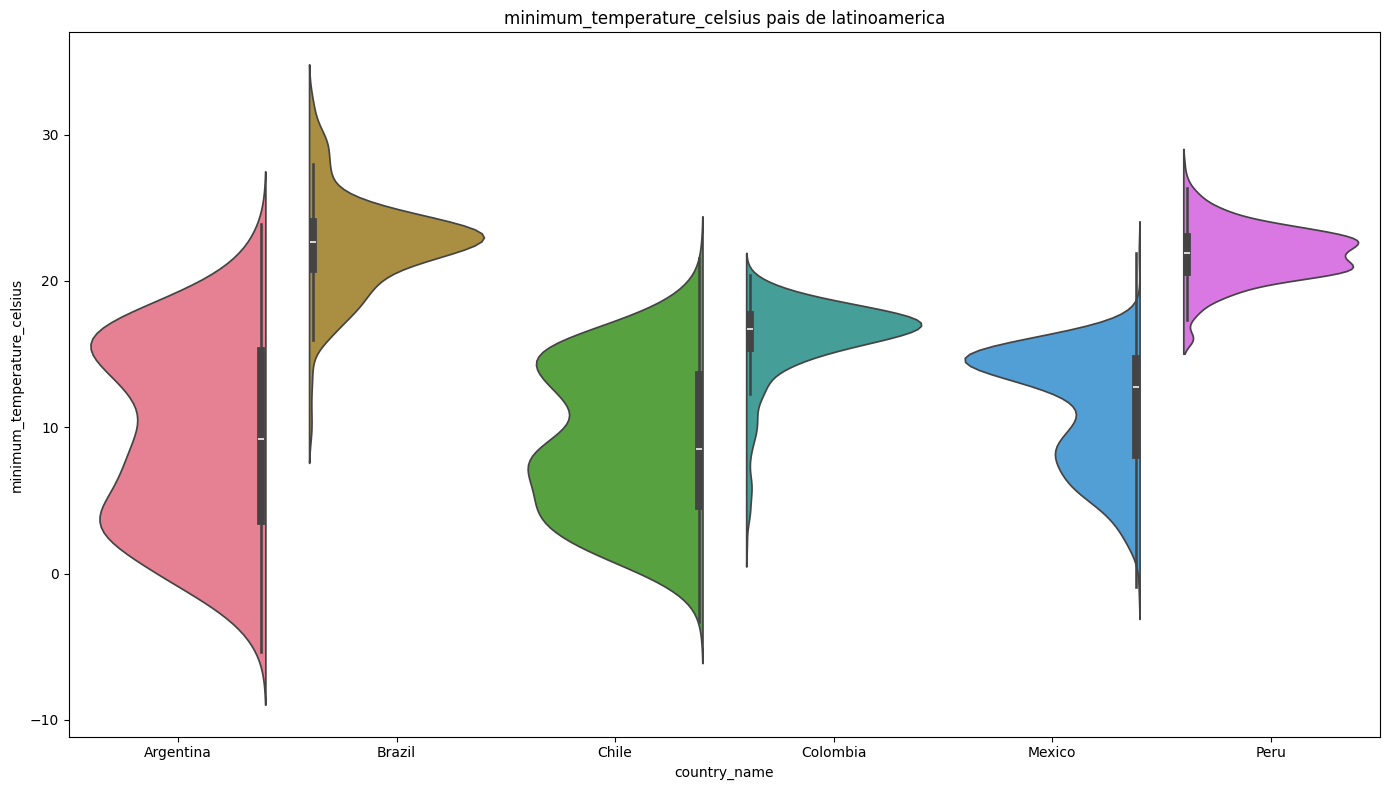

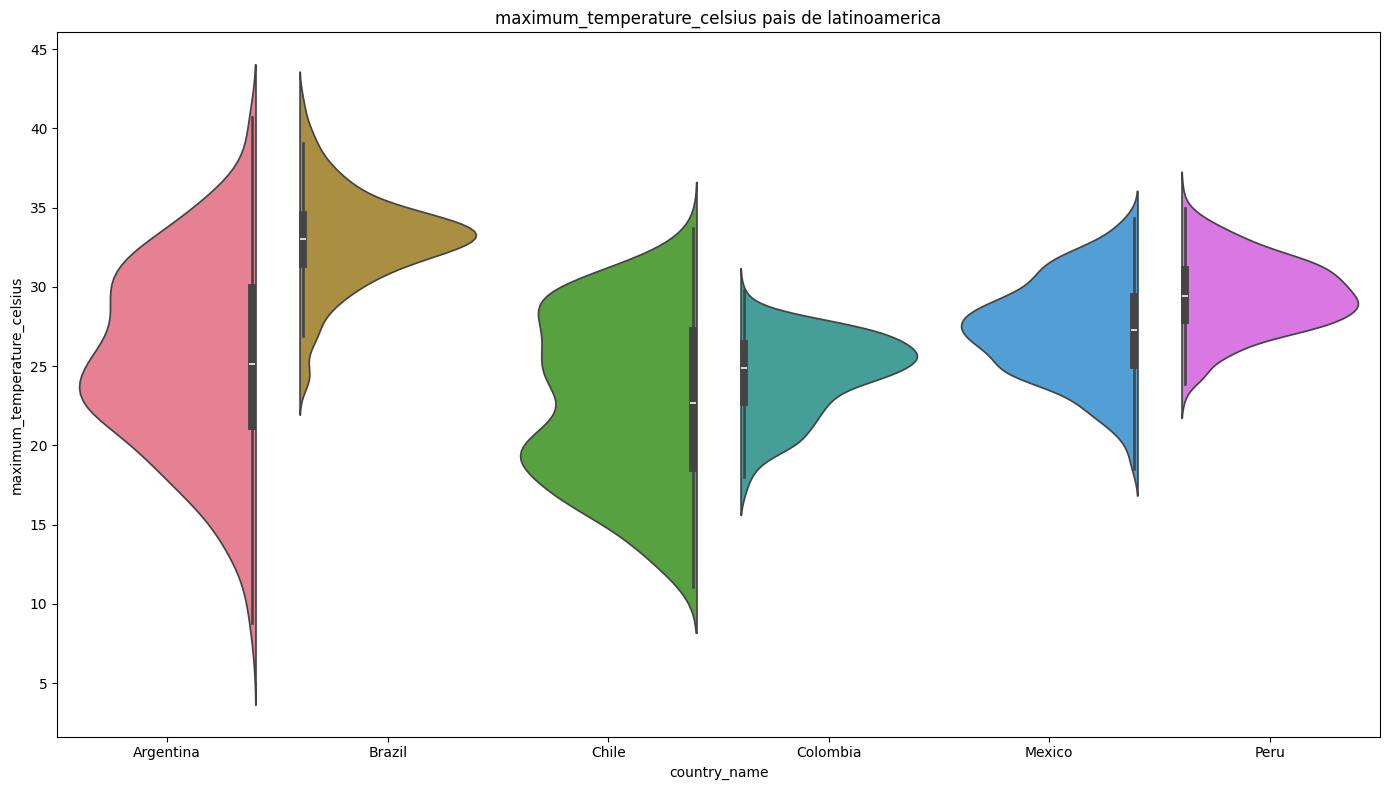

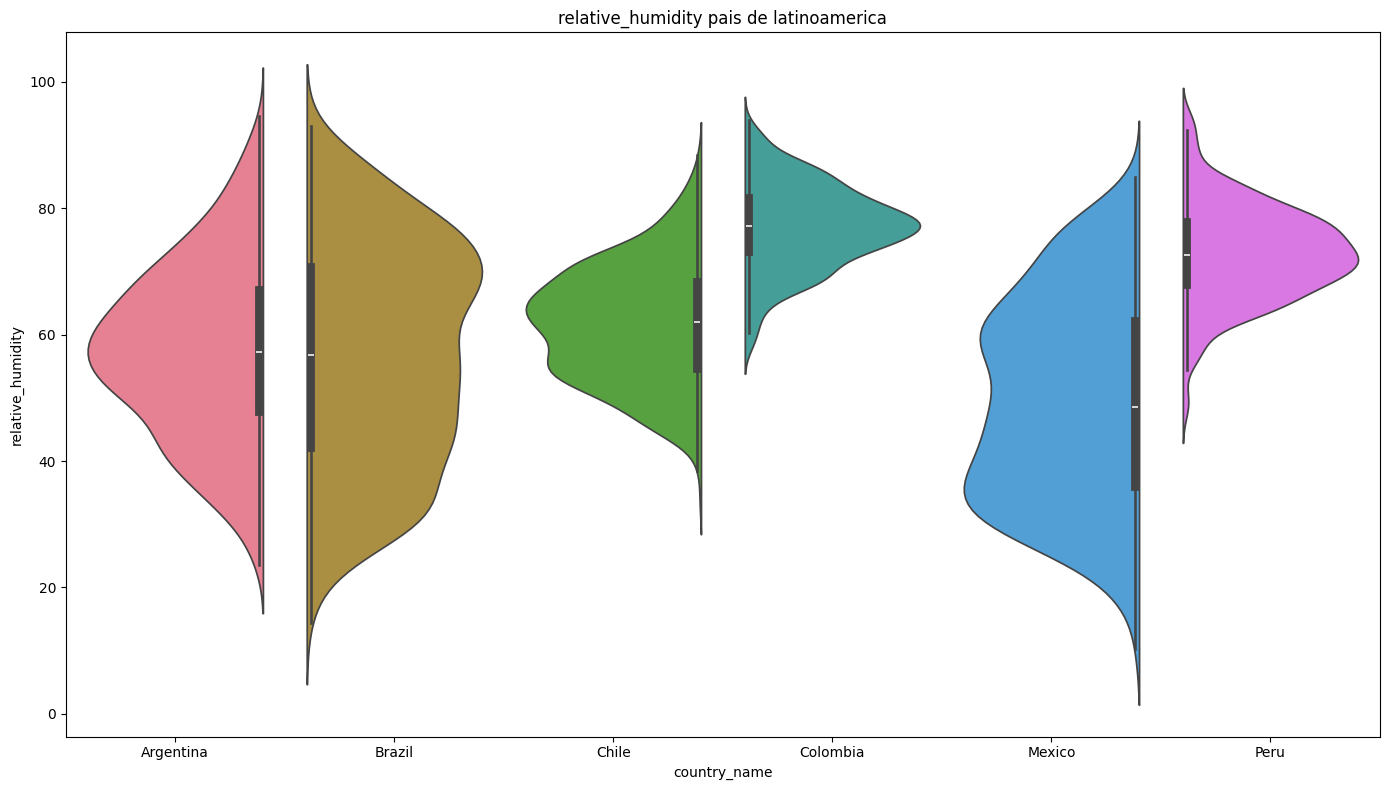

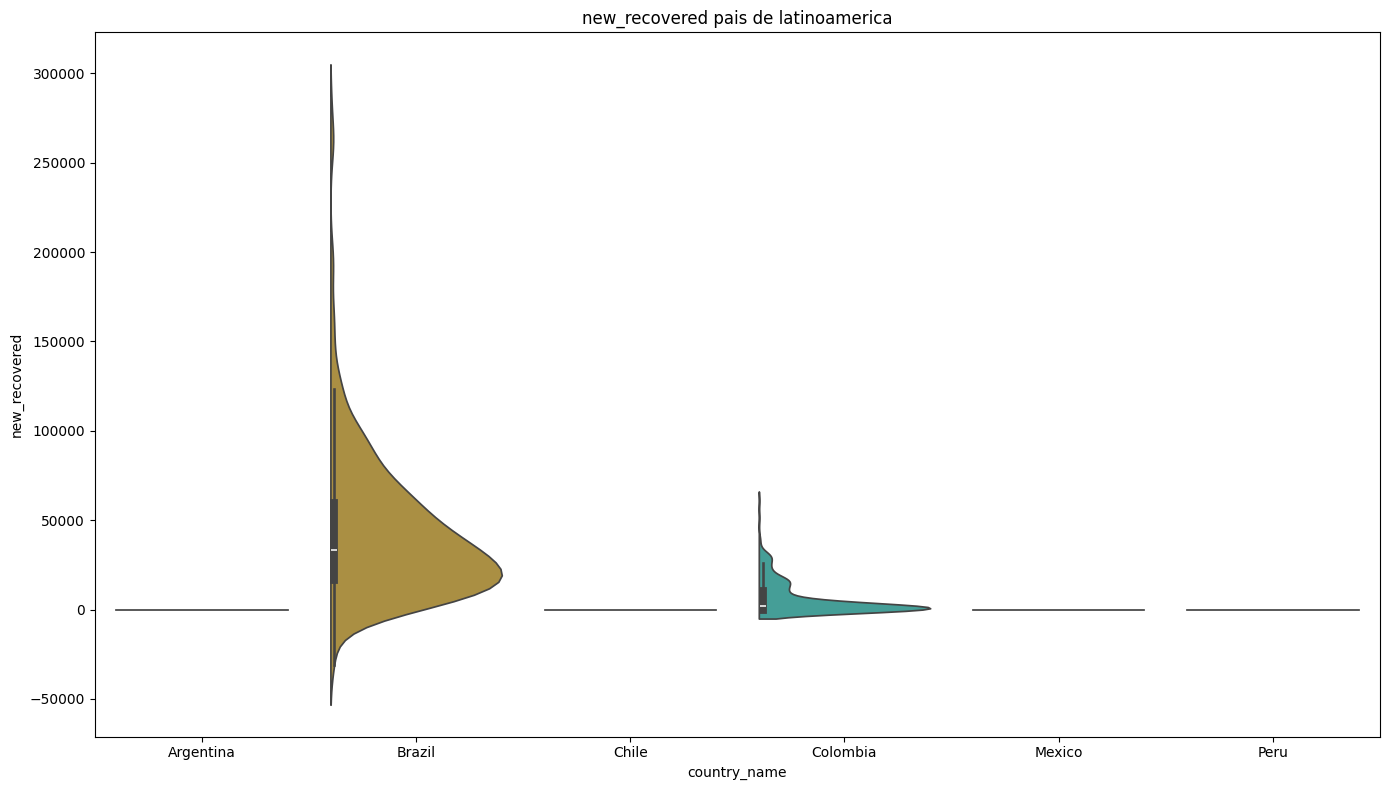

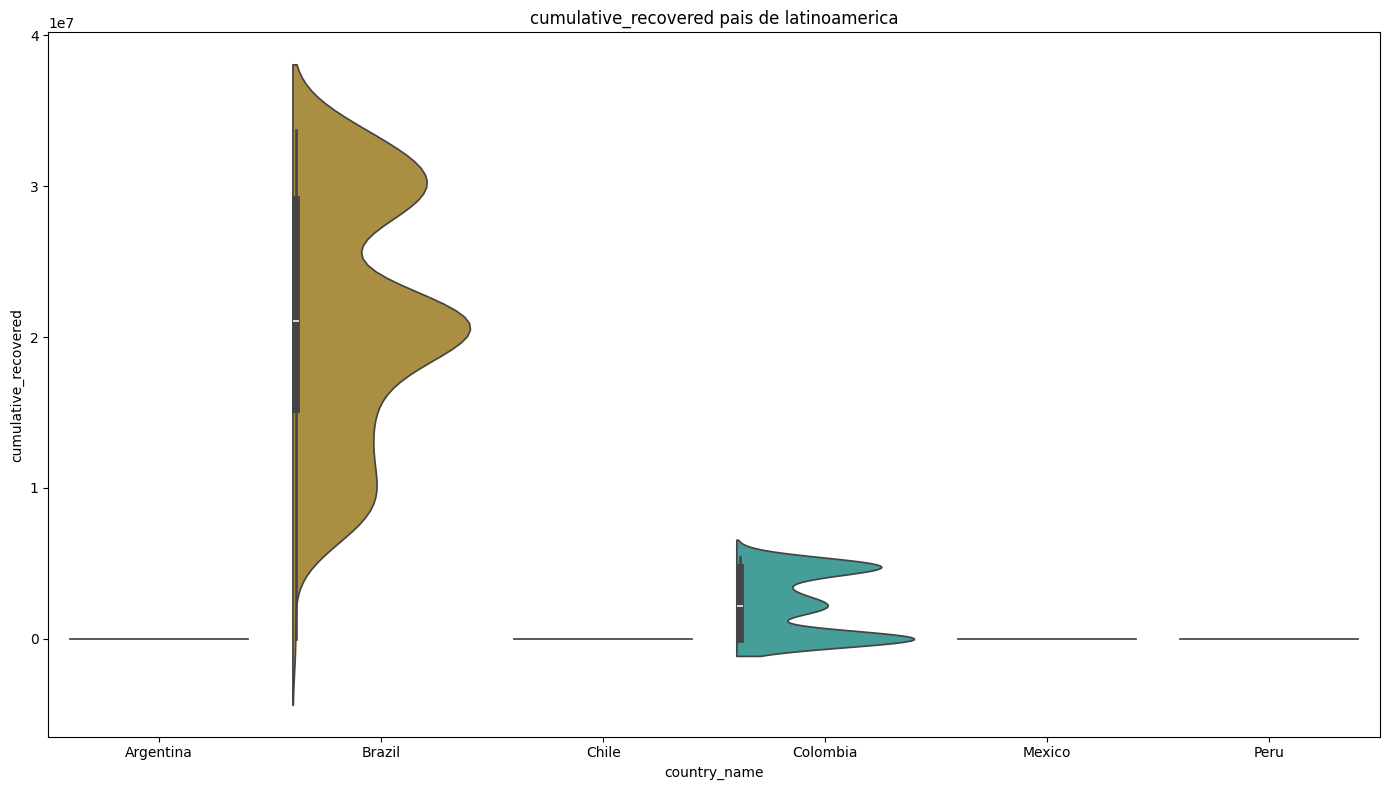

In [19]:
# diagrama de barras de la incidencia de COVID-19 por paises de estudio
numericas = ['new_confirmed','new_deceased','cumulative_confirmed',
             'cumulative_deceased','cumulative_vaccine_doses_administered',
             'average_temperature_celsius','minimum_temperature_celsius',
             'maximum_temperature_celsius','relative_humidity','new_recovered',
             'cumulative_recovered']

for i in df_limpio[numericas]:
    fig,ax= plt.subplots(figsize=(14,8))
    sns.violinplot(data=df_limpio, x='country_name', y=i, ax=ax, hue='country_name', split=True, cut=2, inner='box')
    plt.title(f'{i} pais de latinoamerica')
    plt.tight_layout()
    
    plt.show()

Distribución de la población por grupos de edad. 

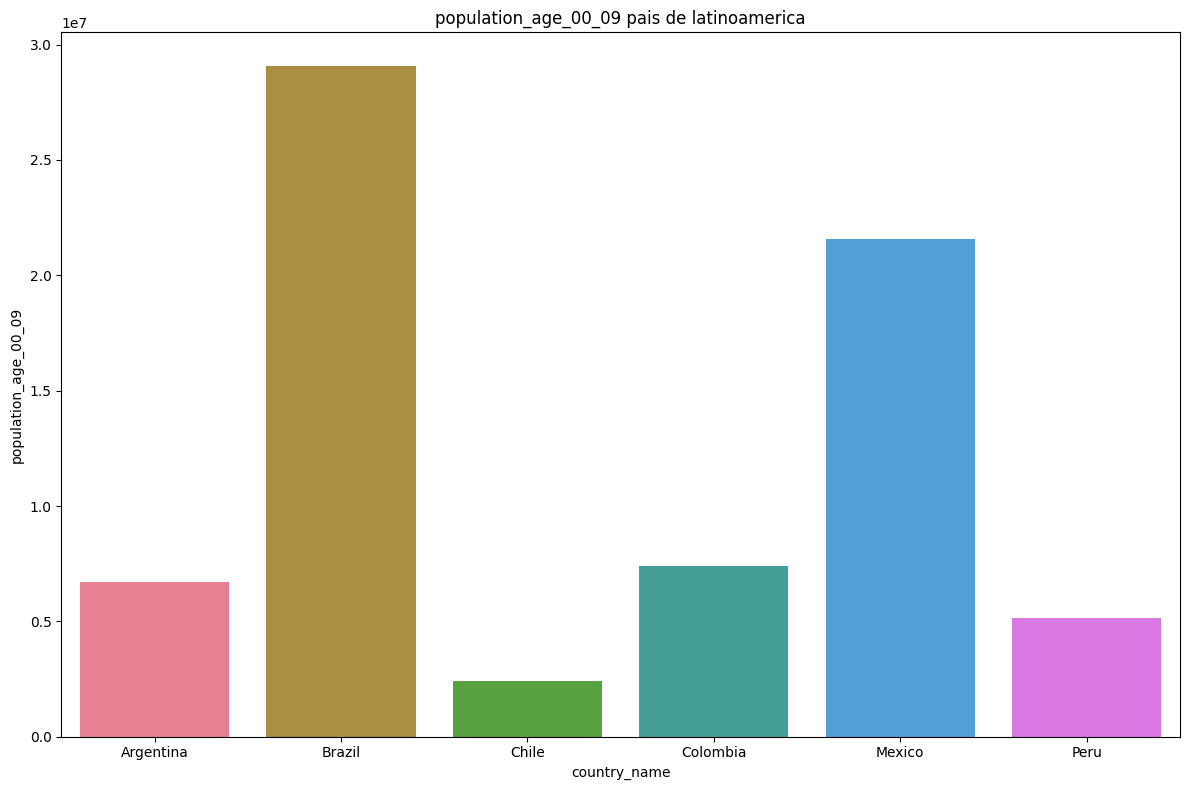

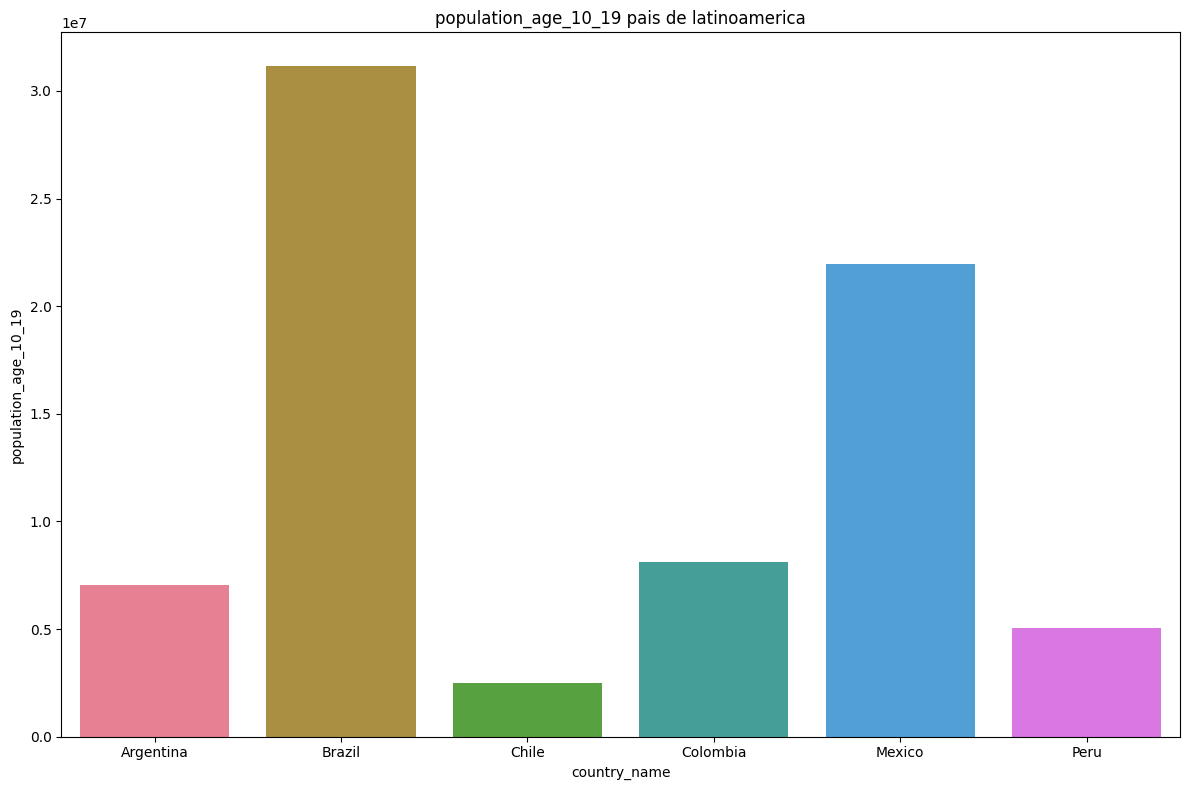

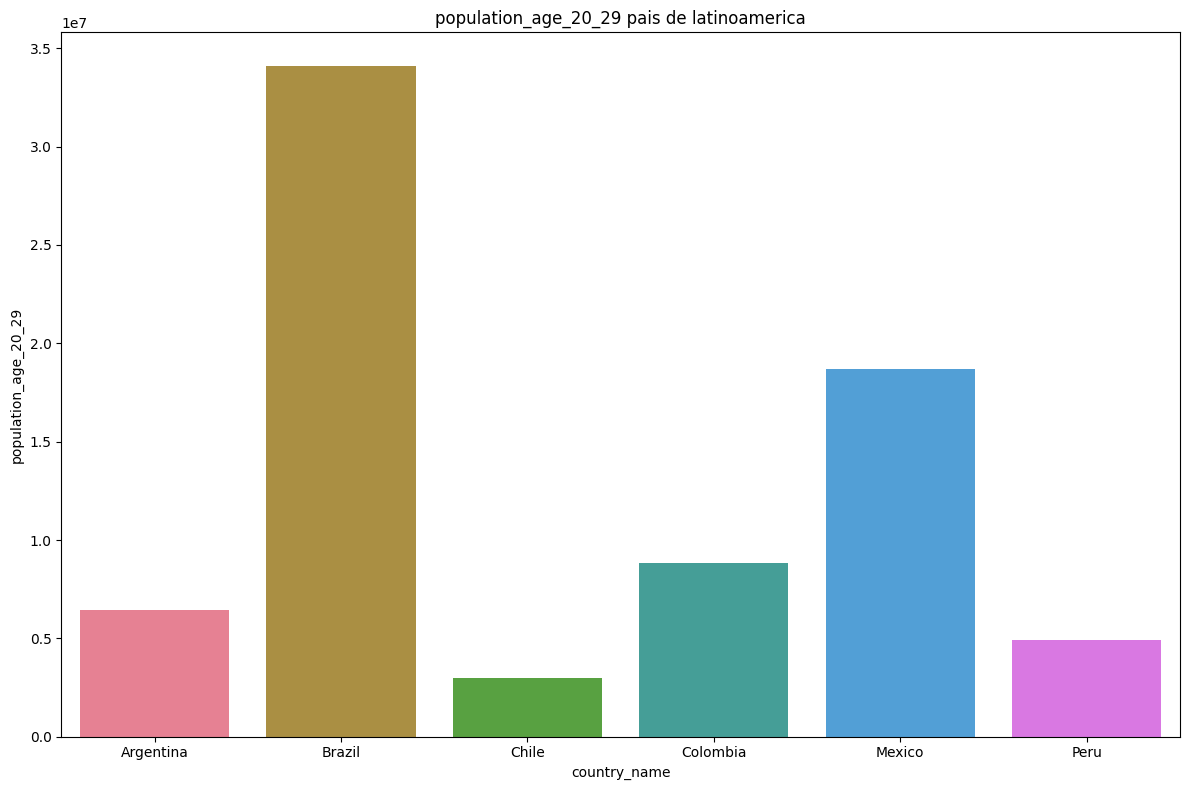

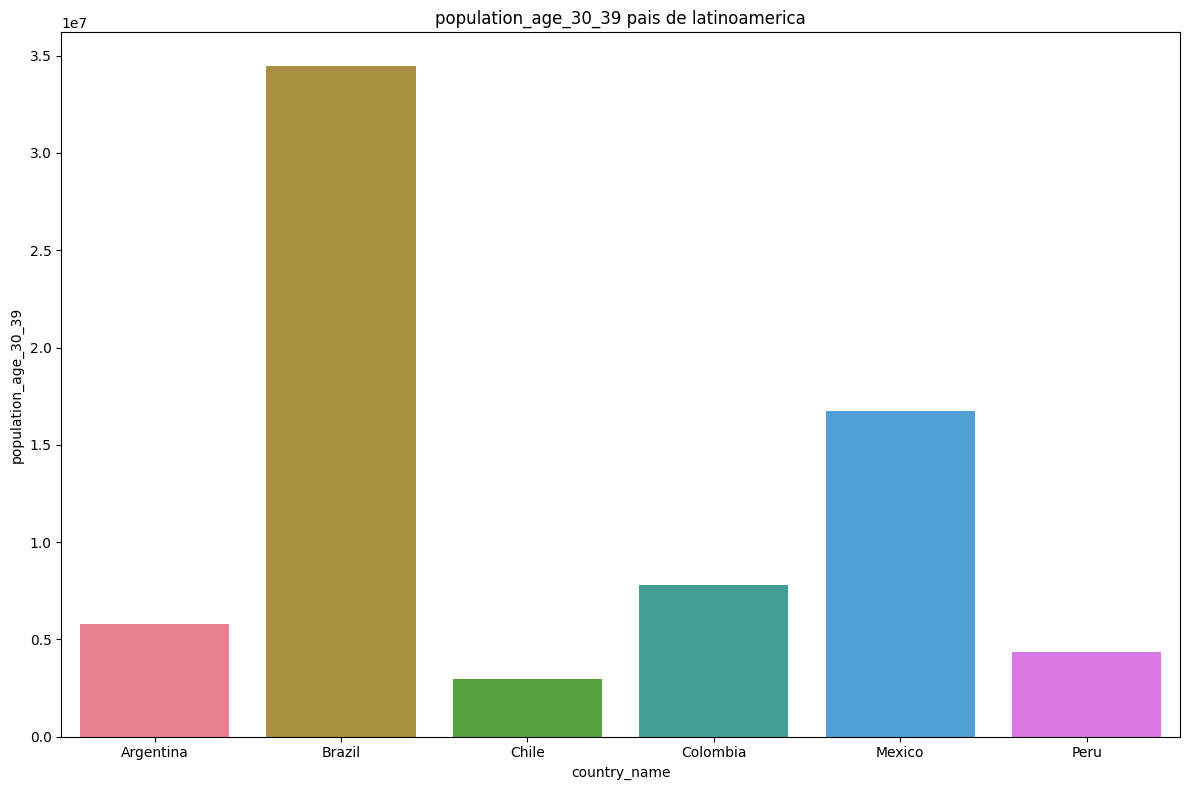

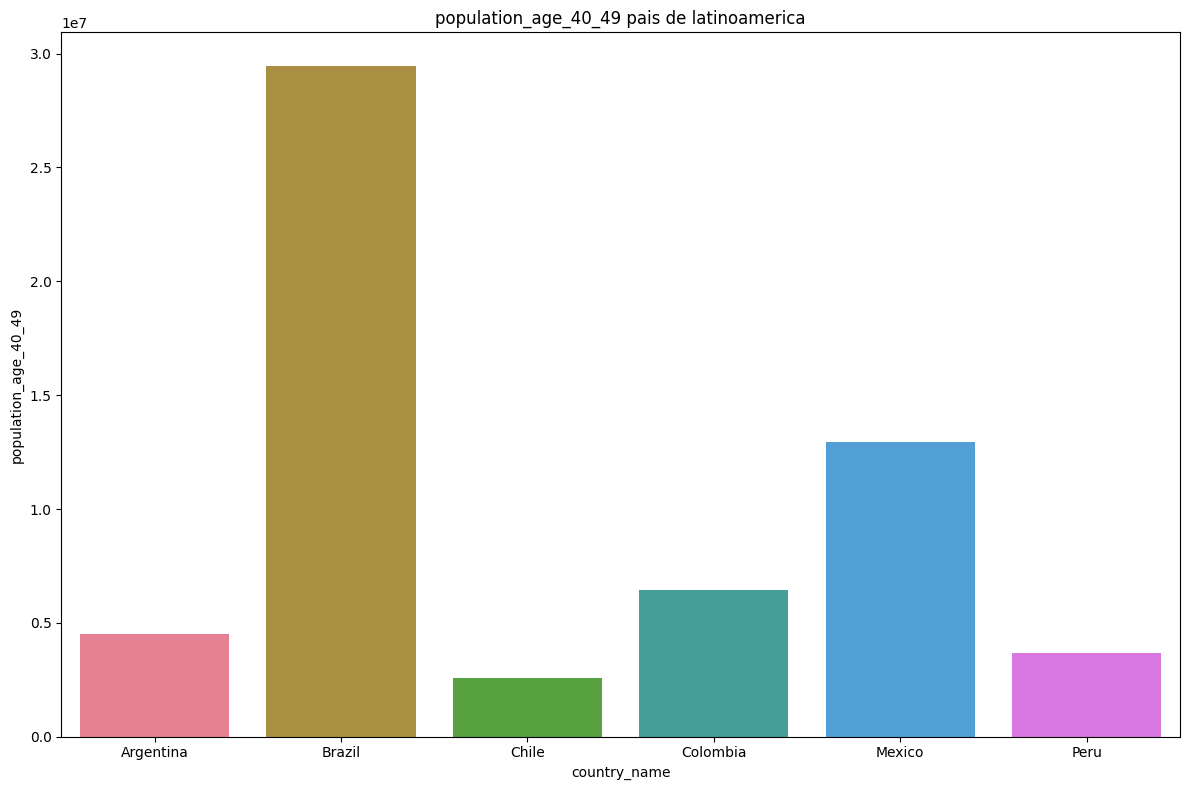

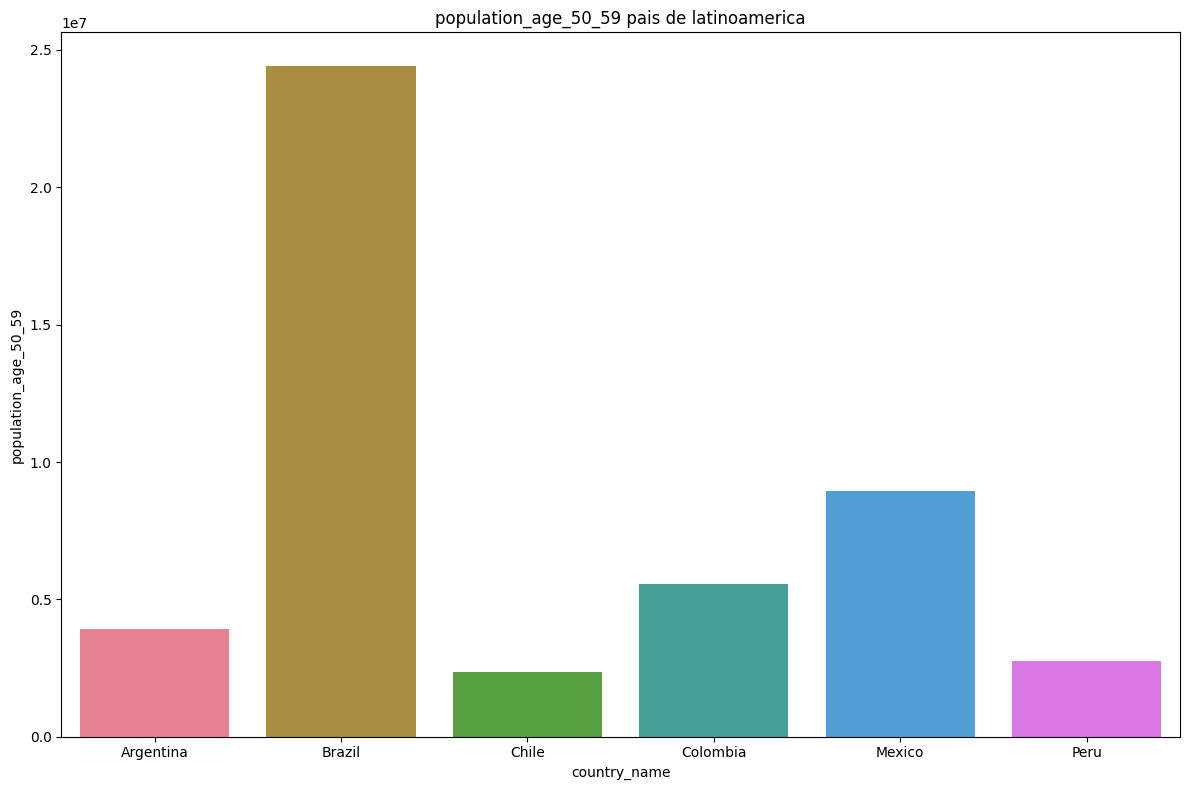

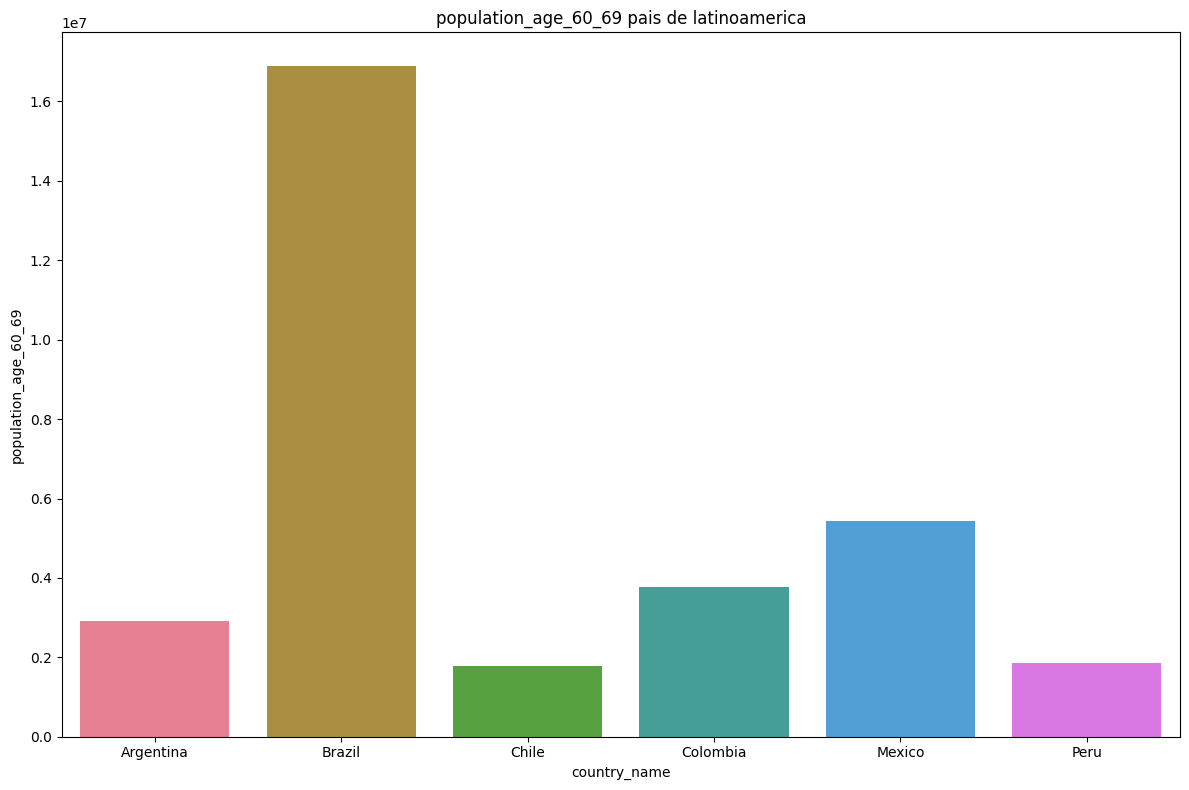

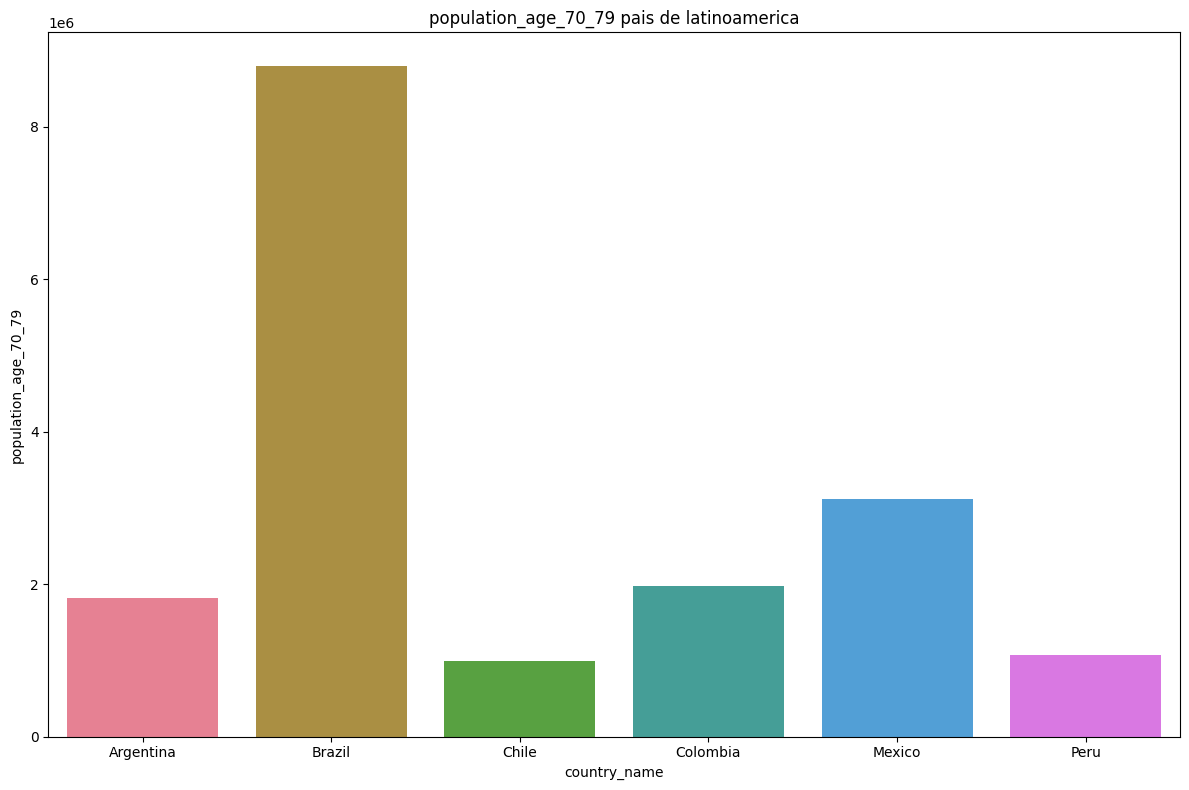

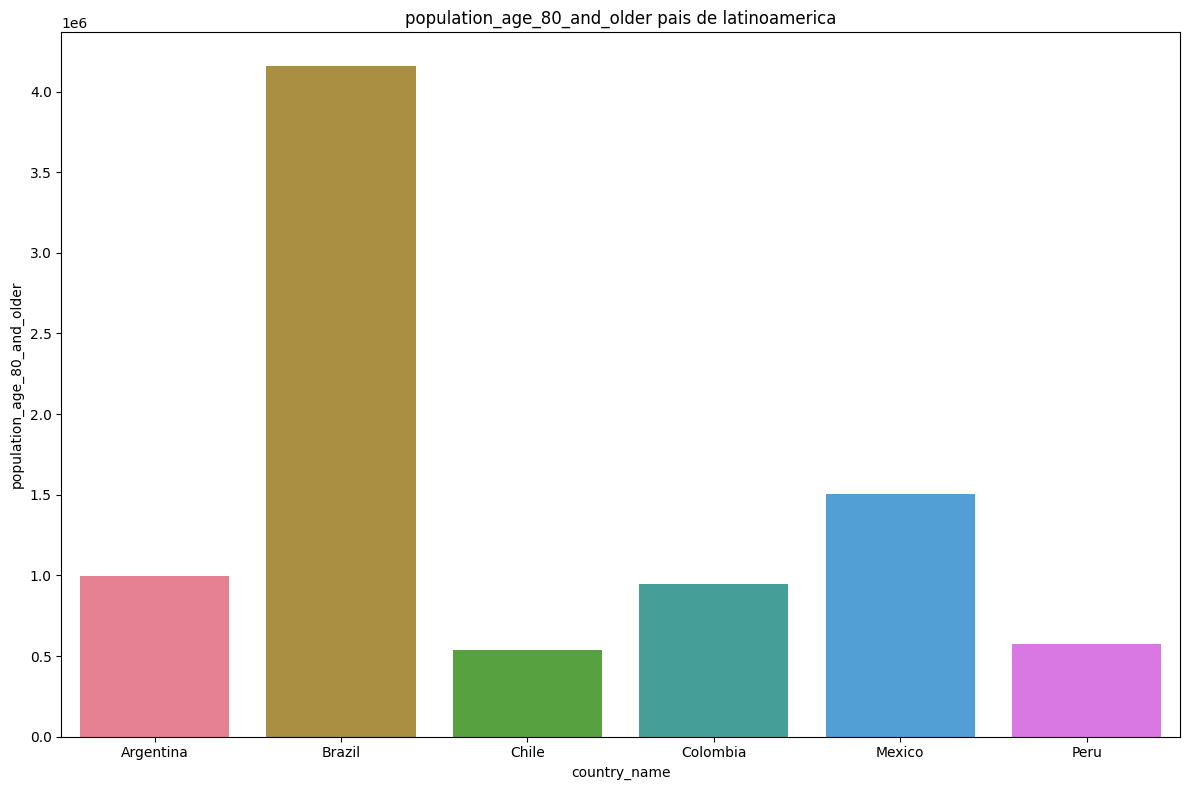

In [20]:
grupos_edad = ['population_age_00_09','population_age_10_19','population_age_20_29',
             'population_age_30_39','population_age_40_49',
             'population_age_50_59','population_age_60_69',
             'population_age_70_79','population_age_80_and_older']

for i in df_limpio[grupos_edad]:
    fig,ax= plt.subplots(figsize=(12,8))
    sns.barplot(data=df_limpio, y=i, x='country_name', ax=ax, hue='country_name')
    plt.title(f'{i} pais de latinoamerica')
    plt.tight_layout()
    
    plt.show()

Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina vs infantil por país.

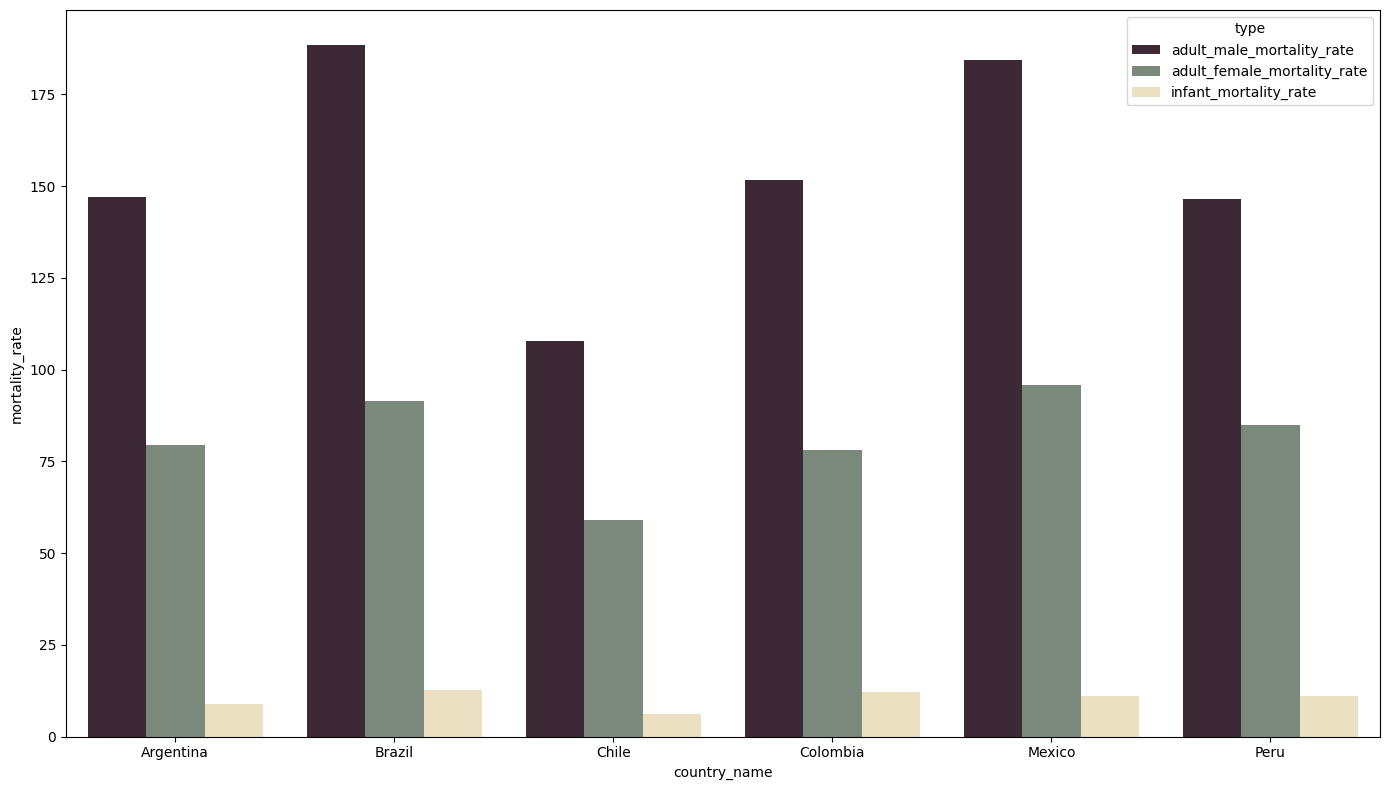

In [21]:
# Pivotar el DataFrame para crear una columna 'type' que indique el tipo de tasa de mortalidad
df_melted = df_limpio.melt(id_vars='country_name', value_vars=['adult_male_mortality_rate', 'adult_female_mortality_rate','infant_mortality_rate'], 
                           var_name='type', value_name='mortality_rate')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(14, 8))

# Crear el barplot
sns.barplot(data=df_melted, x='country_name', y='mortality_rate', hue='type', ax=ax)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [22]:
# Pivotar el DataFrame para crear una columna 'type' que indique el tipo de tasa de mortalidad
df_melted = df_limpio.melt(id_vars='country_name', value_vars=['adult_male_mortality_rate', 'adult_female_mortality_rate','infant_mortality_rate'], 
                           var_name='type', value_name='mortality_rate')

print(df_melted)

      country_name                       type  mortality_rate
0        Argentina  adult_male_mortality_rate         147.086
1        Argentina  adult_male_mortality_rate         147.086
2        Argentina  adult_male_mortality_rate         147.086
3        Argentina  adult_male_mortality_rate         147.086
4        Argentina  adult_male_mortality_rate         147.086
...            ...                        ...             ...
11227         Peru      infant_mortality_rate          11.100
11228         Peru      infant_mortality_rate          11.100
11229         Peru      infant_mortality_rate          11.100
11230         Peru      infant_mortality_rate          11.100
11231         Peru      infant_mortality_rate          11.100

[11232 rows x 3 columns]


Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad

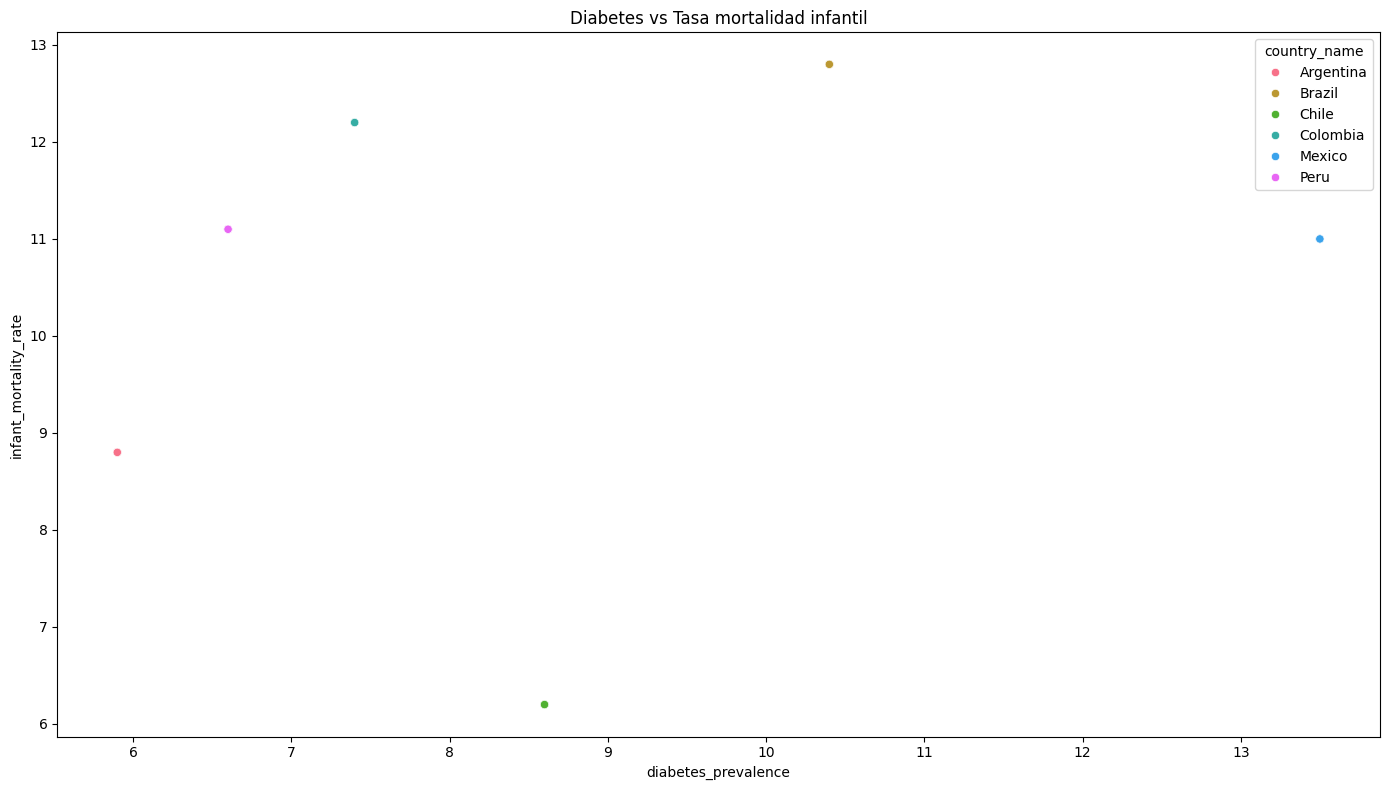

In [23]:
#graficos de correlacion prevalencia de diabetes y tasa de mortalidad por pais
figure,ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df_limpio, x='diabetes_prevalence', y='infant_mortality_rate', hue='country_name')
plt.title('Diabetes vs Tasa mortalidad infantil')
plt.tight_layout()
plt.show()

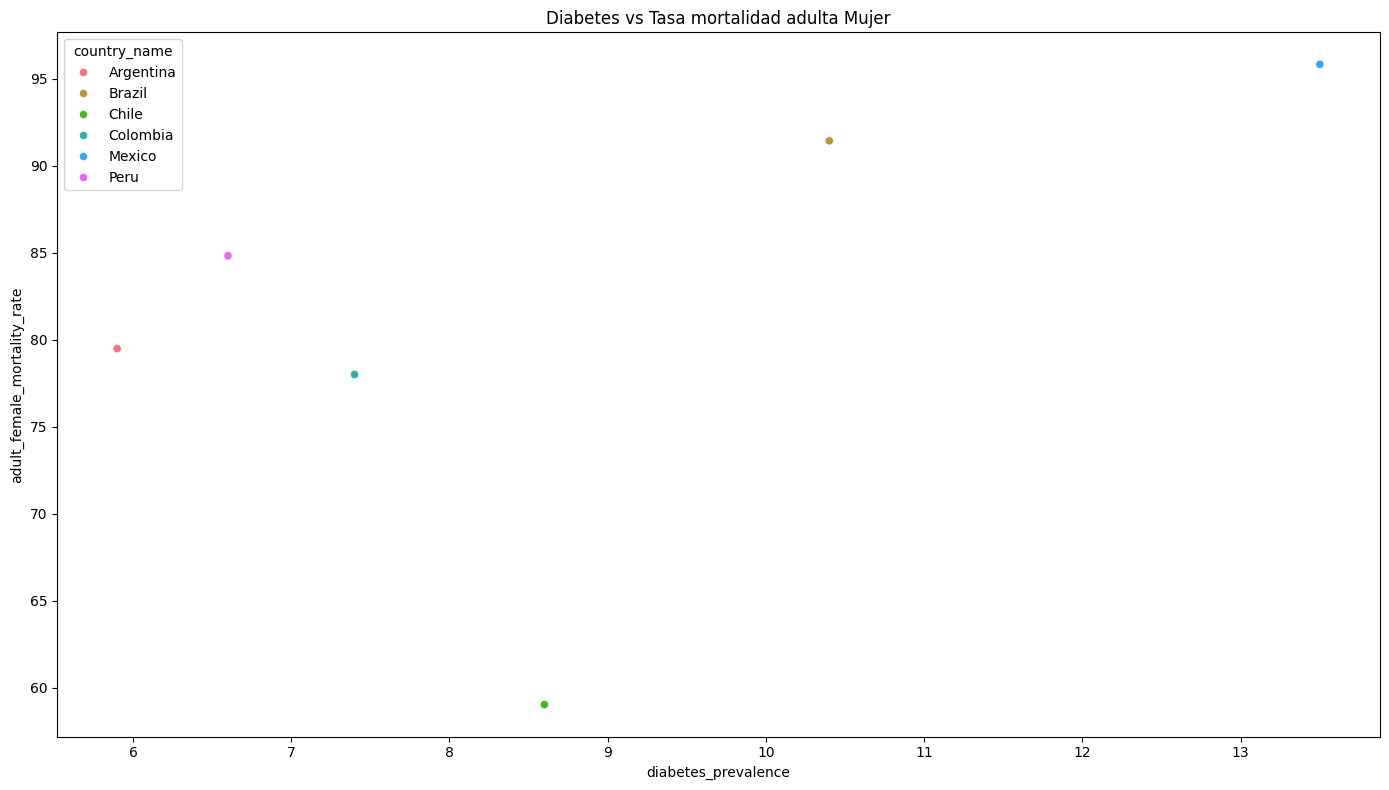

In [24]:
#graficos de correlacion prevalencia de diabetes y tasa de mortalidad por pais
figure,ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df_limpio, x='diabetes_prevalence', y='adult_female_mortality_rate', hue='country_name')
plt.title('Diabetes vs Tasa mortalidad adulta Mujer')
plt.tight_layout()
plt.show()

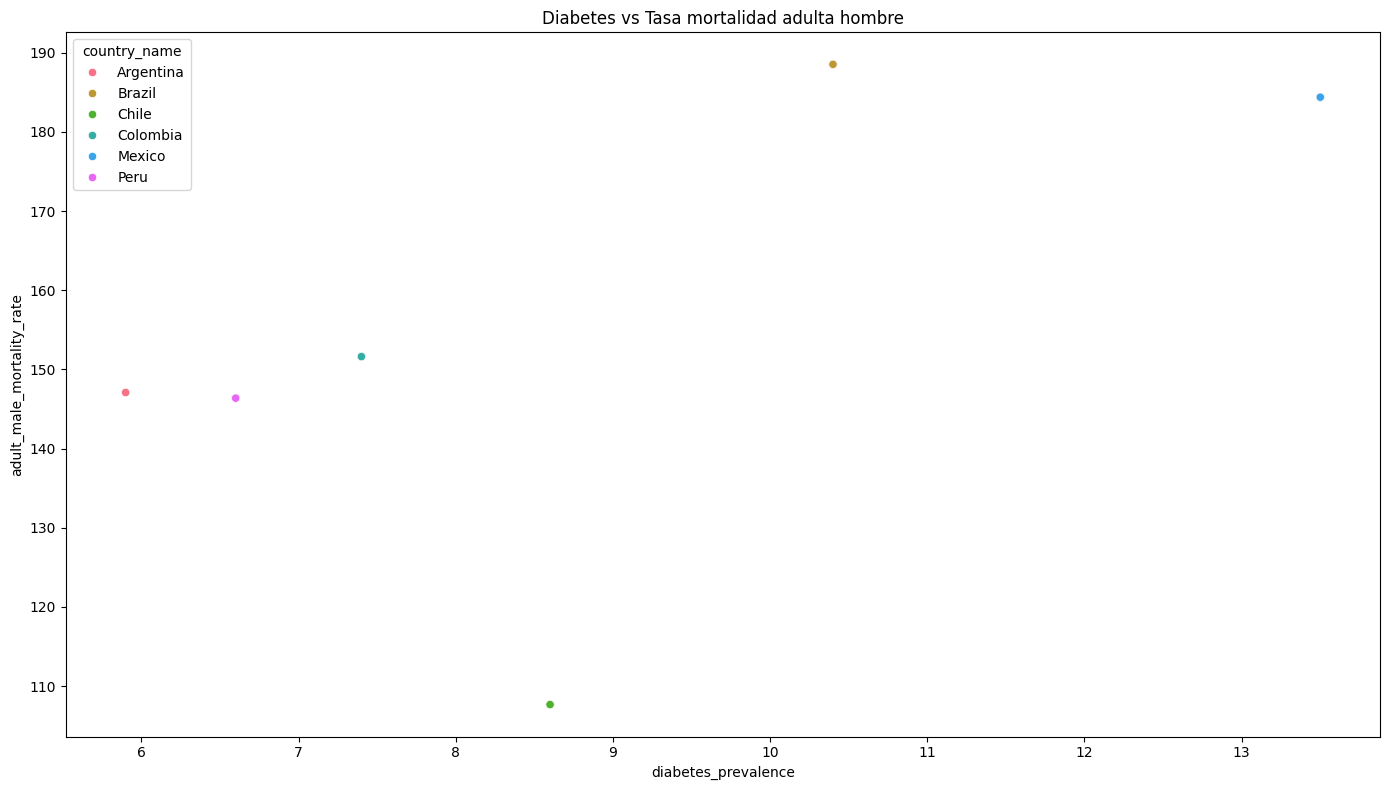

In [25]:
#graficos de correlacion prevalencia de diabetes y tasa de mortalidad por pais
figure,ax = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df_limpio, x='diabetes_prevalence', y='adult_male_mortality_rate', hue='country_name')
plt.title('Diabetes vs Tasa mortalidad adulta hombre')
plt.tight_layout()
plt.show()



# PROYECTO INTEGRADOR AVANCE 3.
## CONSIGNAS
### 1. Abre tu archivo “PIDA_M4_Nombre_Apellido.ipynb” y a continuación del avance 1 coloca el título: “Avance 2”.

### 2. Importa las librerías que necesites utilizar en este avance.

In [26]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

In [27]:
#cargamos el data set
df_limpio = pd.read_csv(r'C:\Users\Usuario\Desktop\JAIME\PROYECTO CANADA\HENRY DATA ANALYST\DAP-01\M4\PROYECTO INTEGRADOR\DatosFinalesFiltrado.csv')

In [28]:
df_limpio.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [29]:
print(df_limpio.isna)

<bound method DataFrame.isna of      location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru    7407.414516   
3741           PE  2022-09-15           PE         Peru    7407.414516   
3742           PE  2022-09-16           PE         Peru    7407.414516   
3743           PE  2022-09-17           PE         Peru    7407.414516   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.00

In [30]:
df_limpio.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13899.659376    276.647712          6.773059e+06        192751.477459   
std     24210.340842    507.067671          7.978578e+06        182580.285182   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59390.500000   
50%      5227.000000    101.000000          3.648782e+06        139496.500000   
75%     14812.750000    311.000000          6.202104e+06        214877.250000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9.247680e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.618297e+06  2.938188e+07     1.445076e+07   
50%                             3.244576e+07  4.791080e+07     2.225416e+07   
75%                             7.478108e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
std                      1.665972   23

In [31]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [32]:
df_limpio.columns

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [33]:
pd.set_option('display.float_format', '{:.2f}'.format)

### 3. Realizar un análisis exploratorio detallado utilizando técnicas avanzadas de Pandas y Numpy

Análisis de series temporales

- Identificación de tendencias y estacionalidad 
- Análisis de autocorrelación

In [34]:
# Convertir la columna de fecha a datetime 
df_limpio['date'] = pd.to_datetime(df_limpio['date'])

#creamos una nueva columna para nuestro data frame con un nuevo formato de fechas para nuestro analisis exploratorio y las series temporales
df_limpio['Formatted_date'] = df_limpio['date'].dt.strftime('%Y-%m-%d')
df_limpio['Formatted_date'] = pd.to_datetime(df_limpio['Formatted_date'])

# imprimos el data frame para ver los tipos de datos
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   float64       
 5   new_deceased                           3744 non-null   float64       
 6   cumulative_confirmed                   3744 non-null   float64       
 7   cumulative_deceased                    3744 non-null   float64       
 8   cumulative_vaccine_doses_administered  3744 non-null   float64       
 9   population                             3744 non-null   float64 

In [35]:
# Convertimos nuestra columna fecha en indices
df_limpio.set_index('date', inplace=True)


In [36]:
# Agregamos la columna week, para obtener el dato del numero de la semana
df_limpio['Week'] = df_limpio.index.isocalendar().week



In [37]:
# Agregamos la columna Month, para obtener el dato del numero del mes
df_limpio['Month'] = df_limpio['Formatted_date'].dt.month
df_limpio['Day'] = df_limpio['Formatted_date'].dt.day
df_limpio

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru        7407.41   
2022-09-15           PE           PE         Peru        7407.41   
2022-09-16           PE           PE         Peru        7407.41   
2022-09-17           PE           PE         Peru        7407.41   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        185.10            4765656.10            124442.12   
2022-09-15        185.10            4765656.10            124442.12   
2022-09-16        185.10            4765656.10            124442.12   
2022-09-17        185.10            4765656.10            124442.12   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                                   0.00 29381884.00   
2022-09-14                                   0.00 29381884.00   
2022-09-15                                   0.00 29381884.00   
2022-09-16                                   0.00 29381884.00   
2022-09-17                                   0.00 29381884.00   

            population_male  ...  adult_male_mortality_rate  \
date                         ...                              
2021-01-02      19523766.00  ...                     147.09   
2021-01-03      19523766.00  ...                     147.09   
2021-01-04      19523766.00  ...                     147.09   
2021-01-05      19523766.00  ...                     147.09   
2021-01-06      19523766.00  ...                     147.09   
...                     ...  ...                        ...   
2022-09-13      14450757.00  ...                     146.37   
2022-09-14      14450757.00  ...                     146.37   
2022-09-15      14450757.00  ...                     146.37   
2022-09-16      14450757.00  ...                     146.37   
2022-09-17      14450757.00  ...                     146.37   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                        79.48                     26.60   
2021-01-03                        79.48                     26.60   
2021-01-04                        79.48                     26.60   
2021-01-05                        79.48                     26.60   
2021-01-06                        79.48                     26.60   
...                                 ...              

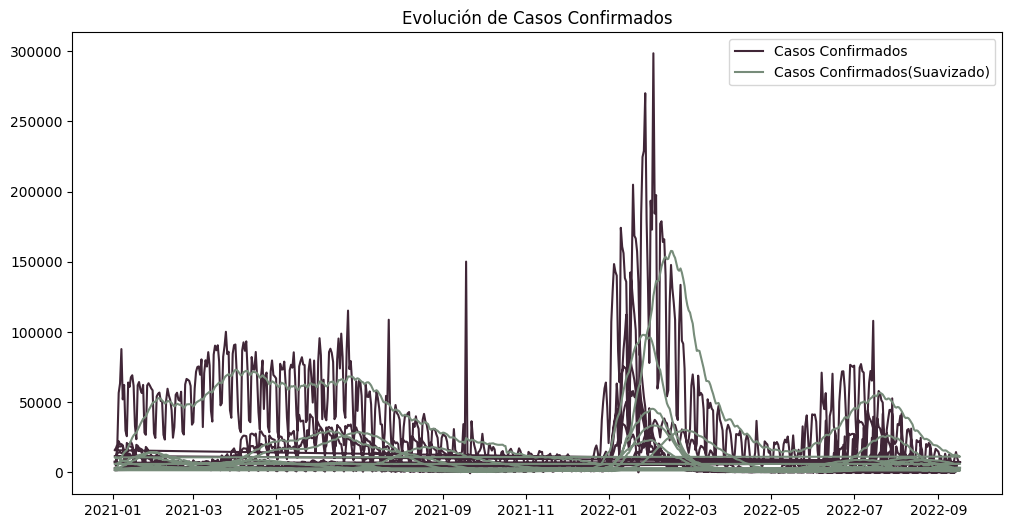

In [38]:
# Suavizamos nuestras columnas numericas para preveer tendencias
df_limpio['new_confirmed_rolling'] = df_limpio['new_confirmed'].rolling(window=30).mean()

# Graficar la serie temporal original y suavizada
plt.figure(figsize=(12, 6))
plt.plot(df_limpio['new_confirmed'], label='Casos Confirmados')
plt.plot(df_limpio['new_confirmed_rolling'], label='Casos Confirmados(Suavizado)')
plt.legend()
plt.title('Evolución de Casos Confirmados')
plt.show()

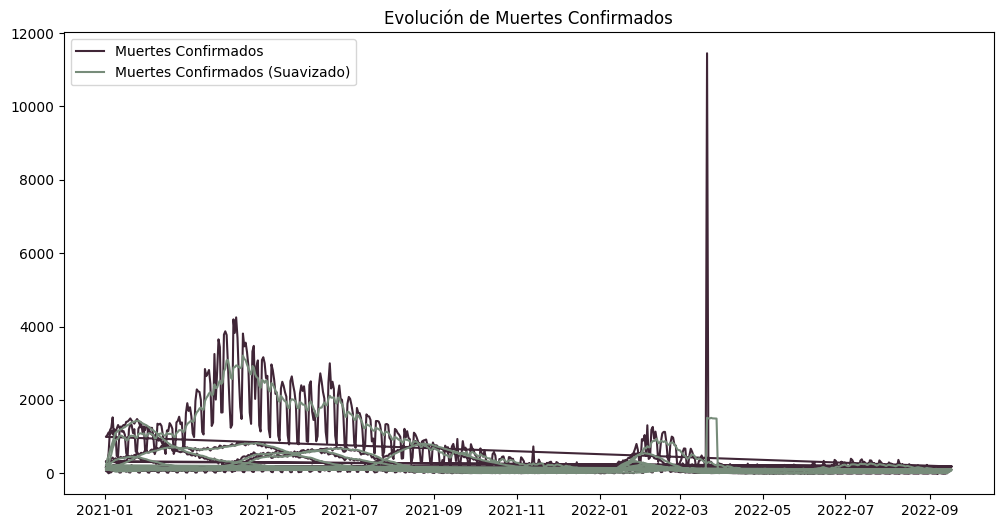

In [39]:
# Suavizamos nuestras columnas numericas para preveer tendencias
df_limpio['new_deceased_rolling'] = df_limpio['new_deceased'].rolling(window=8).mean()

# Graficar la serie temporal original y suavizada
plt.figure(figsize=(12, 6))
plt.plot(df_limpio['new_deceased'], label='Muertes Confirmados')
plt.plot(df_limpio['new_deceased_rolling'], label='Muertes Confirmados (Suavizado)')
plt.legend()
plt.title('Evolución de Muertes Confirmados')
plt.show()

In [40]:
#hallamos para el 2021 el total de nuevos casos y muertes por pais, con temporalidad de mes y semana para analisis temporal
monthly_cases = df_limpio.groupby(['country_name','Month'])[['new_confirmed','new_deceased']].sum().reset_index()
monthly_cases

country_name  Month  new_confirmed  new_deceased
0     Argentina      1     3200480.00      11779.00
1     Argentina      2      492186.00       7563.00
2     Argentina      3      328820.00       4507.00
3     Argentina      4      686415.00       9852.00
4     Argentina      5      971958.00      16067.00
..          ...    ...            ...           ...
67         Peru      8      227610.00       3172.00
68         Peru      9       79528.66       2184.39
69         Peru     10       24873.00        930.00
70         Peru     11       37020.00        987.00
71         Peru     12       60450.00       1176.00

[72 rows x 4 columns]

In [41]:
weekly_cases = df_limpio.groupby(['country_name','Week'])[['new_confirmed','new_deceased']].sum().reset_index()
weekly_cases

country_name  Week  new_confirmed  new_deceased
0      Argentina     1      904036.00       1596.00
1      Argentina     2      980296.00       2744.00
2      Argentina     3      770086.00       3418.00
3      Argentina     4      428068.00       3382.00
4      Argentina     5      226404.00       2783.00
..           ...   ...            ...           ...
313         Peru    49       10004.00        272.00
314         Peru    50       10637.00        265.00
315         Peru    51       11306.00        257.00
316         Peru    52       26724.00        279.00
317         Peru    53        3355.00        374.00

[318 rows x 4 columns]

In [42]:
day_cases = df_limpio.groupby(['country_name','Day'])[['new_confirmed','new_deceased']].sum().reset_index()
day_cases

country_name  Day  new_confirmed  new_deceased
0      Argentina    1      203223.00       2595.00
1      Argentina    2      214368.00       2921.00
2      Argentina    3      271974.00       2832.00
3      Argentina    4      284170.00       2646.00
4      Argentina    5      344508.00       2784.00
..           ...  ...            ...           ...
181         Peru   27       99933.00       4013.00
182         Peru   28       88651.00       4040.00
183         Peru   29       73954.00       3221.00
184         Peru   30       58250.00       3235.00
185         Peru   31       61368.00       2300.00

[186 rows x 4 columns]

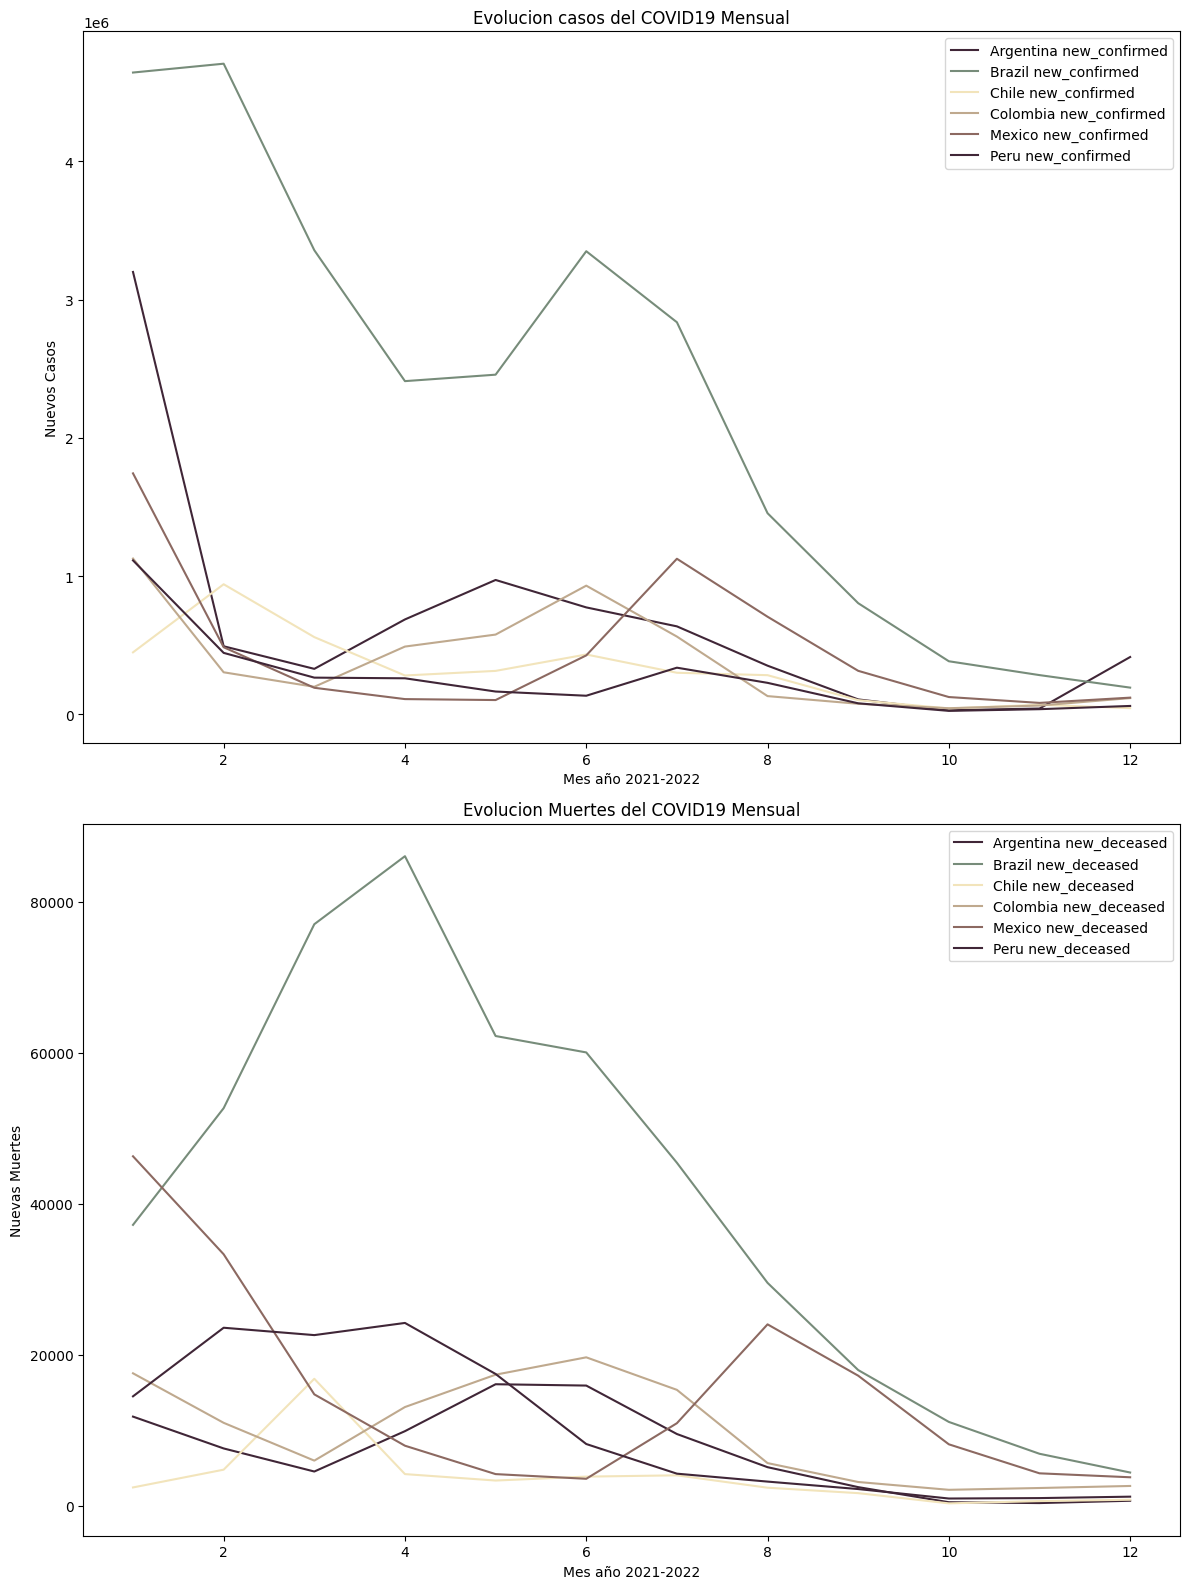

In [43]:
# analizamos la evolucion en nuevos casos y nuevas muertes del COVID19 Mensualmente
monthly_cases = df_limpio.groupby(['country_name','Month'])[['new_confirmed','new_deceased']].sum().reset_index()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,16))
for country in monthly_cases['country_name'].unique():
    country_monthly_cases = monthly_cases[monthly_cases['country_name'] == country]
    ax[0].plot(country_monthly_cases['Month'], country_monthly_cases['new_confirmed'], label=f'{country} new_confirmed')
    ax[1].plot(country_monthly_cases['Month'], country_monthly_cases['new_deceased'], label=f'{country} new_deceased')


ax[0].set_title('Evolucion casos del COVID19 Mensual')
ax[0].set_xlabel('Mes año 2021-2022')
ax[0].set_ylabel('Nuevos Casos')
ax[0].legend(loc='upper right')

ax[1].set_title('Evolucion Muertes del COVID19 Mensual')
ax[1].set_xlabel('Mes año 2021-2022')
ax[1].set_ylabel('Nuevas Muertes')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

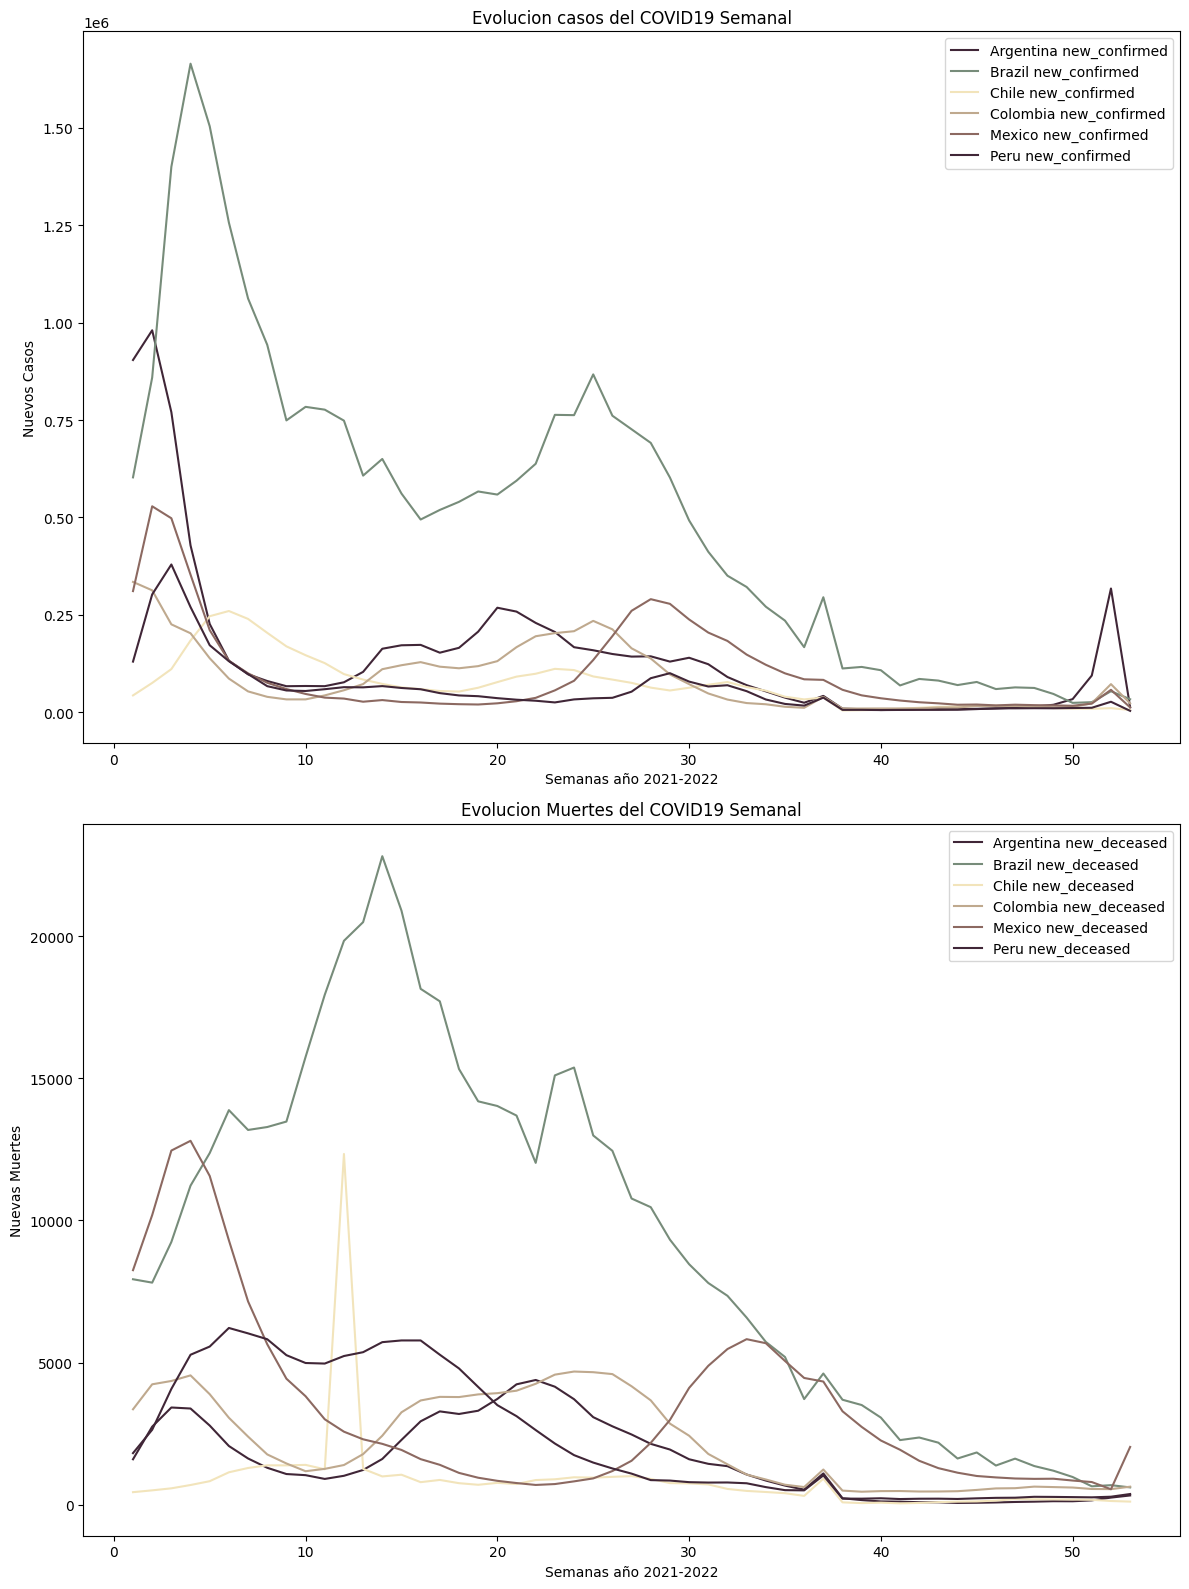

In [44]:
# analizamos la evolucion en nuevos casos y nuevas muertes del COVID19 Semanalmente
weekly_cases = df_limpio.groupby(['country_name','Week'])[['new_confirmed','new_deceased']].sum().reset_index()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,16))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['Week'], country_weekly_cases['new_confirmed'], label=f'{country} new_confirmed')
    ax[1].plot(country_weekly_cases['Week'], country_weekly_cases['new_deceased'], label=f'{country} new_deceased')


ax[0].set_title('Evolucion casos del COVID19 Semanal')
ax[0].set_xlabel('Semanas año 2021-2022')
ax[0].set_ylabel('Nuevos Casos')
ax[0].legend(loc='upper right')

ax[1].set_title('Evolucion Muertes del COVID19 Semanal')
ax[1].set_xlabel('Semanas año 2021-2022')
ax[1].set_ylabel('Nuevas Muertes')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

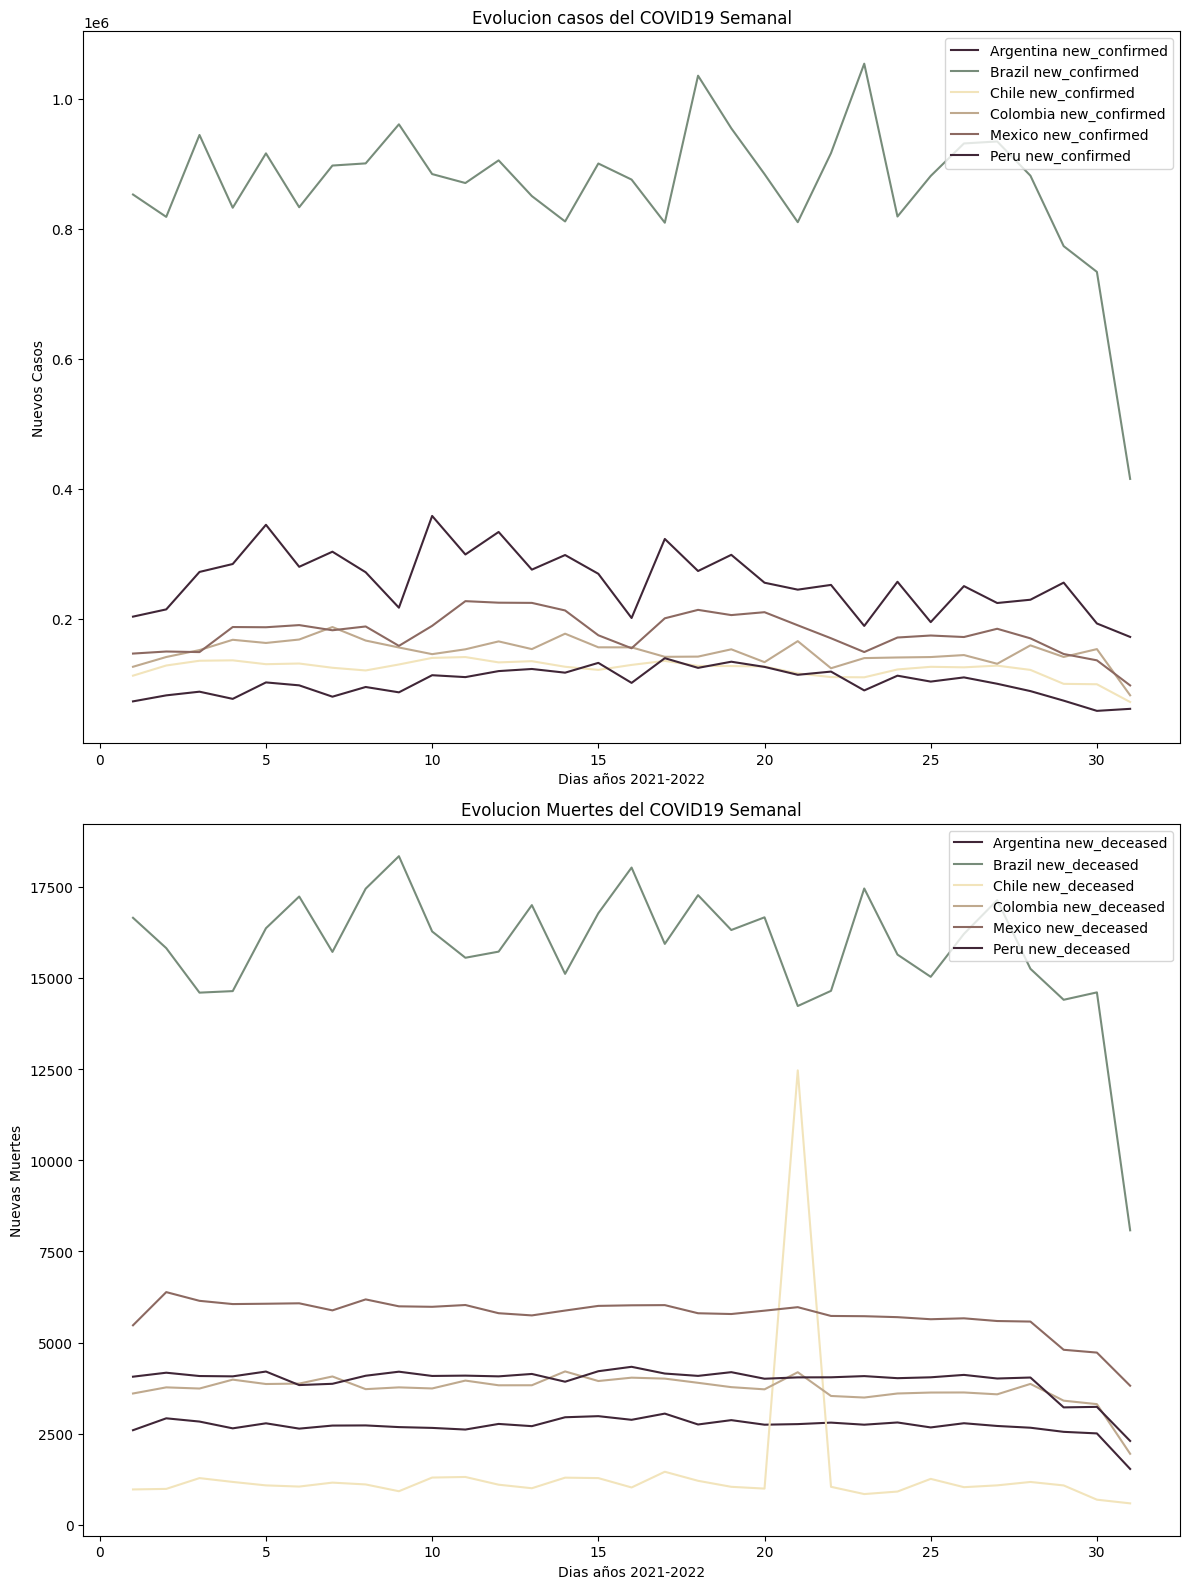

In [45]:
# analizamos la evolucion en nuevos casos y nuevas muertes del COVID19 Diariamente
day_cases = df_limpio.groupby(['country_name','Day'])[['new_confirmed','new_deceased']].sum().reset_index()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12,16))
for country in day_cases['country_name'].unique():
    country_day_cases = day_cases[day_cases['country_name'] == country]
    ax[0].plot(country_day_cases['Day'], country_day_cases['new_confirmed'], label=f'{country} new_confirmed')
    ax[1].plot(country_day_cases['Day'], country_day_cases['new_deceased'], label=f'{country} new_deceased')


ax[0].set_title('Evolucion casos del COVID19 Semanal')
ax[0].set_xlabel('Dias años 2021-2022')
ax[0].set_ylabel('Nuevos Casos')
ax[0].legend(loc='upper right')

ax[1].set_title('Evolucion Muertes del COVID19 Semanal')
ax[1].set_xlabel('Dias años 2021-2022')
ax[1].set_ylabel('Nuevas Muertes')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

De las anteriores gráficas se puede observar que la cantidad de casos confirmados y muertes ha ido disminuyendo a lo largo del tiempo, sin embargo esto no quiere decir que la pandemia haya terminado, ya que la cantidad de casos confirmados y muertes sigue siendo alta, ademas se nota un pico en la fechas finales.

In [46]:
#Recordamos las columnas de nuestro Data Frame de estudio
df_limpio
df_limpio.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [47]:
# Configuramos todos nuestros dataframes para que los numeros flotantes tengan 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format)

Impacto de la Urbanización en la Propagación del Covid-19

In [48]:
df_limpio[['population','population_urban','cumulative_confirmed', 'cumulative_deceased']]

population  population_urban  cumulative_confirmed  \
date                                                             
2021-01-02 44938712.00       41339571.00            1670634.00   
2021-01-03 44938712.00       41339571.00            1675568.00   
2021-01-04 44938712.00       41339571.00            1689521.00   
2021-01-05 44938712.00       41339571.00            1703606.00   
2021-01-06 44938712.00       41339571.00            1718102.00   
...                ...               ...                   ...   
2022-09-13 29381884.00       25390339.00            4127612.00   
2022-09-14 29381884.00       25390339.00            4765656.10   
2022-09-15 29381884.00       25390339.00            4765656.10   
2022-09-16 29381884.00       25390339.00            4765656.10   
2022-09-17 29381884.00       25390339.00            4765656.10   

            cumulative_deceased  
date                             
2021-01-02             46688.00  
2021-01-03             46845.00  
2021-01-04             47002.00  
2021-01-05             47162.00  
2021-01-06             47293.00  
...                         ...  
2022-09-13            216173.00  
2022-09-14            124442.12  
2022-09-15            124442.12  
2022-09-16            124442.12  
2022-09-17            124442.12  

[3744 rows x 4 columns]

In [49]:
# -Impacto de la Urbanización en la Propagación del Covid-19 por acumulado de casos confirmados.
df_limpio['urban_population_percentage'] = df_limpio['population_urban'] / df_limpio['population']
df_limpio['confirmed_population_percentage'] = df_limpio['cumulative_confirmed'] / df_limpio['population']
urban_cases = df_limpio.groupby('country_name').last().sort_values(ascending=False, by='urban_population_percentage')
urban_cases

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Chile                  CL           CL        7407.41        185.10   
Mexico                 MX           MX        7407.41        185.10   
Argentina              AR           AR        7407.41        185.10   
Peru                   PE           PE        7407.41        185.10   
Brazil                 BR           BR        7407.41        185.10   
Colombia               CO           CO        7407.41        185.10   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Chile                   4765656.10            124442.12   
Mexico                  4765656.10            124442.12   
Argentina               4765656.10            124442.12   
Peru                    4765656.10            124442.12   
Brazil                  4765656.10            124442.12   
Colombia                4765656.10            124442.12   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Chile                                          0.00  17574003.00   
Mexico                                         0.00 110991953.00   
Argentina                                      0.00  44938712.00   
Peru                                           0.00  29381884.00   
Brazil                                         0.00 212559409.00   
Colombia                                       0.00  50882884.00   

              population_male  population_female  ...  new_recovered  \
country_name                                      ...                  
Chile              8972014.00         8601989.00  ...           0.00   
Mexico            54855231.00        57481307.00  ...           0.00   
Argentina         19523766.00        20593330.00  ...           0.00   
Peru              14450757.00        14931127.00  ...           0.00   
Brazil           104435783.00       108123626.00  ...           0.00   
Colombia          24984564.00        25898320.00  ...           0.00   

              cumulative_recovered  Formatted_date  Week  Month  Day  \
country_name                                                           
Chile                         0.00      2022-09-17    37      9   17   
Mexico                        0.00      2022-09-17    37      9   17   
Argentina                     0.00      2022-09-17    37      9   17   
Peru                          0.00      2022-09-17    37      9   17   
Brazil                        0.00      2022-09-17    37      9   17   
Colombia                      0.00      2022-09-17    37      9   17   

              new_confirmed_rolling  new_deceased_rolling  \
country_name                                                
Chile                       6086.19                105.17   
Mexico                      2544.47                 73.79   
Argentina                   3122.02                 92.55   
Peru                        3392.92                108.55   
Brazil                     11275.79                 95.02   
Colombia                    1360.56                 92.55   

              urban_population_percentage  confirmed_population_percentage  
country_name                                                                
Chile                                0.95                             0.27  
Mexico                               0.92                             0.04  
Argentina                            0.92                             0.11  
Peru                                 0.86                             0.16  
Brazil                               0.86                             0.02  
Colombia                             0.80                             0.09  

[6 rows x 56 columns]

In [50]:
# -Impacto de la Urbanización en la Propagación del Covid-19 por acumulado de Muertes.
df_limpio['urban_population_percentage'] = df_limpio['population_urban'] / df_limpio['population']
df_limpio['deceased_population_percentage'] = df_limpio['cumulative_deceased'] / df_limpio['population']
urban_cases = df_limpio.groupby('country_name').last().sort_values(ascending=False, by='urban_population_percentage')
urban_cases

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Chile                  CL           CL        7407.41        185.10   
Mexico                 MX           MX        7407.41        185.10   
Argentina              AR           AR        7407.41        185.10   
Peru                   PE           PE        7407.41        185.10   
Brazil                 BR           BR        7407.41        185.10   
Colombia               CO           CO        7407.41        185.10   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Chile                   4765656.10            124442.12   
Mexico                  4765656.10            124442.12   
Argentina               4765656.10            124442.12   
Peru                    4765656.10            124442.12   
Brazil                  4765656.10            124442.12   
Colombia                4765656.10            124442.12   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Chile                                          0.00  17574003.00   
Mexico                                         0.00 110991953.00   
Argentina                                      0.00  44938712.00   
Peru                                           0.00  29381884.00   
Brazil                                         0.00 212559409.00   
Colombia                                       0.00  50882884.00   

              population_male  population_female  ...  cumulative_recovered  \
country_name                                      ...                         
Chile              8972014.00         8601989.00  ...                  0.00   
Mexico            54855231.00        57481307.00  ...                  0.00   
Argentina         19523766.00        20593330.00  ...                  0.00   
Peru              14450757.00        14931127.00  ...                  0.00   
Brazil           104435783.00       108123626.00  ...                  0.00   
Colombia          24984564.00        25898320.00  ...                  0.00   

              Formatted_date  Week  Month  Day  new_confirmed_rolling  \
country_name                                                            
Chile             2022-09-17    37      9   17                6086.19   
Mexico            2022-09-17    37      9   17                2544.47   
Argentina         2022-09-17    37      9   17                3122.02   
Peru              2022-09-17    37      9   17                3392.92   
Brazil            2022-09-17    37      9   17               11275.79   
Colombia          2022-09-17    37      9   17                1360.56   

              new_deceased_rolling  urban_population_percentage  \
country_name                                                      
Chile                       105.17                         0.95   
Mexico                       73.79                         0.92   
Argentina                    92.55                         0.92   
Peru                        108.55                         0.86   
Brazil                       95.02                         0.86   
Colombia                     92.55                         0.80   

              confirmed_population_percentage  deceased_population_percentage  
country_name                                                                   
Chile                                    0.27                            0.01  
Mexico                                   0.04                            0.00  
Argentina                                0.11                            0.00  
Peru                                     0.16                            0.00  
Brazil                                   0.02                            0.00  
Colombia                                 0.09                            0.00  

[6 rows x 57 columns]

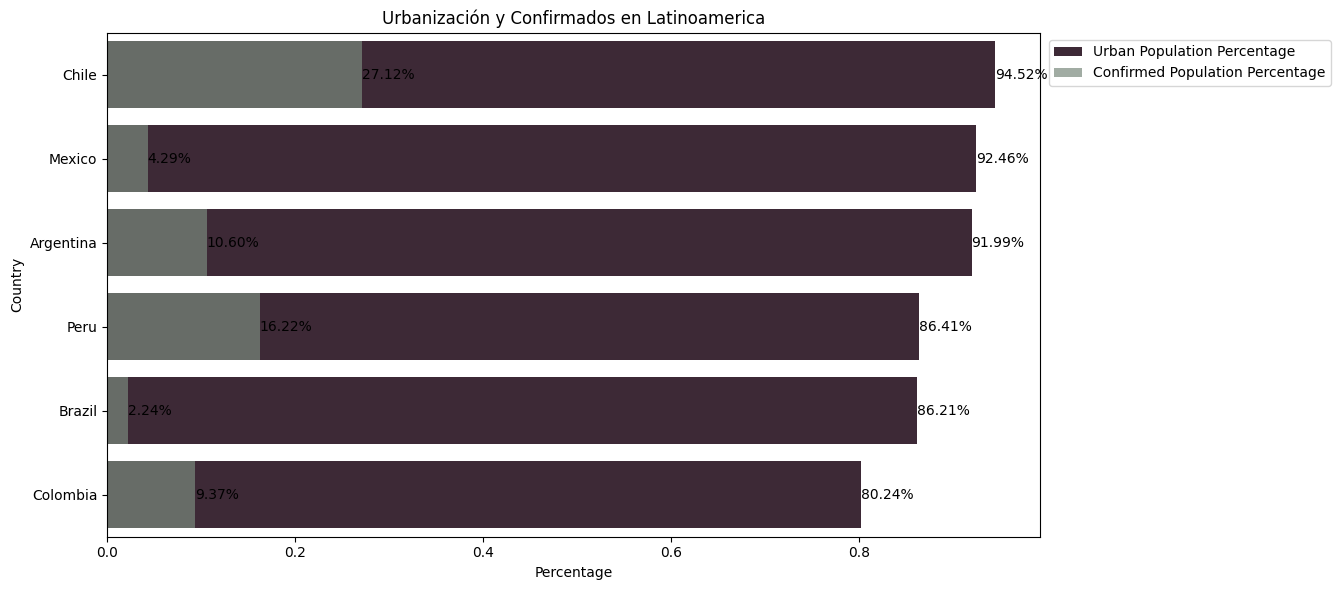

In [51]:
# -Impacto de la Urbanización en la Propagación del Covid-19 por acumulado de casos confirmados.
df_limpio['urban_population_percentage'] = df_limpio['population_urban'] / df_limpio['population']
df_limpio['confirmed_population_percentage'] = df_limpio['cumulative_confirmed'] / df_limpio['population']
urban_cases = df_limpio.groupby('country_name').last().sort_values(ascending=False, by='urban_population_percentage')

fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.barplot(
    x='urban_population_percentage', 
    y=urban_cases.index, 
    data=urban_cases, 
    label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(
    x='confirmed_population_percentage', 
    y=urban_cases.index, 
    data=urban_cases, alpha=0.7, 
    label='Confirmed Population Percentage')

# Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', ha="left", va="center")

plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()

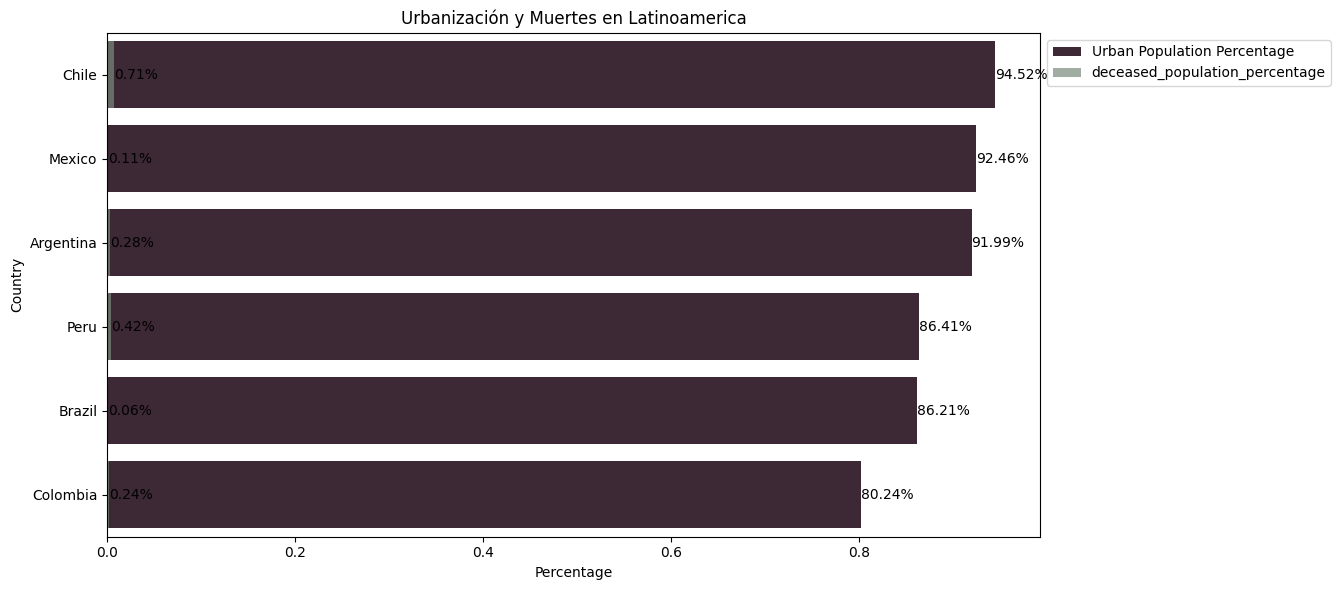

In [52]:
df_limpio['urban_population_percentage'] = df_limpio['population_urban'] / df_limpio['population']
df_limpio['deceased_population_percentage'] = df_limpio['cumulative_deceased'] / df_limpio['population']
urban_cases = df_limpio.groupby('country_name').last().sort_values(ascending=False, by='urban_population_percentage')

fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.barplot(
    x='urban_population_percentage', 
    y=urban_cases.index, 
    data=urban_cases, 
    label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(
    x='deceased_population_percentage', 
    y=urban_cases.index, 
    data=urban_cases, alpha=0.7, 
    label='deceased_population_percentage')

# Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(urban_cases['deceased_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', ha="left", va="center")

plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Urbanización y Muertes en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()

El pais con mayor impacto en la propagación en cuanto porcentaje de casos fue chile, aunque es extraño ya que chile fue uno de los paises que mejor manejó la pandemia, sin embargo esto puede ser debido a la densidad de población en chile. En cuanto a los decesos o muertes no se puede considerar el analisis por esta razon vamos a hacer un analisis de los paises con mayor decesos segun su rango de edad.

In [53]:
# Mostramos los paises con mayor Mortalidad
high_mortality_countries = df_limpio.groupby('country_name')['deceased_population_percentage'].max().sort_values(ascending=False).head().index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [54]:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
df_limpio[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02            6718871.00            7045513.00            6430658.00   
2021-01-03            6718871.00            7045513.00            6430658.00   
2021-01-04            6718871.00            7045513.00            6430658.00   
2021-01-05            6718871.00            7045513.00            6430658.00   
2021-01-06            6718871.00            7045513.00            6430658.00   
...                          ...                   ...                   ...   
2022-09-13            5140624.00            5035905.00            4895056.00   
2022-09-14            5140624.00            5035905.00            4895056.00   
2022-09-15            5140624.00            5035905.00            4895056.00   
2022-09-16            5140624.00            5035905.00            4895056.00   
2022-09-17            5140624.00            5035905.00            4895056.00   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02            5777148.00            4507125.00            3911943.00   
2021-01-03            5777148.00            4507125.00            3911943.00   
2021-01-04            5777148.00            4507125.00            3911943.00   
2021-01-05            5777148.00            4507125.00            3911943.00   
2021-01-06            5777148.00            4507125.00            3911943.00   
...                          ...                   ...                   ...   
2022-09-13            4379777.00            3660378.00            2772568.00   
2022-09-14            4379777.00            3660378.00            2772568.00   
2022-09-15            4379777.00            3660378.00            2772568.00   
2022-09-16            4379777.00            3660378.00            2772568.00   
2022-09-17            4379777.00            3660378.00            2772568.00   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02            2914251.00            1817557.00   
2021-01-03            2914251.00            1817557.00   
2021-01-04            2914251.00            1817557.00   
2021-01-05            2914251.00            1817557.00   
2021-01-06            2914251.00            1817557.00   
...                          ...                   ...   
2022-09-13            1846407.00            1078066.00   
2022-09-14            1846407.00            1078066.00   
2022-09-15            1846407.00            1078066.00   
2022-09-16            1846407.00            1078066.00   
2022-09-17            1846407.00            1078066.00   

            population_age_80_and_older  
date                                     
2021-01-02                    994030.00  
2021-01-03                    994030.00  
2021-01-04                    994030.00  
2021-01-05                    994030.00  
2021-01-06                    994030.00  
...                                 ...  
2022-09-13                    573103.00  
2022-09-14                    573103.00  
2022-09-15                    573103.00  
2022-09-16                    573103.00  
2022-09-17                    573103.00  

[3744 rows x 9 columns]

In [55]:
age_distribution = df_limpio[df_limpio['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   
Brazil                 29076910.00           31160446.00   
Chile                   2428079.00            2493879.00   
Colombia                7414155.00            8119876.00   
Peru                    5140624.00            5035905.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   
Brazil                 34104643.00           34476762.00   
Chile                   2995538.00            2945404.00   
Colombia                8847061.00            7810299.00   
Peru                    4895056.00            4379777.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   
Brazil                 29462006.00           24421202.00   
Chile                   2578404.00            2352271.00   
Colombia                6450787.00            5543980.00   
Peru                    3660378.00            2772568.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   
Brazil                 16896862.00            8801551.00   
Chile                   1791787.00             993126.00   
Colombia                3771358.00            1979761.00   
Peru                    1846407.00            1078066.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00  
Brazil                         4159027.00  
Chile                           537721.00  
Colombia                        945607.00  
Peru                            573103.00

In [56]:
age_distribution.index.unique()

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], dtype='object', name='country_name')

In [57]:
age_distribution.loc["Colombia"].index

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

In [58]:
age_distribution.loc["Colombia"].values

array([7414155., 8119876., 8847061., 7810299., 6450787., 5543980.,
       3771358., 1979761.,  945607.])

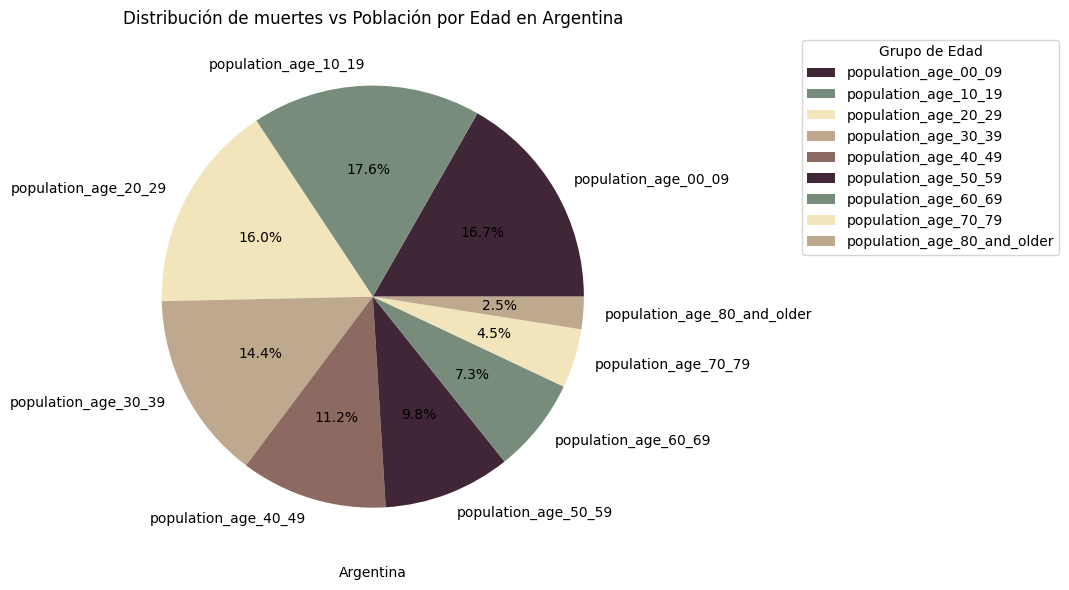

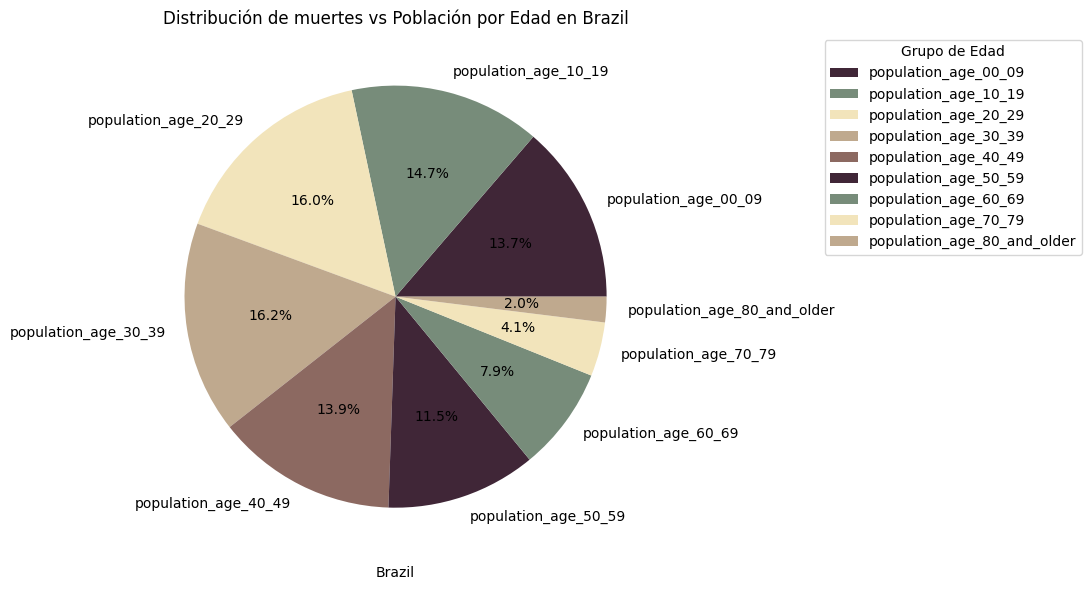

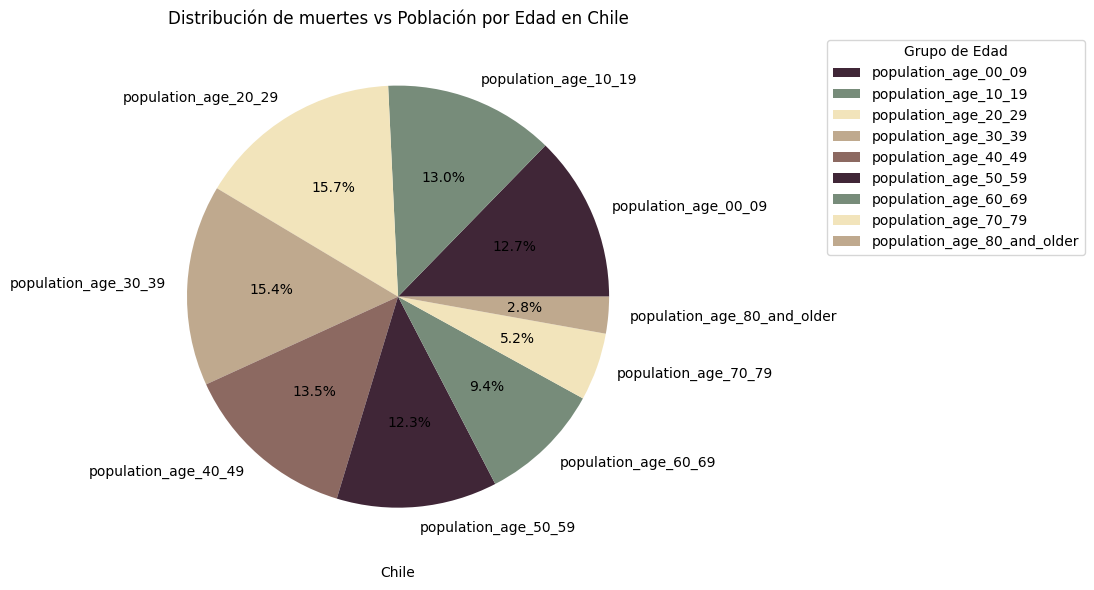

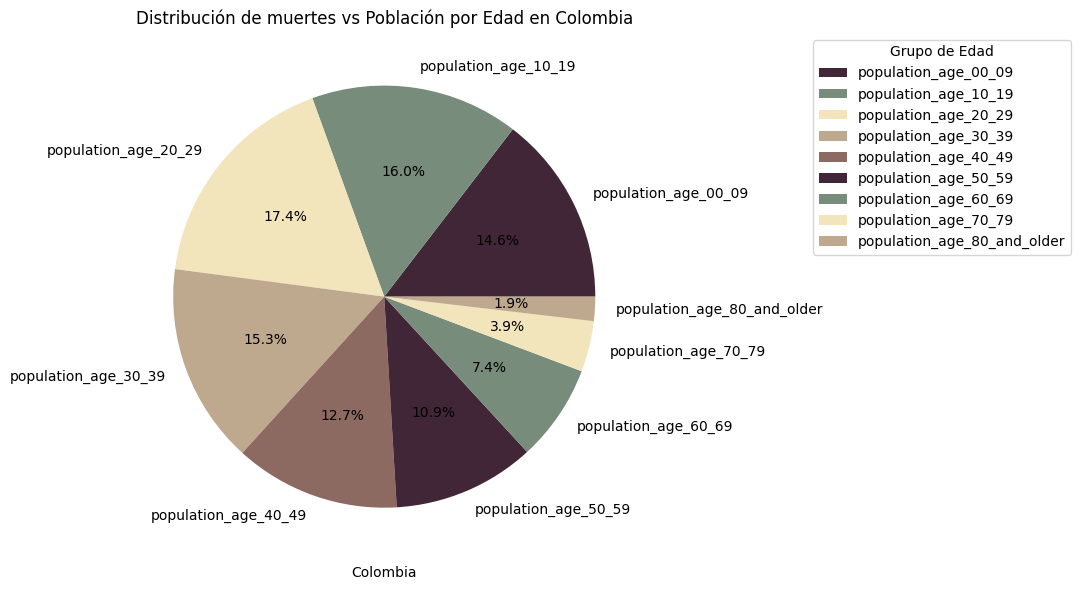

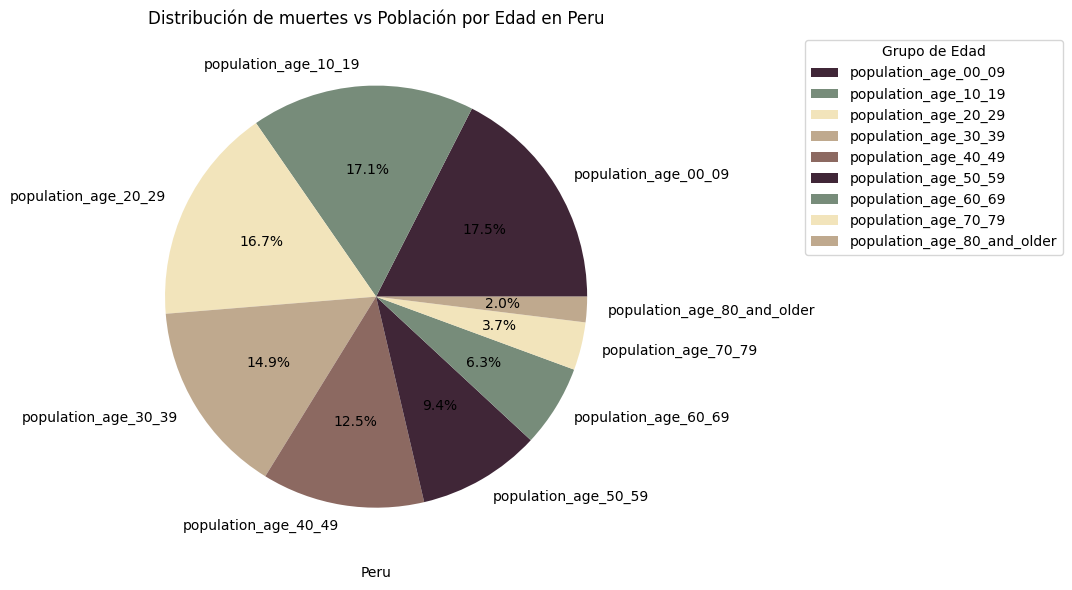

In [59]:
# Densidad de población por grupos de edad y paises con mayor mortalidad
high_mortality_countries = df_limpio.groupby('country_name')['deceased_population_percentage'].max().sort_values(ascending=False).head().index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = df_limpio[df_limpio['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
paises = age_distribution.index.unique()

for pais in paises:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.pie(
        age_distribution.loc[pais].values,
        labels=age_distribution.loc[pais].index,
        autopct='%1.1f%%'
    )

    # age_distribution.plot(kind='pie', stacked=True, figsize=(12, 8))
    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de muertes vs Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

Este analisis demuestra que contrario a lo que se pensaba los grupos de edades de 50 años en adelante tenian una posibilidad de muerte debido al covid19 mayor a los otros rangos de edad, pero nuestro analisis demuestra que fue todo lo contrario, son los rangos de edades menores a 50 años, los que tuvieron mas decesos.

Ahora vamos a hacer una Comparación de Estrategias de Vacunación en América Latina

In [60]:
# Vacunas administradas
vaccine_administered = df_limpio.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
vaccine_administered

country_name
Brazil      347868481.00
Mexico      209673612.00
Argentina   109204825.00
Colombia     87566541.00
Peru         83624934.00
Chile        62204235.00
Name: cumulative_vaccine_doses_administered, dtype: float64

In [61]:
# Media de la poblacion para analisis 
mean_population = df_limpio.groupby('country_name')['population'].mean().sort_values(ascending=False)
mean_population

country_name
Brazil      212559409.00
Mexico      110991953.00
Colombia     50882884.00
Argentina    44938712.00
Peru         29381884.00
Chile        17574003.00
Name: population, dtype: float64

<Axes: title={'center': 'Comparación de Estrategias de Vacunación en América Latina'}, xlabel='Pais', ylabel='Dosis administrados por habitante'>

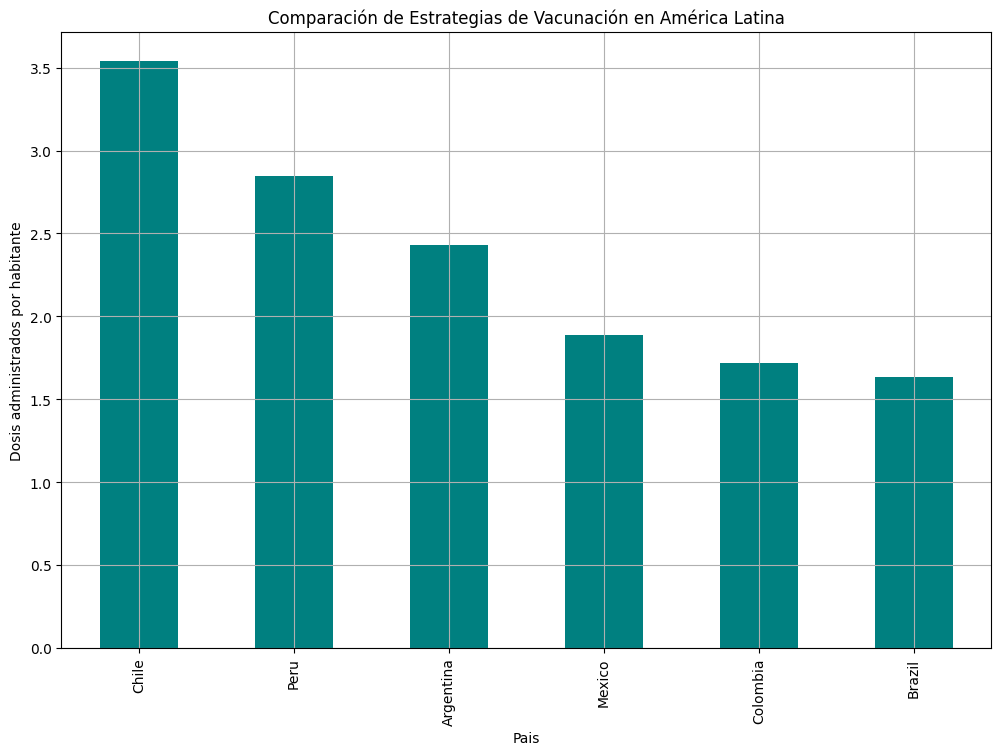

In [62]:
#Calculamos la estrategia de vacunacion con respecto a la media de la poblacion
vaccine_strategy = df_limpio.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False) / df_limpio.groupby('country_name')['population'].mean().sort_values(ascending=False)
vaccine_strategy

# Graficamos la estrategia usando 
vaccine_strategy.sort_values(ascending=False).plot(
    kind='bar', 
    figsize=(12, 8), 
    ylabel= 'Dosis administrados por habitante', 
    xlabel= 'Pais', 
    title= 'Comparación de Estrategias de Vacunación en América Latina',
    color='teal', 
    grid=True
    )

In [63]:
# Vacunas administradas
vaccine_administered = df_limpio.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
# Media de la poblacion para analisis 
mean_population = df_limpio.groupby('country_name')['population'].mean().sort_values(ascending=False)
#Calculamos la estrategia de vacunacion con respecto a la media de la poblacion
vaccine_strategy = df_limpio.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False) / df_limpio.groupby('country_name')['population'].mean().sort_values(ascending=False)
print(vaccine_strategy)

country_name
Argentina   2.43
Brazil      1.64
Chile       3.54
Colombia    1.72
Mexico      1.89
Peru        2.85
dtype: float64


En este analisis podemos evidenciar que Chile fue la que mejor implemento la estrategia de vacunacion, donde tambien se evidencia que la estrategia de Brasil y Colombia fue menos de la mitad de Chile.

A continuacion vamos a hacer un analisis de la Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

In [64]:
df_limpio.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [65]:
# Creamos las variables para poder hallar los 3 paises con mayor y menor porcentaje de muertes
top_countries = df_limpio.groupby('country_name')['deceased_population_percentage'].max().nlargest(3).index # 3 paises con mayor cantidad de muertes
bottom_countries = df_limpio.groupby('country_name')['deceased_population_percentage'].max().nsmallest(3).index # 3 paises con menor cantidad de muertes
print(top_countries, bottom_countries)

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name') Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')


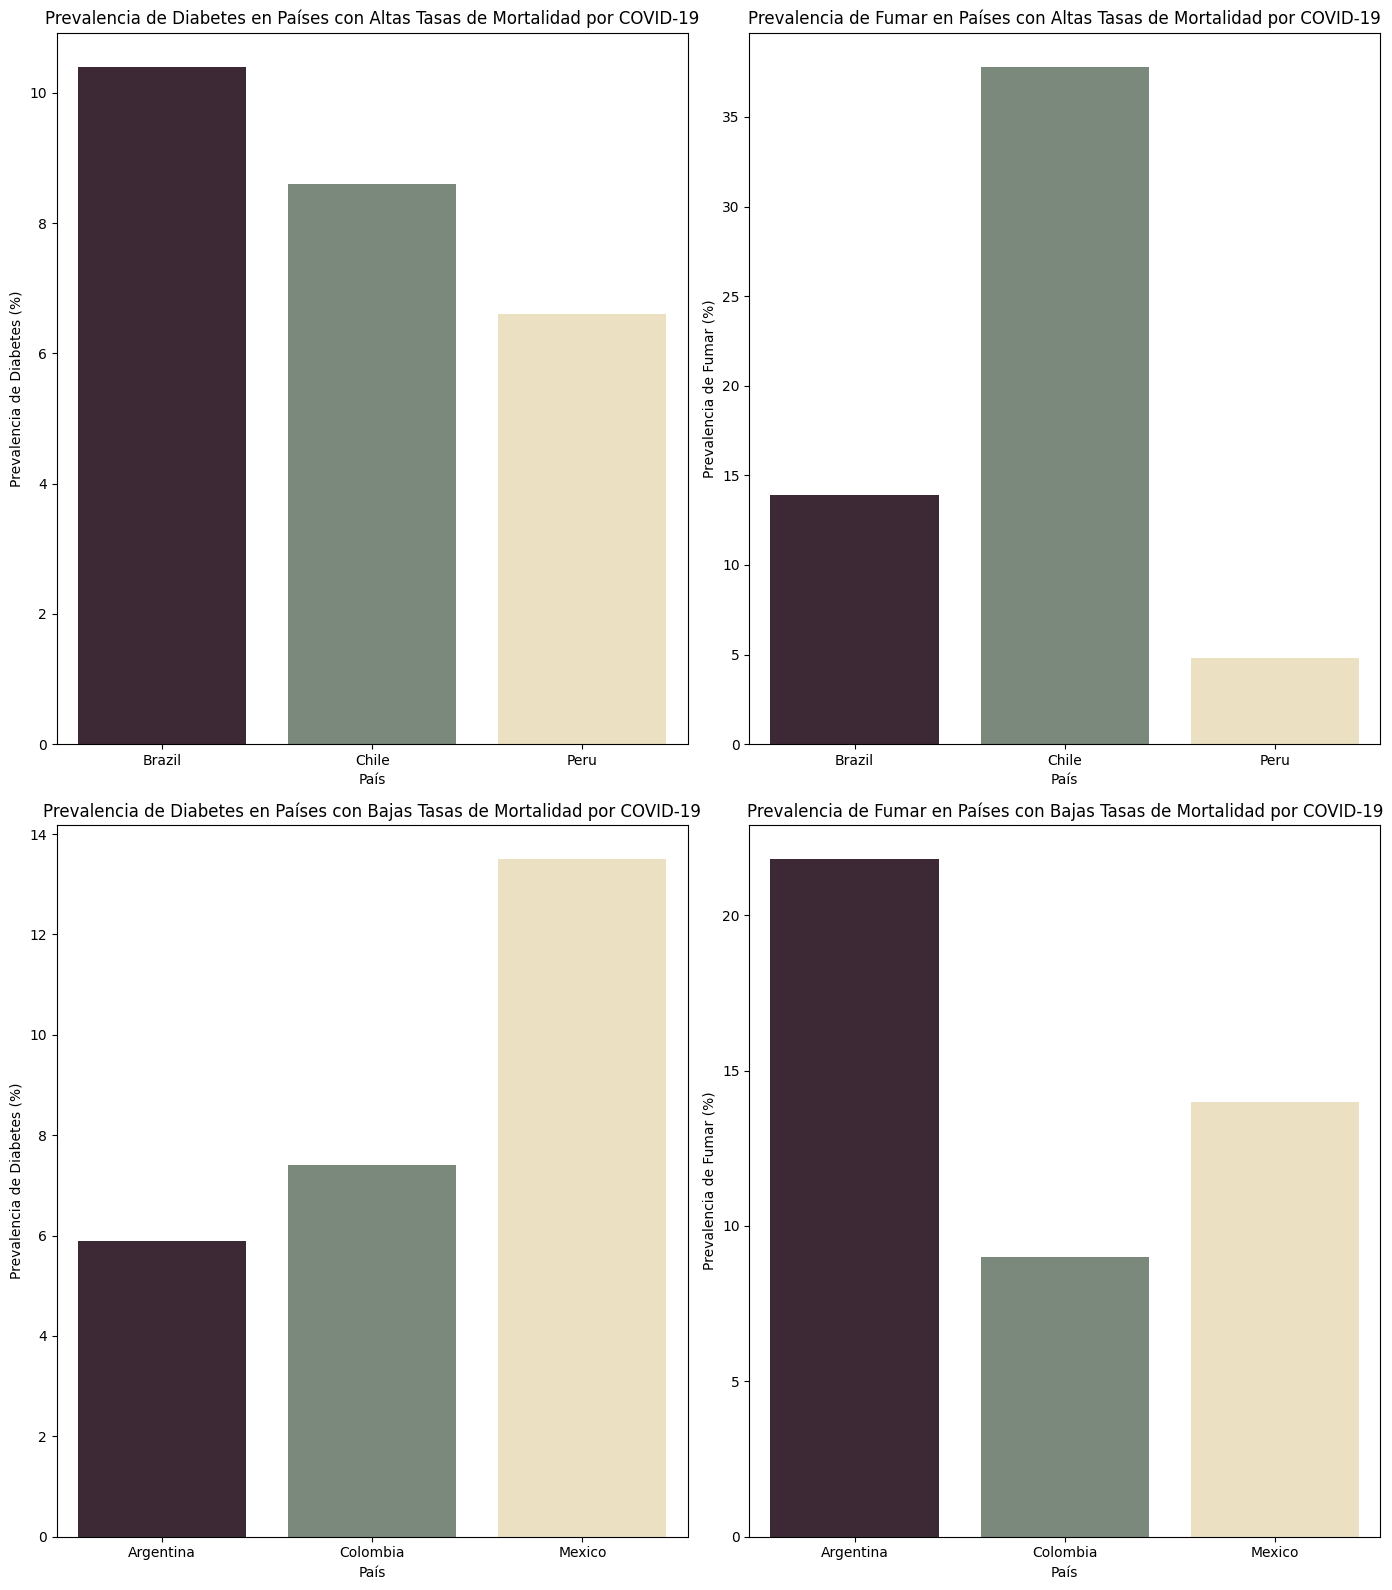

In [66]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.
top_countries = df_limpio.groupby('country_name')['deceased_population_percentage'].max().nlargest(3).index # 3 paises con mayor cantidad de muertes
bottom_countries = df_limpio.groupby('country_name')['deceased_population_percentage'].max().nsmallest(3).index # 3 paises con menor cantidad de muertes

conditions_top_data = df_limpio[df_limpio['country_name'].isin(top_countries)]
conditions_bottom_data = df_limpio[df_limpio['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, 
            x='country_name', 
            y='diabetes_prevalence', 
            hue='country_name', 
            ax=ax1
            )
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, 
            x='country_name', 
            y='smoking_prevalence', 
            hue='country_name', 
            ax=ax2
            )
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, 
            x='country_name', 
            y='diabetes_prevalence', 
            hue='country_name', 
            ax=ax3
            )
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, 
            x='country_name', 
            y='smoking_prevalence', 
            hue='country_name', 
            ax=ax4
            )
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

Ahora se podria deducir que en cuanto a la Diabetes los paises que mas sufren muertes por COVID19 son Brazil y Mexico, en cuanto a la prescripcion por fumar los paises que mas sufren muertes son Argentina y Chile.

Evolución de Casos Activos vs. Recuperados

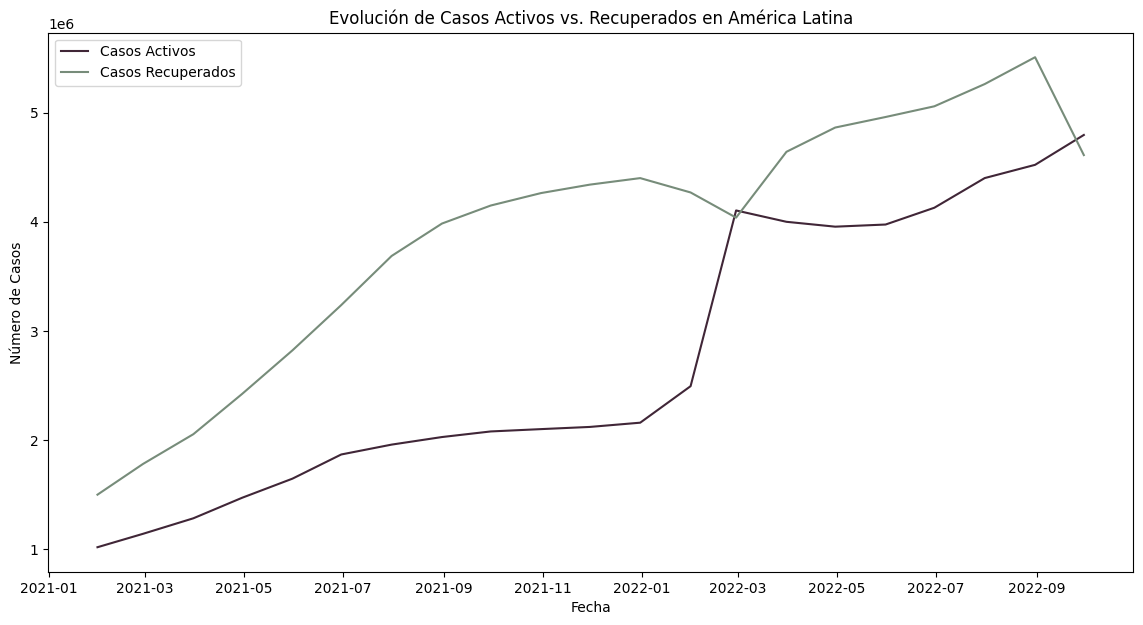

In [67]:
# Como evolucionan los casos activos y recuperados en América Latina
## Creo la columna active cases
df_limpio['active_cases'] = df_limpio['cumulative_confirmed'] - df_limpio['cumulative_deceased'] - df_limpio['cumulative_recovered']

# Grafico dos lineas sobre el mismo eje: 
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_limpio.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=df_limpio.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

Relación entre la Cobertura de Vacunación y la Reducción de Casos

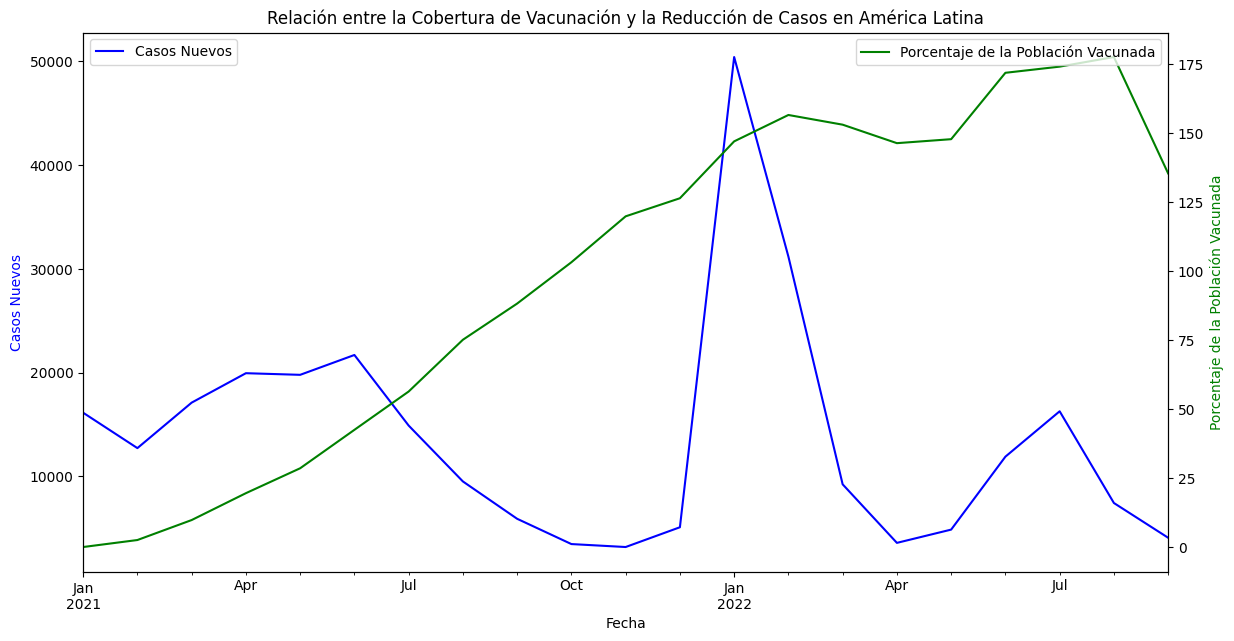

In [68]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
df_limpio['percentage_vaccinated'] = df_limpio['cumulative_vaccine_doses_administered'] / df_limpio['population'] * 100

# Gráfico mis dos lineplots
df_limpio.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
df_limpio.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Este analisis permite ver una relacion inversa, porque entre mas incrementaba la tasa de vacunacion al mismo tiempo disminuia la aparicion de nuevos casos, lo que evidencia que la estrategia estaba en la vacunacion.

Relacion entre nuevos casos y temperatura promedio


In [69]:
df_limpio.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

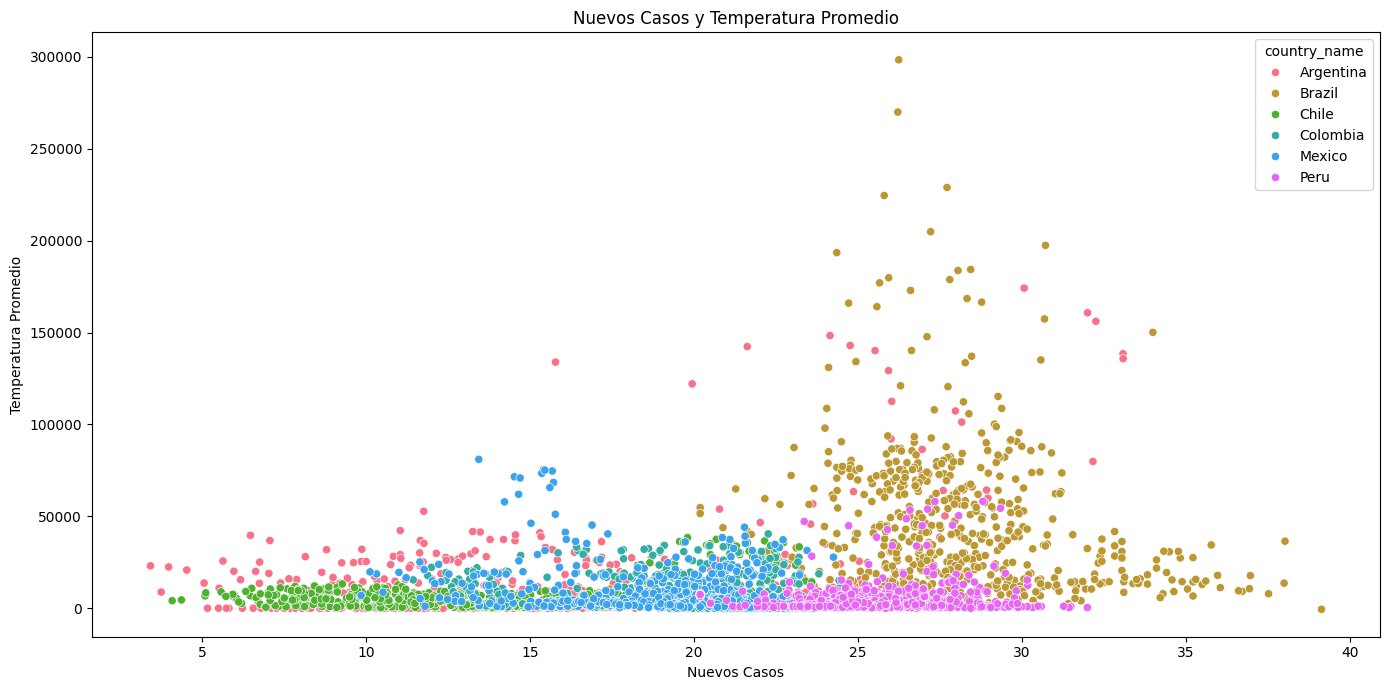

In [70]:
plt.figure(figsize=(14, 7))  # Configura el tamaño de la figura a 14 pulgadas de ancho y 7 pulgadas de alto

sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=df_limpio, hue='country_name')
plt.title('Nuevos Casos y Temperatura Promedio')
plt.xlabel('Nuevos Casos')
plt.ylabel('Temperatura Promedio')
plt.tight_layout()  # Asegúrate de que los elementos del gráfico no se solapen
plt.show()

Con esta grafica no se puede establecer una relacion directamente proporcional entre el aumento de la temperatura promedio y la aparicion de nuevos casos

Análisis Temporal de la Mortalidad

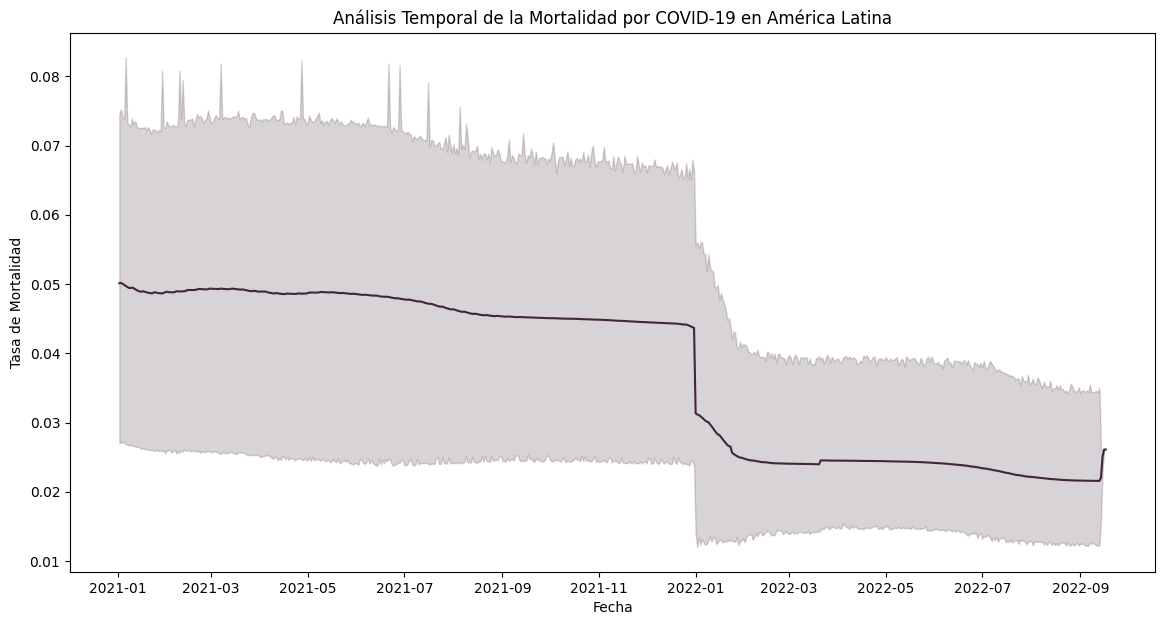

In [71]:
# cómo evolucionó la mortalidad

df_limpio['mortality_rate'] = df_limpio['cumulative_deceased'] / df_limpio['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_limpio, 
    x='date', 
    y='mortality_rate', 
    estimator='mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

Como podemos evidenciar la evolucion de la tasa de mortalidad en el tiempo disminuye, esto debido que a la vez transcurre la estrategia de vacunacion.

Comparación de la Situación Actual

In [72]:
# Creamos la varible para la situacion Actual: para casos activos, acumulado de recuperados, acumulado de muertos
current_situation = df_limpio.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Chile           4641213.98                  0.00            124442.12
Mexico          4641213.98                  0.00            304025.00
Peru            4641213.98                  0.00            216173.00
Colombia        6162609.00            5441021.00            155770.00
Argentina       9567933.00                  0.00            129830.00
Brazil         33819307.00           33706231.00            685203.00

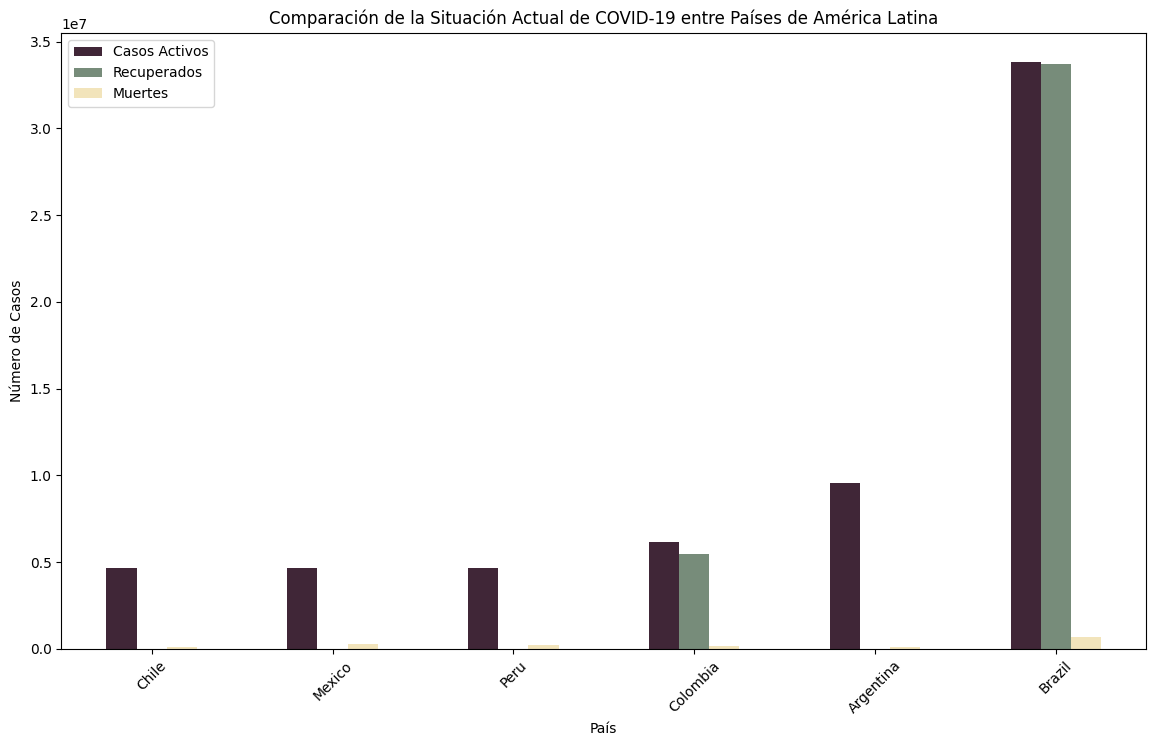

In [73]:
current_situation = df_limpio.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")

current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()


### EXTRA CREDIT
Mapa para ver la distribución de casos confirmados en latinoamerica por país

In [74]:
# Importamos geopandas para graficar en el mapa la situacion actual del COVID 19
import geopandas as gpd

# Path del Geo Dataframe descargado desde: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
path = 'ne_110m_admin_0_countries.zip'

# Cargo el dataset con el archivo
world = gpd.read_file(path)

world.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [75]:
# Miramos los nombres de los paises del archivo
world.NAME

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: NAME, Length: 177, dtype: object

In [76]:
# Filtrado de world: 
world = world[(world.NAME=="Argentina") | (world.NAME=="Chile") | (world.NAME=="Colombia") | (world.NAME=="Mexico") | (world.NAME=="Peru") | (world.NAME=="Brazil")]
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
9   Admin-0 country          1          2  Argentina    ARG         0      2   
10  Admin-0 country          1          2      Chile    CHL         0      2   
27  Admin-0 country          1          2     Mexico    MEX         0      2   
29  Admin-0 country          1          2     Brazil    BRA         0      2   
31  Admin-0 country          1          2       Peru    PER         0      2   
32  Admin-0 country          1          2   Colombia    COL         0      2   

                 TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
9   Sovereign country   1  Argentina  ...      None       None      None   
10  Sovereign country   1      Chile  ...      None       None      None   
27  Sovereign country   1     Mexico  ...      None       None      None   
29  Sovereign country   1     Brazil  ...      None       None      None   
31  Sovereign country   1       Peru  ...      None       None      None   
32  Sovereign country   1   Colombia  ...      None       None      None   

   FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
9       None       None      None      None       None      None   
10      None       None      None      None       None      None   
27      None       None      None      None       None      None   
29      None       None      None      None       None      None   
31      None       None      None      None       None      None   
32      None       None      None      None       None      None   

                                             geometry  
9   MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...  
10  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
27  POLYGON ((-117.12776 32.53534, -115.99135 32.6...  
29  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
31  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...  
32  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...  

[6 rows x 169 columns]

In [77]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6 entries, 9 to 32
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 7.4+ KB


In [78]:
# Renombramos la columna "NAME" por "country_name" para poder agruparlos para el analisi
world = world.rename(columns={"NAME":"country_name"})
world["country_name"]

9     Argentina
10        Chile
27       Mexico
29       Brazil
31         Peru
32     Colombia
Name: country_name, dtype: object

In [79]:
world = world.merge(df_limpio.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name")
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          2  Argentina    ARG         0      2   
1  Admin-0 country          1          2      Chile    CHL         0      2   
2  Admin-0 country          1          2     Mexico    MEX         0      2   
3  Admin-0 country          1          2     Brazil    BRA         0      2   
4  Admin-0 country          1          2       Peru    PER         0      2   
5  Admin-0 country          1          2   Colombia    COL         0      2   

                TYPE TLC      ADMIN  ... FCLASS_ID  FCLASS_PL FCLASS_GR  \
0  Sovereign country   1  Argentina  ...      None       None      None   
1  Sovereign country   1      Chile  ...      None       None      None   
2  Sovereign country   1     Mexico  ...      None       None      None   
3  Sovereign country   1     Brazil  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   
5  Sovereign country   1   Colombia  ...      None       None      None   

  FCLASS_IT  FCLASS_NL FCLASS_SE FCLASS_BD  FCLASS_UA  \
0      None       None      None      None       None   
1      None       None      None      None       None   
2      None       None      None      None       None   
3      None       None      None      None       None   
4      None       None      None      None       None   
5      None       None      None      None       None   

                                            geometry cumulative_confirmed  
0  MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...           9697763.00  
1  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...           4765656.10  
2  POLYGON ((-117.12776 32.53534, -115.99135 32.6...           4765656.10  
3  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...          34568833.00  
4  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...           4765656.10  
5  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...           6304317.00  

[6 rows x 170 columns]

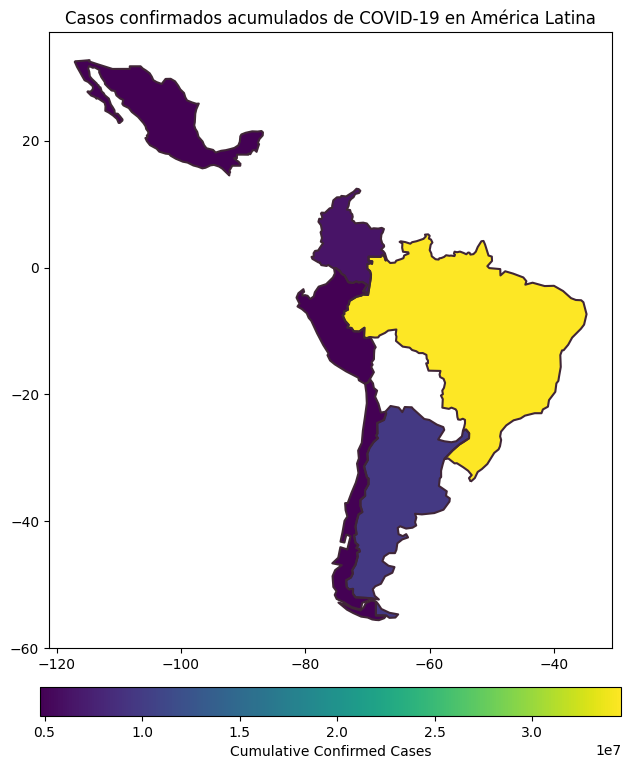

In [80]:

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_confirmed', ax=ax, legend=True, legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()

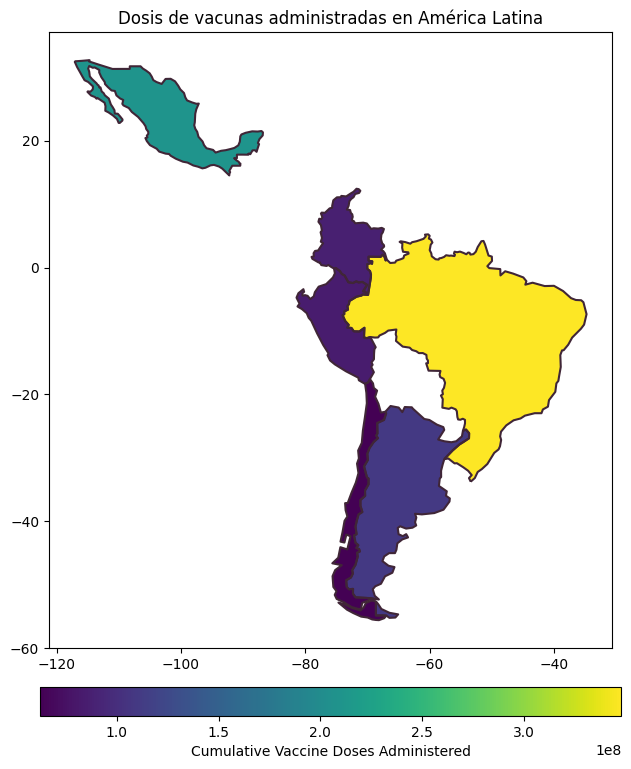

In [81]:
# mapa para ver la distribución de vacunados en latinoamerica por país

world = world.merge(df_limpio.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_vaccine_doses_administered', ax=ax, legend=True, legend_kwds={'label': "Cumulative Vaccine Doses Administered", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Dosis de vacunas administradas en América Latina')
plt.show()

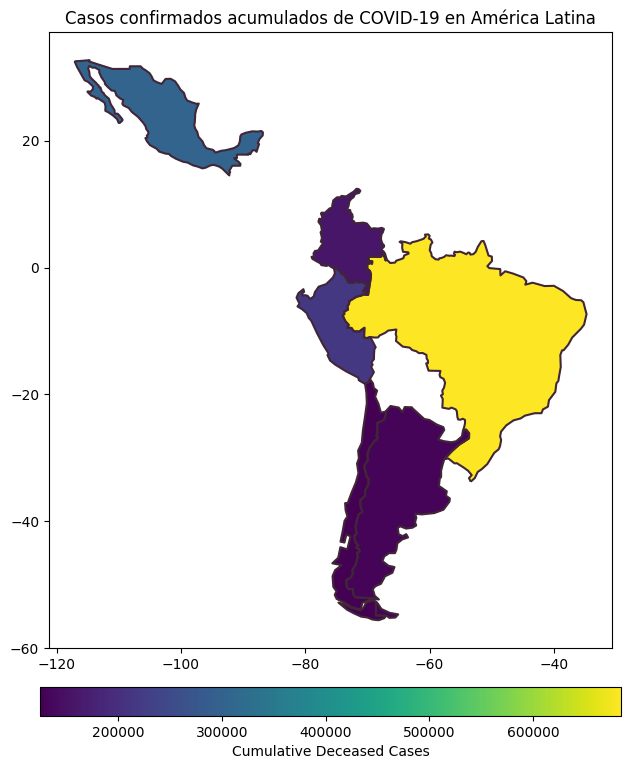

In [82]:
# mapa para ver la distribución muertes en latinoamerica por país

world = world.merge(df_limpio.groupby('country_name')['cumulative_deceased'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='cumulative_deceased', ax=ax, legend=True, legend_kwds={'label': "Cumulative Deceased Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})
plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()